# Montar Drive e importar las primeras librerías

In [1]:
# Montar Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importar las primeras librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install gdown==4.6.0
import gdown
!pip install openpyxl

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


# Cargar Excel por pestañas y separar la información en columnas

Cargamos cada pestaña del excel por separado, para realizar cleaning básico y separar los elementos. Una vez tenemos tablas limpias y separada en columnas, concatenamos todas las pestañas formando un dataset final con todos los episodios.

In [3]:
try:
    df = pd.read_excel('/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/transcripts.xlsx', index_col=None, header=None, sheet_name=None)

    dfs_list = []

    for sheet_name, df in df.items():
        df[['Temporada', 'Episodio']] = df.iloc[0, :].str.split('x', expand=True)
        df[['Episodio', 'Titulo']] = df['Episodio'].str.split('-', expand=True)

        split_cols = df.iloc[:, 0].astype(str).str.split(':', n=1, expand=True)

        if split_cols.shape[1] == 2:
            df[['Personaje', 'Texto']] = split_cols
        else:
            df['Personaje'] = None
            df['Texto'] = df.iloc[:, 0]

        temporada_value = df['Temporada'].iloc[0]
        episodio_value = df['Episodio'].iloc[0]
        titulo_value = df['Titulo'].iloc[0]

        df['Temporada'] = df['Temporada'].fillna(temporada_value)
        df['Episodio'] = df['Episodio'].fillna(episodio_value)
        df['Titulo'] = df['Titulo'].fillna(titulo_value)
        df = df.drop(df.index[0])

        dfs_list.append(df)

    if dfs_list:
        final_df = pd.concat(dfs_list, ignore_index=True)
        final_df = final_df.drop(final_df.columns[0], axis=1)
        # output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df.xlsx'
        # final_df.to_excel(output_path, index=False)
    else:
        print("No dataframes were processed.")

except ValueError as e:
    print(f'Error de formato del archivo Excel: {e}')
except FileNotFoundError as e:
    print(f'Error al encontrar el archivo: {e}')
except pd.errors.ParserError as e:
    print(f'Error al analizar el archivo Excel: {e}')
except Exception as e:
    print(f'Error desconocido: {e}')

# <font color='red'>PREPROCESAMIENTO</font>

## Limpieza básica del dataset

### Homogeneizar los nombres de los personajes y quedarnos sólo con los principales

In [4]:
# Mostramos la lista de los personajes presentes en nuestro dataset inicial, podemos observar varios nombres repetidos o escritos de manera ligeramente distinta

final_df['Personaje'] = final_df['Personaje'].str.lower()
personajes = final_df['Personaje'].unique()
personajes = sorted(personajes)
personajes

['',
 'administrator',
 'agent',
 'agent on phone',
 'all three women',
 'andrea',
 'andrew',
 'answering machine',
 'antonio',
 'artie',
 'asac ramey',
 'attorney',
 'badger',
 'barry',
 'bartender',
 'ben',
 'biker',
 'bobby',
 'bogdan',
 'bolsa',
 'both',
 'brock',
 'buyer',
 'car wash woman',
 'cara',
 'carmen',
 'chad',
 'chad’s girlfriend',
 'charlie rose',
 'chow',
 'clovis',
 'combo',
 'commercial guy #1',
 'commercial guy #2',
 'cop',
 'counselor',
 'coworker',
 'customer',
 'cynthia',
 'dan',
 'dea agent 1',
 'dealer',
 'declan',
 'doctor',
 'donald',
 'dorothy',
 'dr. bravenec',
 'dr. delcavoli',
 'driver',
 'drug dealer',
 'elliott',
 'elliott schwartz',
 'emilio',
 'employee',
 'emt',
 'everyone',
 'farley',
 'francesa',
 'francesca',
 'friend',
 'friend #2',
 'gale',
 'girl cop',
 'gomez',
 'gonzo',
 'grandma',
 'gretchen',
 'gretchen schwartz',
 'group',
 'group leader',
 'gus',
 'gustavo',
 'guy',
 'hank',
 'hank(on the news)',
 'hector',
 'holly',
 'homeless man',
 'hu

In [5]:
# Homogeneizamos los nombres que están escritos de manera diferente

final_df['Personaje'].replace(['walt jr', 'hank(on the news)', 'reporter(on the news)', 'walter junior', 'walter(answering machine)', 'jesse(answering machine)', 'jane’s voicemail', 'walt', 'tv', 'elliott schwartz', 'gretchen schwartz', 'junior', 'gus', 'kaylie', 'ken', 'real estate agent', 'walt','neo-nazi','dealer','francesa','skyler (voicemail)','markert','lyda','neo nazi','drug dealer','asac ramey','ramey', 'merkert','pete'], ['walter jr', 'hank', 'reporter', 'walter jr', 'walter', 'jesse', 'jane', 'walter', 'tv', 'elliott', 'gretchen', 'walter jr', 'gustavo', 'kaylee', 'kenny', 'realtor', 'walter','neonazi','drug-dealer','francesca','skyler','merket','lydia','neonazi','drug-dealer','sac ramey','sac ramey','merket','skinny pete'], inplace=True)

# No tocamos Skyler (Walt's Imagination)

In [6]:
# Mostramos el resultado final, deberíamos tener un sólo nombre por cada personaje

personajes = final_df['Personaje'].unique()
personajes.sort()
personajes

array(['', 'administrator', 'agent', 'agent on phone', 'all three women',
       'andrea', 'andrew', 'answering machine', 'antonio', 'artie',
       'attorney', 'badger', 'barry', 'bartender', 'ben', 'biker',
       'bobby', 'bogdan', 'bolsa', 'both', 'brock', 'buyer',
       'car wash woman', 'cara', 'carmen', 'chad', 'chad’s girlfriend',
       'charlie rose', 'chow', 'clovis', 'combo', 'commercial guy #1',
       'commercial guy #2', 'cop', 'counselor', 'coworker', 'customer',
       'cynthia', 'dan', 'dea agent 1', 'declan', 'doctor', 'donald',
       'dorothy', 'dr. bravenec', 'dr. delcavoli', 'driver',
       'drug-dealer', 'elliott', 'emilio', 'employee', 'emt', 'everyone',
       'farley', 'francesca', 'friend', 'friend #2', 'gale', 'girl cop',
       'gomez', 'gonzo', 'grandma', 'gretchen', 'group', 'group leader',
       'gustavo', 'guy', 'hank', 'hector', 'holly', 'homeless man',
       'huell', 'hugo', 'intercom', 'jack', 'jake', 'jane', 'janet',
       'janice', 'jeffrey',

In [7]:
# Extraemos el número de líneas por cada personaje para poder filtrar aquellos que son secundarios o que intervienen muy poco a lo largo de la serie.

num_rows_per_personaje = final_df['Personaje'].value_counts().sort_values(ascending=False)

# Mostrar todas las filas para poder elegir el punto de corte
pd.set_option('display.max_rows', None)

num_rows_per_personaje

# Observando el número de filas de cada personaje, decidimos hacer el corte en 30.

Personaje
                               9236
walter                         2553
jesse                          1472
skyler                         1008
scene                           980
hank                            715
marie                           359
walter jr                       353
saul                            275
jane                            159
mike                            155
gustavo                         151
badger                          137
steve                           128
ted                             120
skinny pete                      91
gretchen                         85
jack                             79
tuco                             76
todd                             74
cop                              63
gale                             57
andrea                           55
elliott                          52
merket                           48
doctor                           48
lydia                            48
krazy-8                          46
dr. delcavoli                    45
donald                           45
gomez                            42
the extractor                    39
lawyer                           39
mrs. pinkman                     38
carmen                           35
combo                            33
spooge                           32
bogdan                           31
clovis                           29
bolsa                            28
kenny                            27
wendy                            22
spooge’s wife                    22
huell                            21
sac ramey                        21
agent                            21
dan                              20
scary skell                      19
barry                            18
reporter                         17
cara                             17
mr                               16
group leader                     16
tortuga                          16
employee                         15
mr. pinkman                      15
declan                           14
brock                            14
kuby                             14
paul                             13
emt                              13
parent                           12
tim                              12
margaret                         12
dorothy                          12
francesca                        12
counselor                        11
manager                          11
jake                             10
everyone                         10
scott                            10
tucker                           10
mrs. ortega                       9
psychiatrist                      9
kaylee                            9
neonazi                           9
teenager                          9
victor                            9
old joe                           8
stan                              8
vanco                             8
tv                                8
louis                             8
no doze                           8
nurse                             8
worker                            8
charlie rose                      8
teller                            7
realtor                           7
tyrus                             7
chow                              7
cynthia                           7
dr. bravenec                      6
guy                               6
marco                             5
bartender                         5
waitress                          5
tomas                             5
emilio                            5
bobby                             5
drug-dealer                       5
waiter                            4
policeman                         4
mail woman                        4
wife                              4
farley                            4
student                           4
ben                               4
physical therapist                4
voice                             4
janice                        

In [8]:
# Eliminamos los personajes que intervienen menos de 30 veces pero dejamos las líneas vacías

personajes_principales = num_rows_per_personaje[num_rows_per_personaje > 30].index

# personajes_principales

# personajes_secundarios = num_rows_per_personaje[num_rows_per_personaje <= 30].index

# personajes_secundarios

final_df = final_df[final_df['Personaje'].isin(personajes_principales)]

# Calculamos el número de filas retiradas del dataset para medir el impacto de esta acción.

final_df.Texto.value_counts().sum()

19002

### Crear nueva columna de Personaje_id

In [9]:
# Convertirmos los personajes en números para poder pasárselos a los algoritmos de Machine Learning más tarde.

!pip install scikit-learn

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize the Label Encoder
le = LabelEncoder()

# Fit the encoder and transform the 'person' column into numeric values
final_df['Personaje_id'] = le.fit_transform(final_df['Personaje'])

# print(final_df.head(2))

### Analizar los tipos de variables y transformar las variables categóricas pertinentes en numéricas

In [10]:
# Analizar los tipos de las variables presentes en el dataset

final_df.dtypes

Temporada       object
Episodio        object
Titulo          object
Personaje       object
Texto           object
Personaje_id     int64
dtype: object

In [11]:
# Convertir temporada y episodio en variables numéricas

final_df['Temporada'] = final_df['Temporada'].astype(int)
final_df['Episodio'] = final_df['Episodio'].astype(int)

final_df.dtypes

Temporada        int64
Episodio         int64
Titulo          object
Personaje       object
Texto           object
Personaje_id     int64
dtype: object

## Importar las Librerías necesarias para preprocesar texto

📣 <font color='red'>Explicar muy brevemente lo que hacen estas librerías y su funcionamiento</font>

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from itertools import combinations

In [13]:
# Importar las librerías instaladas
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Inicializar las librerías lemmatizer y stopwords.
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Inspeccionar Stop Words y definir Filler Words si fuera necesario

In [14]:
for word in sorted(stop_words):
  print(word)

a
about
above
after
again
against
ain
all
am
an
and
any
are
aren
aren't
as
at
be
because
been
before
being
below
between
both
but
by
can
couldn
couldn't
d
did
didn
didn't
do
does
doesn
doesn't
doing
don
don't
down
during
each
few
for
from
further
had
hadn
hadn't
has
hasn
hasn't
have
haven
haven't
having
he
her
here
hers
herself
him
himself
his
how
i
if
in
into
is
isn
isn't
it
it's
its
itself
just
ll
m
ma
me
mightn
mightn't
more
most
mustn
mustn't
my
myself
needn
needn't
no
nor
not
now
o
of
off
on
once
only
or
other
our
ours
ourselves
out
over
own
re
s
same
shan
shan't
she
she's
should
should've
shouldn
shouldn't
so
some
such
t
than
that
that'll
the
their
theirs
them
themselves
then
there
these
they
this
those
through
to
too
under
until
up
ve
very
was
wasn
wasn't
we
were
weren
weren't
what
when
where
which
while
who
whom
why
will
with
won
won't
wouldn
wouldn't
y
you
you'd
you'll
you're
you've
your
yours
yourself
yourselves


In [15]:
# No definimos filler words. No queremos quitar estas palabras del dataset ya que pueden ser de utilidad para algunos Lexicones con capacidad de analizar el lenguaje coloquial como el Vader.

# filler_words = {'um', 'got', 'uh', 'like', "youre", "im", 'you', 'ah', 'er', 'mm', 'oh', 'okay', 'know', 'the', 'that', 'thats', 'there', 'this'}

## Definir la función que preprocesa el texto y aplicarla a nuestro dataset

In [16]:
# Verificamos que no hay valores nulos en la variable que queremos procesar, en este caso la variable "Texto"

nans = final_df['Texto'].isna().sum()
print(nans)

0


In [17]:
# Definimos la función que preprocesará el texto. Aprovecharemos para convertir todo el texto a minúsculas. Esta función se servirá de las librerías de Python previamente instaladas e importadas re y nltk para realizar el preprocesarmiento.

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # quita caracteres especiales
    text = text.lower()  # transforma el texto en minúsculas
    words = word_tokenize(text)  # tokeniza (extrae palabras individuales)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # lemmatiza (encuentra las raíces de las palabras individuales extraídas previamente)
    return words

# Aplicamos la función preprocess_text a la variable 'Texto' de nuestro dataset y guardamos el resultado en una nueva columna llamada 'Palabras_clave'.

final_df['Palabras_clave'] = final_df['Texto'].apply(preprocess_text)

# Descargamos el dataset con la nueva columna en excel para chequear que la función ha funcionado correctamente para todas las filas.

# output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words.xlsx'

# final_df.to_excel(output_path, index=False)

Esta nueva columna Palabras_clave será utilizada por los lexicones para extraer los sentimientos del dataset.

# <font color='red'>EXTRACCIÓN DE SENTIMIENTOS</font>

## <font color='blue'>1.   Rule-Based Approach: LEXICONS</font>

📣 <font color='blue'>Explicar muy brevemente lo que hacen los Lexicones y su funcionamiento</font>

## <font color='red'>TEXTBLOB</font>

Construido sobre NLTK y fácil de implementar.

**Escala:** de -1 (totalmente negativo) a 1 (totalmente positivo), 0 significa neutral (sin carga sentimental).

### Definir la función que obtiene los sentimientos con TEXTBLOB y aplicarla a nuestro dataset

In [18]:
# Definimos la función que extraerá la polaridad de sentimientos mediante el Lexicon Textblob

def get_sentiment_polarity_textblob(text):
    return TextBlob(' '.join(text)).sentiment.polarity

# Aplicamos esta función a la recién creada columna 'Palabras_clave' de nuestro dataset

final_df['textblob_sentiment'] = final_df['Palabras_clave'].apply(get_sentiment_polarity_textblob)

# Descargamos el dataset con la nueva columna 'textblob_sentiment' en excel para chequear que la función ha funcionado correctamente para todas las filas.

# output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments.xlsx'

# final_df.to_excel(output_path, index=False)

### Dibujar el Histograma de los sentimientos extraídos con TEXTBLOB para ver su distribución

Vemos que hay una enorme cantidad de valores neutros (cero o cercanos a cero).

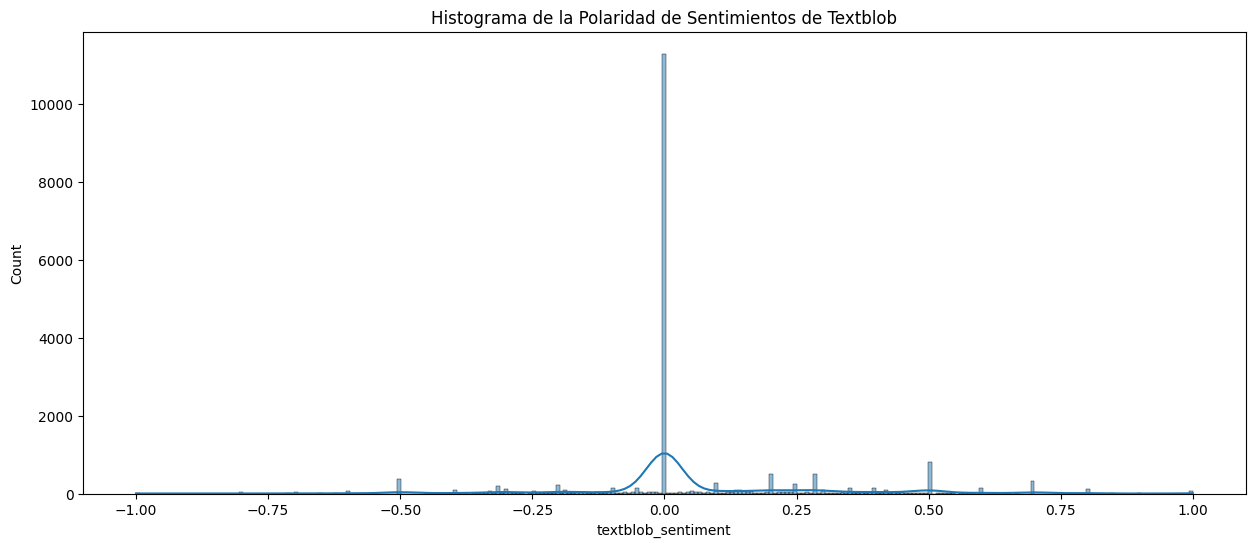

In [19]:
plt.figure(1 , figsize = (15 , 6))
n = 0
sns.histplot(final_df['textblob_sentiment'] , kde=True)
plt.title('Histograma de la Polaridad de Sentimientos de Textblob')
plt.show()

### Quitar el 90% de los valores neutros para equilibrar el dataset

Con el fin de reequilibrar el dataset, decidimos quitar el 90% de los valores 0, dejamos únicamente el 10%.

In [20]:
# Fitramos las filas que tienen un valor de 0 en 'textblob_sentiment'

neutros = final_df[final_df['textblob_sentiment'] == 0.0]

# Seleccionamos una muestra aletoria del 90% de las filas que tienen 0 y las eliminamos

neutros_a_eliminar = neutros.sample(frac=0.9, random_state=10)

# Eliminamos esas filas del dataset original

final_df_reducido = final_df.drop(neutros_a_eliminar.index)

# Verificamos que el número de neutros se ha reducido adecuadamente

neutros_restantes = final_df_reducido[final_df_reducido['textblob_sentiment'] == 0.0]

print(f"Número de neutros originales: {len(neutros)}")
print(f"Número de neutros restantes (10%): {len(neutros_restantes)}")

Número de neutros originales: 11290
Número de neutros restantes (10%): 1129


### Realizar plot de la frecuencia de polaridad de sentimientos por cada personaje principal

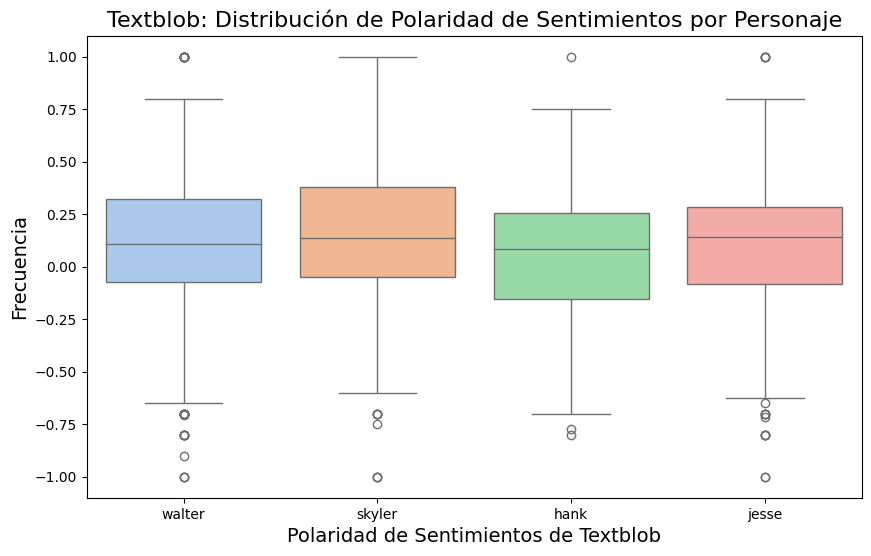

In [21]:
# Nos enfocamos en los 4 principales personajes de la serie

personajes_seleccionados = ['walter', 'jesse', 'skyler', 'hank']
df_personajes_seleccionados = final_df_reducido[final_df_reducido['Personaje'].isin(personajes_seleccionados)]

# Realizamos plot de la distribución de sentimientos por cada unos de los personajes seleccionados Plot sentiment distribution with 'Personaje' as hue

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='textblob_sentiment', hue='Personaje', palette='pastel')

# Set title and labels
plt.title('Textblob: Distribución de Polaridad de Sentimientos por Personaje', fontsize=16)
plt.xlabel('Polaridad de Sentimientos de Textblob', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Display the plot
plt.show()

### Agrupar sentimientos por la media y la mediana de cada episodio y realizar distintos plots

#### Lineplot de la Polaridad de Sentimiento por Temporada y Episodio

In [22]:
# Extraemos dos medidas centrales, la media y la mediana, de polaridad de sentimiento de Textblob por cada episodio de cada temporada de todos los personajes

plot_media_episodio = final_df_reducido.groupby(['Temporada', 'Episodio'])['textblob_sentiment'].mean().reset_index()

plot_media_episodio

plot_mediana_episodio = final_df_reducido.groupby(['Temporada', 'Episodio'])['textblob_sentiment'].median().reset_index()

plot_mediana_episodio

Temporada  Episodio  textblob_sentiment
0           1         1            0.104576
1           1         2            0.200000
2           1         3            0.000000
3           1         4            0.097143
4           1         5            0.143304
5           1         6            0.114583
6           1         7            0.110000
7           2         1            0.052760
8           2         2           -0.022222
9           2         3            0.166667
10          2         4            0.140030
11          2         5            0.153125
12          2         6            0.112500
13          2         7            0.140000
14          2         8            0.123810
15          2         9            0.045833
16          2        10            0.200000
17          2        11            0.070536
18          2        12            0.100000
19          2        13            0.200000
20          3         1            0.160000
21          3         2            0.100000
22          3         3            0.150000
23          3         4            0.150000
24          3         5            0.100000
25          3         6            0.045833
26          3         7            0.199286
27          3         8            0.133333
28          3         9            0.200000
29          3        10            0.100000
30          3        11            0.142857
31          3        12            0.050000
32          3        13            0.136364
33          4         1            0.200000
34          4         2            0.142857
35          4         3            0.150000
36          4         4            0.183333
37          4         5            0.150000
38          4         6            0.160000
39          4         7            0.116667
40          4         8            0.178571
41          4         9            0.061235
42          4        10            0.142857
43          4        11            0.027778
44          4        12            0.100000
45          4        13            0.041667
46          5         1            0.200000
47          5         2            0.125000
48          5         3            0.200000
49          5         4            0.142857
50          5         5            0.183333
51          5         6            0.200000
52          5         7            0.100000
53          5         8            0.200000
54          5         9            0.150000
55          5        10            0.091667
56          5        11            0.154688
57          5        12            0.095915
58          5        13            0.137917
59          5        14            0.056250
60          5        15            0.083333
61          5        16            0.100000

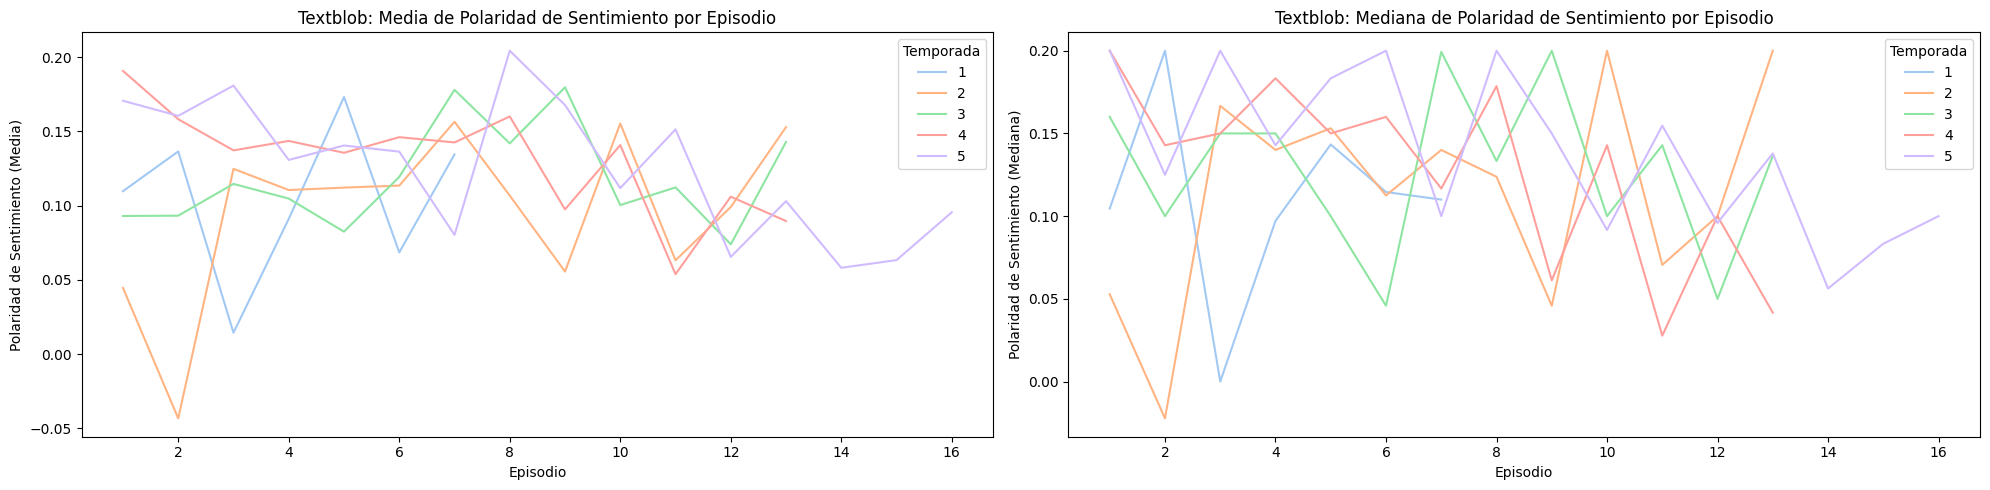

In [23]:
# Realizamos plots de estas medidas centrales

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

# Primer subplot: Media
sns.lineplot(data=plot_media_episodio, x='Episodio', y='textblob_sentiment', hue='Temporada', ax=axs[0], palette='pastel')
axs[0].set_title('Textblob: Media de Polaridad de Sentimiento por Episodio')
axs[0].set_ylabel('Polaridad de Sentimiento (Media)')
axs[0].legend(title='Temporada')

# Segundo subplot: Mediana
sns.lineplot(data=plot_mediana_episodio, x='Episodio', y='textblob_sentiment', hue='Temporada', ax=axs[1], palette='pastel')
axs[1].set_title('Textblob: Mediana de Polaridad de Sentimiento por Episodio')
axs[1].set_ylabel('Polaridad de Sentimiento (Mediana)')
axs[1].legend(title='Temporada')

# Ajustar el layout
plt.xlabel('Episodio')
plt.tight_layout()
plt.show()

#### Líneas de tendencia de la Polaridad de Sentimiento por cada temporada

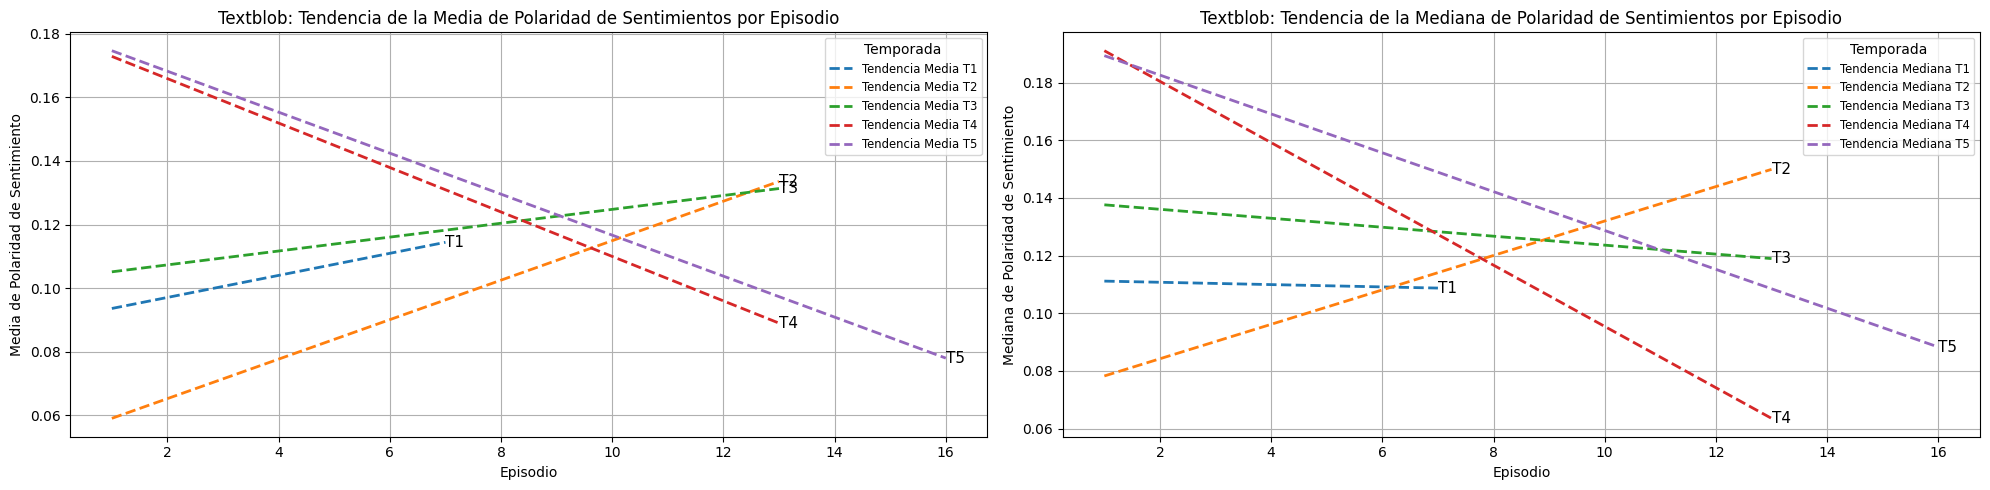

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

# Configurar títulos y etiquetas para el primer subplot: Media
axs[0].set_title('Textblob: Tendencia de la Media de Polaridad de Sentimientos por Episodio')
axs[0].set_xlabel('Episodio')
axs[0].set_ylabel('Media de Polaridad de Sentimiento')
axs[0].grid(True)

# Configurar títulos y etiquetas para el segundo subplot: Mediana
axs[1].set_title('Textblob: Tendencia de la Mediana de Polaridad de Sentimientos por Episodio')
axs[1].set_xlabel('Episodio')
axs[1].set_ylabel('Mediana de Polaridad de Sentimiento')
axs[1].grid(True)

# Para cada temporada, agregamos una línea de tendencia en ambos subplots
for temporada in final_df_reducido['Temporada'].unique():
    # Filtrar los datos por temporada
    data_temp_mean = plot_media_episodio[plot_media_episodio['Temporada'] == temporada]
    data_temp_median = plot_mediana_episodio[plot_mediana_episodio['Temporada'] == temporada]

    # Ajustar una línea de tendencia con numpy.polyfit (orden 1 para una línea recta) para media
    z_mean = np.polyfit(data_temp_mean['Episodio'], data_temp_mean['textblob_sentiment'], 1)
    p_mean = np.poly1d(z_mean)

    # Graficar la línea de tendencia (solo la línea, sin los datos originales)
    axs[0].plot(data_temp_mean['Episodio'], p_mean(data_temp_mean['Episodio']),
                linestyle='--', linewidth=2, label=f'Tendencia Media T{str(temporada)}')

    # Añadir el texto para la línea de media
    axs[0].text(data_temp_mean['Episodio'].iloc[-1], p_mean(data_temp_mean['Episodio'].iloc[-1]), f'T{temporada}', fontsize=11, verticalalignment='center', horizontalalignment='left')

    # Ajustar una línea de tendencia para mediana
    z_median = np.polyfit(data_temp_median['Episodio'], data_temp_median['textblob_sentiment'], 1)
    p_median = np.poly1d(z_median)

    # Graficar la línea de tendencia para mediana
    axs[1].plot(data_temp_median['Episodio'], p_median(data_temp_median['Episodio']), linestyle='--', linewidth=2, label=f'Tendencia Mediana T{str(temporada)}')

    # Añadir el texto para la línea de mediana
    axs[1].text(data_temp_median['Episodio'].iloc[-1], p_median(data_temp_median['Episodio'].iloc[-1]), f'T{temporada}', fontsize=11, verticalalignment='center', horizontalalignment='left')

# Añadir leyenda solo a los subplots de media
axs[0].legend(title='Temporada', loc='upper right', fontsize='small')
axs[1].legend(title='Temporada', loc='upper right', fontsize='small')

# Ajustar el layout
plt.tight_layout()
plt.show()

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para todos los personajes

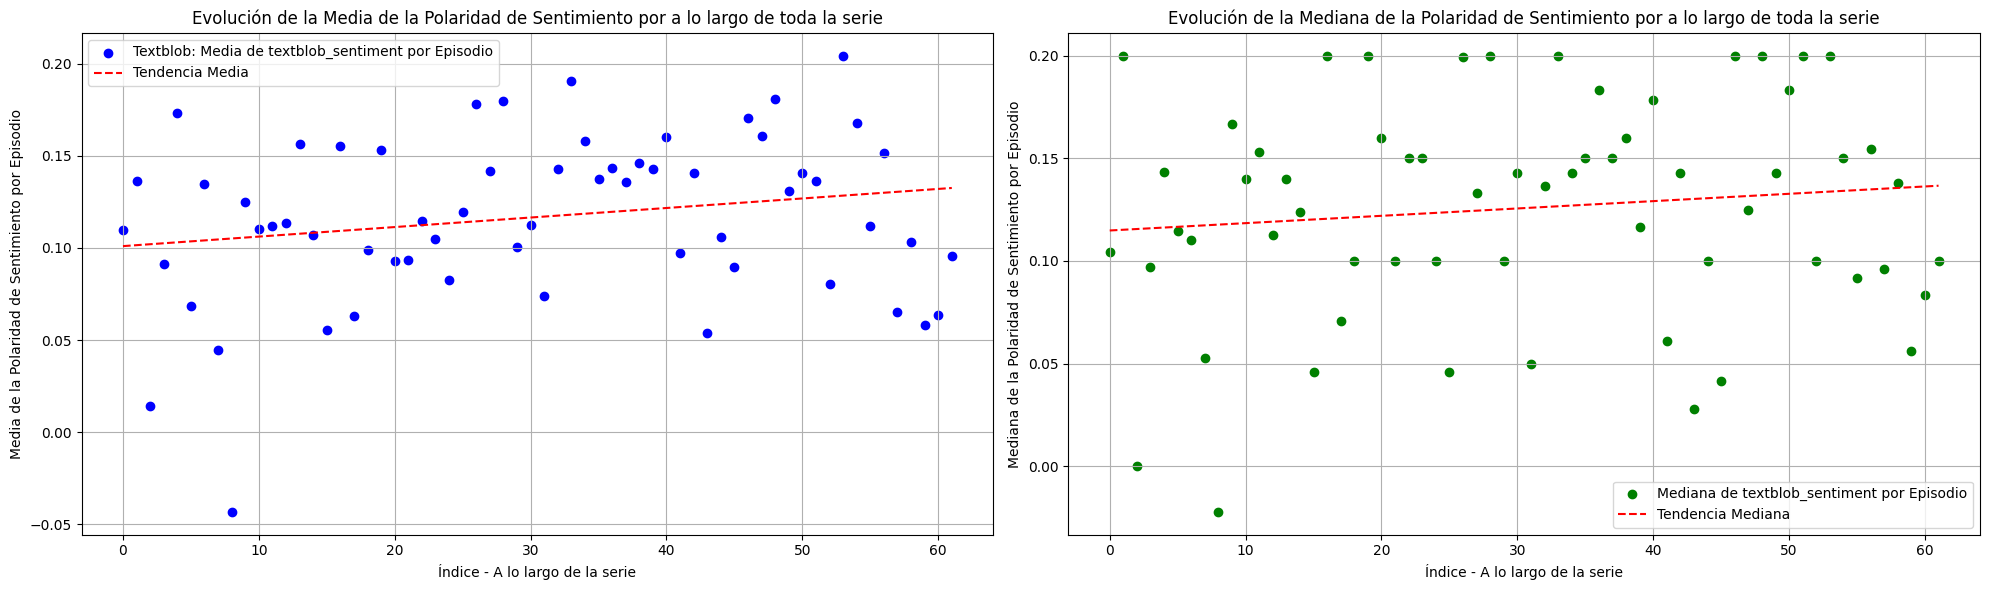

In [25]:
from sklearn.linear_model import LinearRegression

# Creamos los de subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True)

# Primer subplot: Media
axs[0].scatter(plot_media_episodio.index, plot_media_episodio['textblob_sentiment'], color='blue', label='Textblob: Media de textblob_sentiment por Episodio')

# Ajustamos la línea de regresión lineal para la media
X_mean = plot_media_episodio.index.values.reshape(-1, 1)  # Reshape para sklearn
y_mean = plot_media_episodio['textblob_sentiment']
model_mean = LinearRegression().fit(X_mean, y_mean)
y_pred_mean = model_mean.predict(X_mean)

# Realizarmos scatterplot de la línea de tendencia para la media
axs[0].plot(plot_media_episodio.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

# Añadimos títulos y nombres de ejes al primer subplot
axs[0].set_title('Evolución de la Media de la Polaridad de Sentimiento por a lo largo de toda la serie')
axs[0].set_xlabel('Índice - A lo largo de la serie')
axs[0].set_ylabel('Media de la Polaridad de Sentimiento por Episodio')
axs[0].legend()
axs[0].grid(True)

# Segundo subplot: Mediana
axs[1].scatter(plot_mediana_episodio.index, plot_mediana_episodio['textblob_sentiment'], color='green', label='Mediana de textblob_sentiment por Episodio')

# Ajustamos la línea de regresión lineal para la mediana
X_median = plot_mediana_episodio.index.values.reshape(-1, 1)  # Reshape para sklearn
y_median = plot_mediana_episodio['textblob_sentiment']
model_median = LinearRegression().fit(X_median, y_median)
y_pred_median = model_median.predict(X_median)

# Graficar línea de tendencia para la mediana
axs[1].plot(plot_mediana_episodio.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

# Configurar el segundo subplot
axs[1].set_title('Evolución de la Mediana de la Polaridad de Sentimiento por a lo largo de toda la serie')
axs[1].set_xlabel('Índice - A lo largo de la serie')
axs[1].set_ylabel('Mediana de la Polaridad de Sentimiento por Episodio')
axs[1].legend()
axs[1].grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para Walter

In [26]:
# Filtramos el df_reducido por un único personaje: Walter White, ya que es su maldad la que debemos estudiar

final_df_reducido_walter = final_df_reducido[final_df_reducido['Personaje'] == 'walter']

# Extraemos dos medidas centrales, la media y la mediana, de polaridad de sentimiento de Textblob por cada episodio de cada temporada del personaje Walter White

plot_media_episodio_walter = final_df_reducido_walter.groupby(['Temporada', 'Episodio'])['textblob_sentiment'].mean().reset_index()

plot_media_episodio_walter

plot_mediana_episodio_walter = final_df_reducido_walter.groupby(['Temporada', 'Episodio'])['textblob_sentiment'].median().reset_index()

plot_mediana_episodio_walter

Temporada  Episodio  textblob_sentiment
0           1         1            0.128788
1           1         2            0.182370
2           1         3            0.000000
3           1         4            0.000000
4           1         5            0.180000
5           1         6            0.129167
6           1         7            0.214583
7           2         1            0.105195
8           2         2           -0.128125
9           2         3            0.100000
10          2         4            0.242857
11          2         5            0.200000
12          2         6            0.138839
13          2         7            0.075000
14          2         8           -0.050000
15          2         9            0.079762
16          2        10            0.106667
17          2        11            0.000000
18          2        12            0.100000
19          2        13            0.285714
20          3         1            0.087054
21          3         2            0.205357
22          3         3            0.000000
23          3         4            0.184821
24          3         5           -0.107143
25          3         6            0.075000
26          3         7            0.000000
27          3         8            0.200000
28          3         9            0.136364
29          3        10            0.125000
30          3        11            0.200000
31          3        12            0.000000
32          3        13            0.079762
33          4         6            0.200000
34          4        11            0.000000
35          5         7            0.170000
36          5         9            0.200000
37          5        13            0.112500
38          5        14            0.100000
39          5        15            0.000000
40          5        16            0.112121

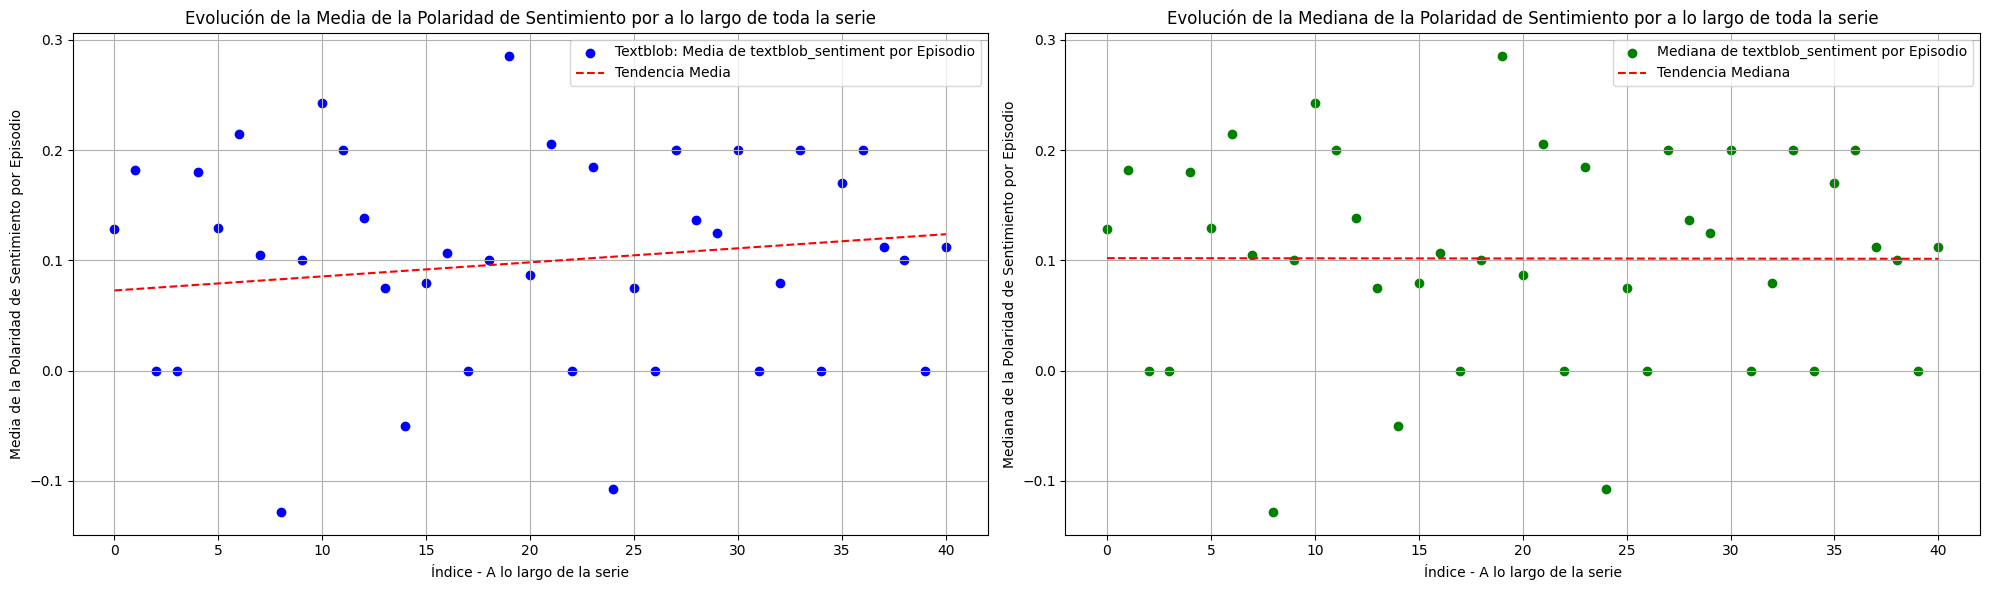

In [27]:
# Creamos los de subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True)

# Primer subplot: Media
axs[0].scatter(plot_media_episodio_walter.index, plot_mediana_episodio_walter['textblob_sentiment'], color='blue', label='Textblob: Media de textblob_sentiment por Episodio')

# Ajustamos la línea de regresión lineal para la media
X_mean = plot_media_episodio_walter.index.values.reshape(-1, 1)
y_mean = plot_media_episodio_walter['textblob_sentiment']
model_mean = LinearRegression().fit(X_mean, y_mean)
y_pred_mean = model_mean.predict(X_mean)

# Realizamos plot de la línea de tendencia para la media
axs[0].plot(plot_media_episodio_walter.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

# Añadimos títulos y nombres de ejes al primer subplot
axs[0].set_title('Evolución de la Media de la Polaridad de Sentimiento por a lo largo de toda la serie')
axs[0].set_xlabel('Índice - A lo largo de la serie')
axs[0].set_ylabel('Media de la Polaridad de Sentimiento por Episodio')
axs[0].legend()
axs[0].grid(True)

# Segundo subplot: Mediana
axs[1].scatter(plot_mediana_episodio_walter.index, plot_mediana_episodio_walter['textblob_sentiment'], color='green', label='Mediana de textblob_sentiment por Episodio')

# Ajustamos la línea de regresión lineal para la mediana
X_median = plot_mediana_episodio_walter.index.values.reshape(-1, 1)
y_median = plot_mediana_episodio_walter['textblob_sentiment']
model_median = LinearRegression().fit(X_median, y_median)
y_pred_median = model_median.predict(X_median)

# Realizamos plot de la línea de tendencia para la mediana
axs[1].plot(plot_mediana_episodio_walter.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

# Añadimos títulos y nombres de ejes al segundo subplot
axs[1].set_title('Evolución de la Mediana de la Polaridad de Sentimiento por a lo largo de toda la serie')
axs[1].set_xlabel('Índice - A lo largo de la serie')
axs[1].set_ylabel('Mediana de la Polaridad de Sentimiento por Episodio')
axs[1].legend()
axs[1].grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

## <font color='red'>TEXTBLOB con Custom Lexicon</font>

**Escala:** de -1 (totalmente negativo) a 1 (totalmente positivo), 0 significa neutral (sin carga sentimental).

Se mezcla el Lexicon por defecto con un Lexicon custom realizado por nosotras que recupera las palabras "malas" y les asigna un score negativo. El Textblob las procesará esas palabras con nuestra puntuación en vez de con la de por defecto.

### Importar nuestro custom Lexicon de palabras "malas" como diccionario

In [28]:
import pandas as pd

df = pd.read_excel('/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/lexicons/custom_lexicon_for_textblob.xlsx')

# Convertirmos el dataframe en un diccionario para que la función siguiente la pueda procesar
custom_negative_words = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))

print(custom_negative_words)

{'abandoned': -0.8, 'absolutelynone': -0.8, 'abuse': -0.8, 'accident': -0.6, 'addiction': -0.8, 'affair': -0.6, 'afraid': -0.6, 'agitated': -0.6, 'aint': -0.4, 'alcoholic': -0.7, 'alone': -0.6, 'anal': -0.5, 'angrily': -0.8, 'angry': -0.8, 'annoying': -0.6, 'ant': -0.4, 'anxiety': -0.7, 'anxious': -0.7, 'apologize': -0.6, 'arent': -0.5, 'argument': -0.6, 'arrest': -0.9, 'arrested': -0.9, 'arresting': -0.9, 'ash': -0.3, 'ashamed': -0.9, 'assassin': -1.0, 'assault': -1.0, 'asshole': -0.9, 'attack': -0.8, 'awful': -0.9, 'back': -0.2, 'backfire': -0.5, 'backslid': -0.5, 'bad': -0.7, 'badger': -0.5, 'bam': -0.5, 'bandaids': -0.2, 'barely': -0.5, 'bastard': -0.8, 'beaner': -1.0, 'betrayal': -0.7, 'bitch': -0.8, 'blackmailing': -0.9, 'bleeding': -0.6, 'blew': -0.5, 'blood': -0.7, 'bloodshed': -0.9, 'blow': -0.5, 'bomb': -0.6, 'bonehead': -0.7, 'bore': -0.5, 'bored': -0.5, 'bothered': -0.6, 'breakdown': -0.6, 'breakin': -0.5, 'breaking': -0.5, 'broke': -0.7, 'broken': -0.7, 'bullshit': -0.9, '

### Definir la función que obtiene los sentimientos con TEXTBLOB (incluyendo el Lexicon custom) y aplicarla a nuestro dataset

In [29]:
from textblob import TextBlob

# Custom sentiment function
def textblob_custom_sentiment(words):
    # Initialize total sentiment score
    custom_score = 0.0  # Ensure it's a float to handle decimal values
    custom_count = 0

    # Check if any words are in the custom sentiment dictionary
    for word in words:
        word_lower = word.lower()  # Convert word to lowercase

        # Safely get the value from the dictionary, or return None if not found
        sentiment_value = custom_negative_words.get(word_lower)

        # If the word exists in the custom dictionary, add its value
        if sentiment_value is not None:
            custom_score += sentiment_value
            custom_count += 1

    # Calculate average score for custom words if any were found
    if custom_count > 0:
        custom_avg_score = custom_score / custom_count
    else:
        # If no custom words are found, use TextBlob sentiment
        custom_avg_score = TextBlob(' '.join(words)).sentiment.polarity

    return custom_avg_score

In [30]:
final_df.loc[:, 'textblob_custom_sentiment'] = final_df['Palabras_clave'].apply(textblob_custom_sentiment)

# output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments_custom_sentiments.xlsx'

# final_df.to_excel(output_path, index=False)

### Dibujar el Histograma de los sentimientos extraídos con TEXTBLOB para ver su distribución

Vemos que hay una enorme cantidad de valores neutros (cero o cercanos a cero).

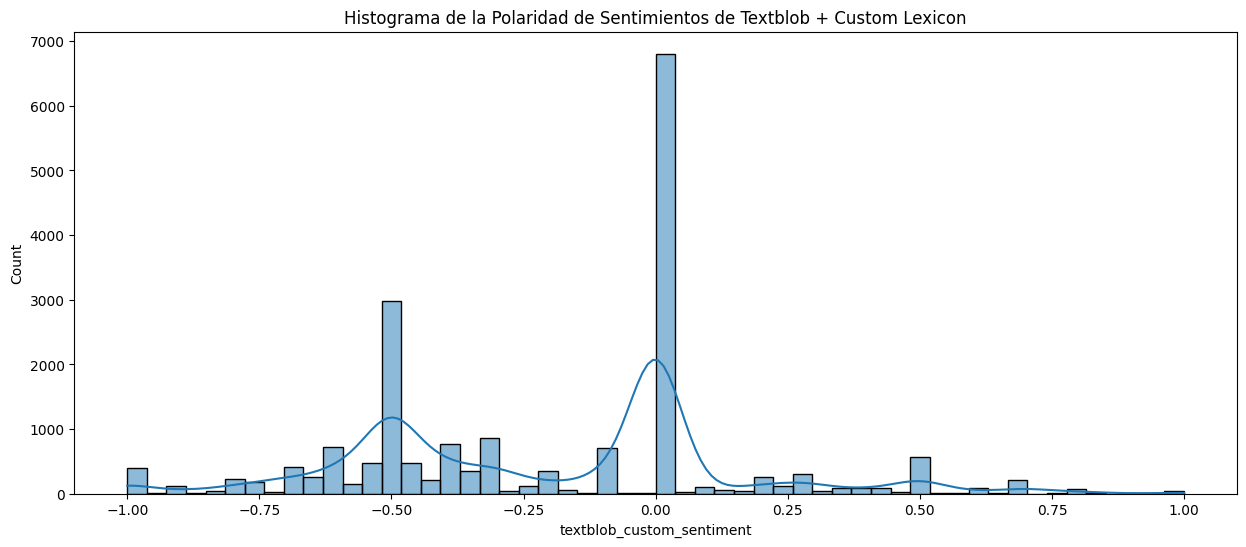

In [31]:
plt.figure(1 , figsize = (15 , 6))
n = 0
sns.histplot(final_df['textblob_custom_sentiment'] , kde=True)
plt.title('Histograma de la Polaridad de Sentimientos de Textblob + Custom Lexicon')
plt.show()

Observamos que al añadir el Lexicon custom con una puntuación mayor para las palabras negativas, la distribución se sesga hacia la parte negativa.

### Quitar el 90% de los valores neutros para equilibrar el dataset

Con el fin de reequilibrar el dataset, decidimos quitar el 90% de los valores 0, dejamos únicamente el 10%.

In [32]:
# Fitramos las filas que tienen un valor de 0 en 'textblob_sentiment'

neutros = final_df[final_df['textblob_custom_sentiment'] == 0.0]

# Seleccionamos una muestra aletoria del 90% de las filas que tienen 0 y las eliminamos

neutros_a_eliminar = neutros.sample(frac=0.9, random_state=10)

# Eliminamos esas filas del dataset original

final_df_reducido = final_df.drop(neutros_a_eliminar.index)

# Verificamos que el número de neutros se ha reducido adecuadamente

neutros_restantes = final_df_reducido[final_df_reducido['textblob_custom_sentiment'] == 0.0]

print(f"Número de neutros originales: {len(neutros)}")
print(f"Número de neutros restantes (10%): {len(neutros_restantes)}")

Número de neutros originales: 6797
Número de neutros restantes (10%): 680


### Realizar plot de la frecuencia de polaridad de sentimientos por cada personaje principal

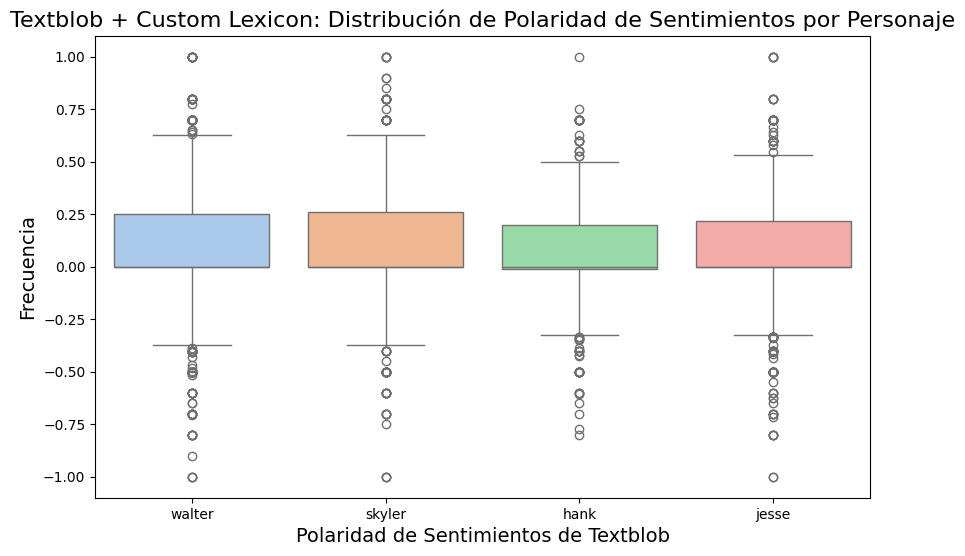

In [33]:
# Nos enfocamos en los 4 principales personajes de la serie

personajes_seleccionados = ['walter', 'jesse', 'skyler', 'hank']
df_personajes_seleccionados = final_df_reducido[final_df_reducido['Personaje'].isin(personajes_seleccionados)]

# Realizamos plot de la distribución de sentimientos por cada unos de los personajes seleccionados Plot sentiment distribution with 'Personaje' as hue

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='textblob_sentiment', hue='Personaje', palette='pastel')

# Set title and labels
plt.title('Textblob + Custom Lexicon: Distribución de Polaridad de Sentimientos por Personaje', fontsize=16)
plt.xlabel('Polaridad de Sentimientos de Textblob', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Display the plot
plt.show()

Observamos que al añadir el Lexicon custom con una puntuación mayor para las palabras negativas, las medianas se reducen considerablemente.

### Agrupar sentimientos por la media y la mediana de cada episodio y realizar distintos plots

In [34]:
# Extraemos dos medidas centrales, la media y la mediana, de polaridad de sentimiento de Textblob por cada episodio de cada temporada de todos los personajes

plot_media_episodio = final_df_reducido.groupby(['Temporada', 'Episodio'])['textblob_custom_sentiment'].mean().reset_index()

plot_media_episodio

plot_mediana_episodio = final_df_reducido.groupby(['Temporada', 'Episodio'])['textblob_custom_sentiment'].median().reset_index()

plot_mediana_episodio

Temporada  Episodio  textblob_custom_sentiment
0           1         1                  -0.450000
1           1         2                  -0.460000
2           1         3                  -0.500000
3           1         4                  -0.400000
4           1         5                  -0.450000
5           1         6                  -0.500000
6           1         7                  -0.500000
7           2         1                  -0.475000
8           2         2                  -0.500000
9           2         3                  -0.500000
10          2         4                  -0.400000
11          2         5                  -0.425000
12          2         6                  -0.480000
13          2         7                  -0.500000
14          2         8                  -0.500000
15          2         9                  -0.419643
16          2        10                  -0.433333
17          2        11                  -0.500000
18          2        12                  -0.463333
19          2        13                  -0.400000
20          3         1                  -0.374242
21          3         2                  -0.500000
22          3         3                  -0.487500
23          3         4                  -0.450000
24          3         5                  -0.408333
25          3         6                  -0.500000
26          3         7                  -0.500000
27          3         8                  -0.441667
28          3         9                  -0.440000
29          3        10                  -0.500000
30          3        11                  -0.450000
31          3        12                  -0.500000
32          3        13                  -0.433333
33          4         1                  -0.400000
34          4         2                  -0.450000
35          4         3                  -0.400000
36          4         4                  -0.400000
37          4         5                  -0.400000
38          4         6                  -0.400000
39          4         7                  -0.366667
40          4         8                  -0.433333
41          4         9                  -0.436667
42          4        10                  -0.400000
43          4        11                  -0.500000
44          4        12                  -0.500000
45          4        13                  -0.400000
46          5         1                  -0.400000
47          5         2                  -0.300000
48          5         3                  -0.400000
49          5         4                  -0.400000
50          5         5                  -0.373333
51          5         6                  -0.400000
52          5         7                  -0.447727
53          5         8                  -0.341667
54          5         9                  -0.400000
55          5        10                  -0.400000
56          5        11                  -0.400000
57          5        12                  -0.450000
58          5        13                  -0.450000
59          5        14                  -0.475439
60          5        15                  -0.465000
61          5        16                  -0.400000

#### Lineplot de la Polaridad de Sentimiento por Temporada y Episodio

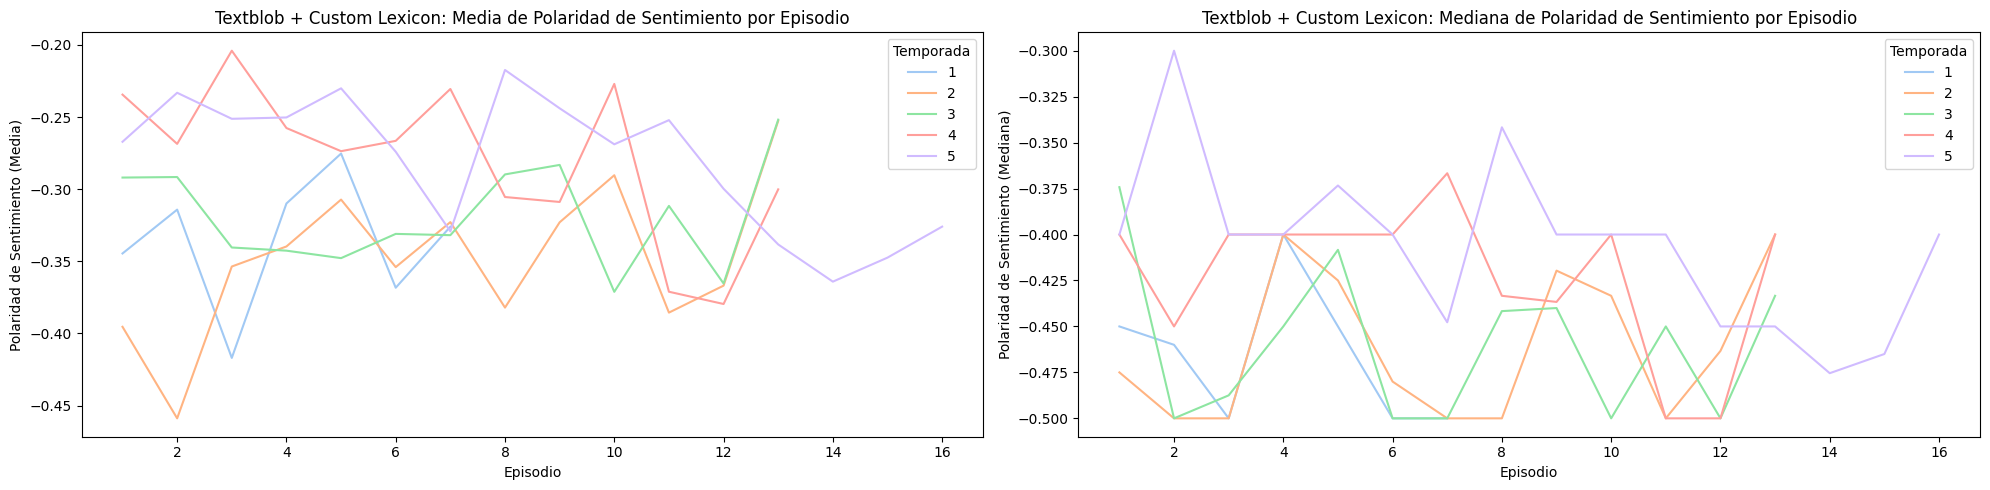

In [35]:
# Realizamos plots de estas medidas centrales

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

# Primer subplot: Media
sns.lineplot(data=plot_media_episodio, x='Episodio', y='textblob_custom_sentiment', hue='Temporada', ax=axs[0], palette='pastel')
axs[0].set_title('Textblob + Custom Lexicon: Media de Polaridad de Sentimiento por Episodio')
axs[0].set_ylabel('Polaridad de Sentimiento (Media)')
axs[0].legend(title='Temporada')

# Segundo subplot: Mediana
sns.lineplot(data=plot_mediana_episodio, x='Episodio', y='textblob_custom_sentiment', hue='Temporada', ax=axs[1], palette='pastel')
axs[1].set_title('Textblob + Custom Lexicon: Mediana de Polaridad de Sentimiento por Episodio')
axs[1].set_ylabel('Polaridad de Sentimiento (Mediana)')
axs[1].legend(title='Temporada')

# Ajustar el layout
plt.xlabel('Episodio')
plt.tight_layout()
plt.show()

#### Líneas de tendencia de la Polaridad de Sentimiento por cada temporada

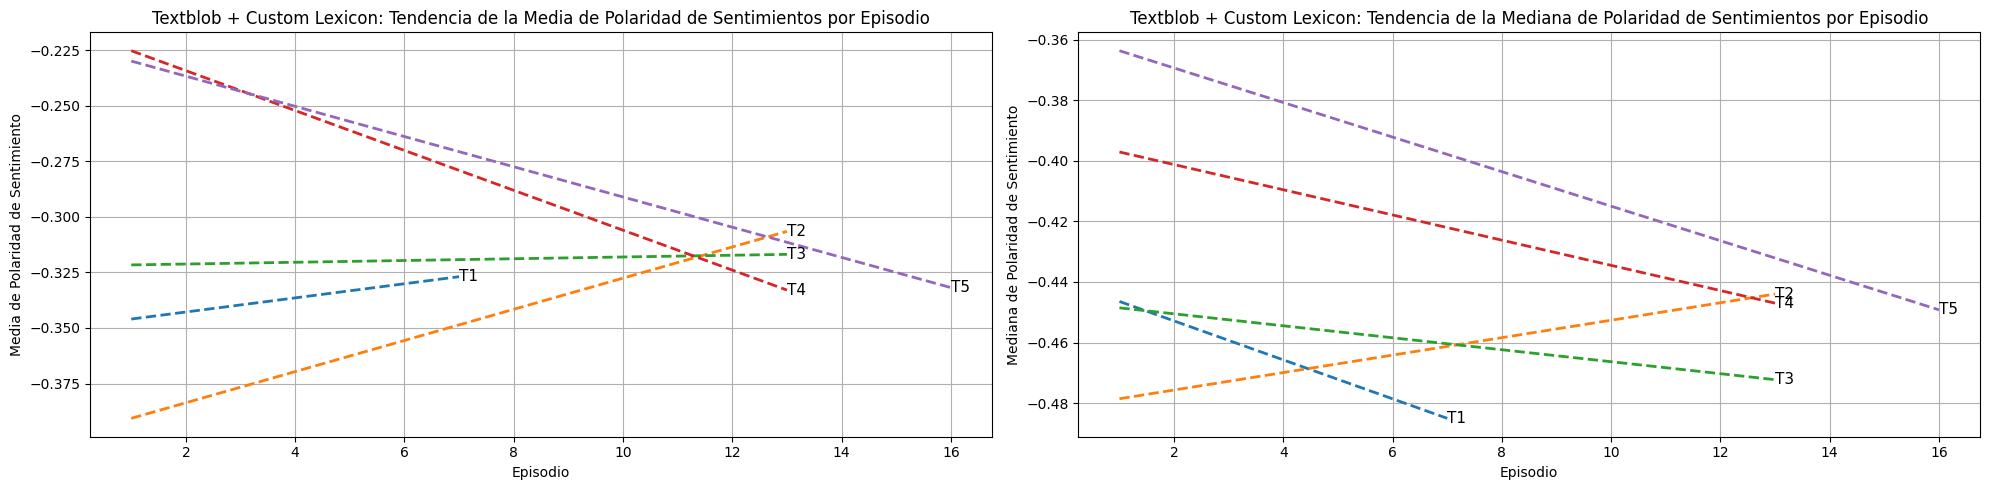

In [36]:
# Crear la figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

# Configurar títulos y etiquetas para el primer subplot: Media
axs[0].set_title('Textblob + Custom Lexicon: Tendencia de la Media de Polaridad de Sentimientos por Episodio')
axs[0].set_xlabel('Episodio')
axs[0].set_ylabel('Media de Polaridad de Sentimiento')
axs[0].grid(True)

# Configurar títulos y etiquetas para el segundo subplot: Mediana
axs[1].set_title('Textblob + Custom Lexicon: Tendencia de la Mediana de Polaridad de Sentimientos por Episodio')
axs[1].set_xlabel('Episodio')
axs[1].set_ylabel('Mediana de Polaridad de Sentimiento')
axs[1].grid(True)

# Para cada temporada, agregamos una línea de tendencia en ambos subplots
for temporada in final_df_reducido['Temporada'].unique():
    # Filtrar los datos por temporada
    data_temp_mean = plot_media_episodio[plot_media_episodio['Temporada'] == temporada]
    data_temp_median = plot_mediana_episodio[plot_mediana_episodio['Temporada'] == temporada]

    # Ajustar una línea de tendencia con numpy.polyfit (orden 1 para una línea recta) para media
    z_mean = np.polyfit(data_temp_mean['Episodio'], data_temp_mean['textblob_custom_sentiment'], 1)
    p_mean = np.poly1d(z_mean)

    # Graficar la línea de tendencia (solo la línea, sin los datos originales)
    axs[0].plot(data_temp_mean['Episodio'], p_mean(data_temp_mean['Episodio']),
                linestyle='--', linewidth=2, label=f'Tendencia Media T{str(temporada)}')

    # Añadir el texto para la línea de media
    axs[0].text(data_temp_mean['Episodio'].iloc[-1], p_mean(data_temp_mean['Episodio'].iloc[-1]), f'T{temporada}', fontsize=11, verticalalignment='center', horizontalalignment='left')

    # Ajustar una línea de tendencia para mediana
    z_median = np.polyfit(data_temp_median['Episodio'], data_temp_median['textblob_custom_sentiment'], 1)
    p_median = np.poly1d(z_median)

    # Graficar la línea de tendencia para mediana
    axs[1].plot(data_temp_median['Episodio'], p_median(data_temp_median['Episodio']), linestyle='--', linewidth=2, label=f'Tendencia Mediana T{str(temporada)}')

    # Añadir el texto para la línea de mediana
    axs[1].text(data_temp_median['Episodio'].iloc[-1], p_median(data_temp_median['Episodio'].iloc[-1]), f'T{temporada}', fontsize=11, verticalalignment='center', horizontalalignment='left')

# Ajustar el layout
plt.tight_layout()
plt.show()

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para todos los personajes

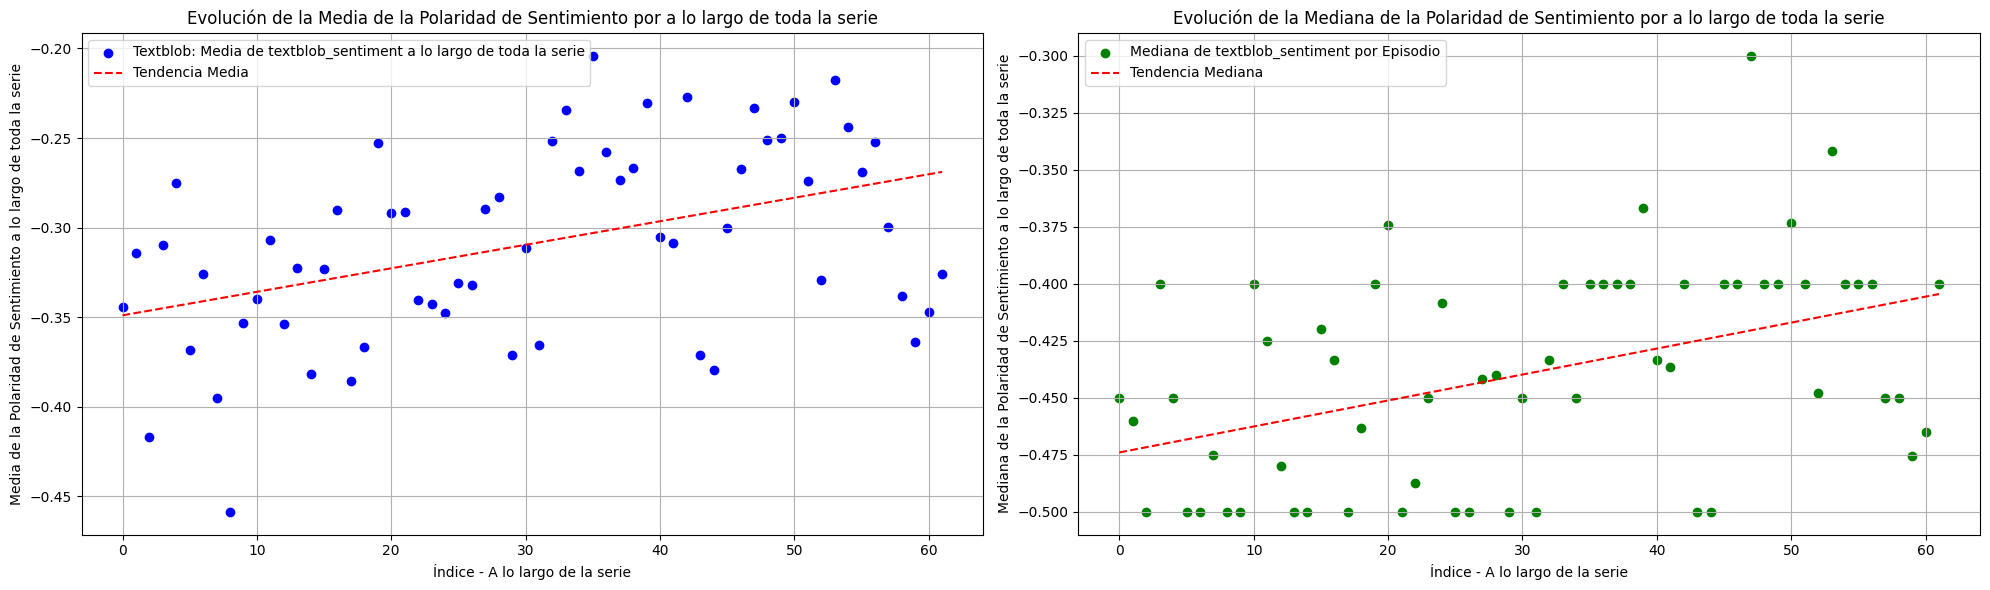

In [37]:
# Creamos los de subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True)

# Primer subplot: Media
axs[0].scatter(plot_media_episodio.index, plot_media_episodio['textblob_custom_sentiment'], color='blue', label='Textblob: Media de textblob_sentiment a lo largo de toda la serie')

# Ajustamos la línea de regresión lineal para la media
X_mean = plot_media_episodio.index.values.reshape(-1, 1)  # Reshape para sklearn
y_mean = plot_media_episodio['textblob_custom_sentiment']
model_mean = LinearRegression().fit(X_mean, y_mean)
y_pred_mean = model_mean.predict(X_mean)

# Realizarmos scatterplot de la línea de tendencia para la media
axs[0].plot(plot_media_episodio.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

# Añadimos títulos y nombres de ejes al primer subplot
axs[0].set_title('Evolución de la Media de la Polaridad de Sentimiento por a lo largo de toda la serie')
axs[0].set_xlabel('Índice - A lo largo de la serie')
axs[0].set_ylabel('Media de la Polaridad de Sentimiento a lo largo de toda la serie')
axs[0].legend()
axs[0].grid(True)

# Segundo subplot: Mediana
axs[1].scatter(plot_mediana_episodio.index, plot_mediana_episodio['textblob_custom_sentiment'], color='green', label='Mediana de textblob_sentiment por Episodio')

# Ajustamos la línea de regresión lineal para la mediana
X_median = plot_mediana_episodio.index.values.reshape(-1, 1)  # Reshape para sklearn
y_median = plot_mediana_episodio['textblob_custom_sentiment']
model_median = LinearRegression().fit(X_median, y_median)
y_pred_median = model_median.predict(X_median)

# Graficar línea de tendencia para la mediana
axs[1].plot(plot_mediana_episodio.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

# Configurar el segundo subplot
axs[1].set_title('Evolución de la Mediana de la Polaridad de Sentimiento por a lo largo de toda la serie')
axs[1].set_xlabel('Índice - A lo largo de la serie')
axs[1].set_ylabel('Mediana de la Polaridad de Sentimiento a lo largo de toda la serie')
axs[1].legend()
axs[1].grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

Observamos que al manipular manualmente los scores negativos, conseguimos que la media y la mediana se sitúen en valores negativos, pero no conseguimos revertir la tendencia que sigue siendo ascendente.

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para Walter

In [38]:
# Filtramos el df_reducido por un único personaje: Walter White, ya que es su maldad la que debemos estudiar

final_df_reducido_walter = final_df_reducido[final_df_reducido['Personaje'] == 'walter']

# Extraemos dos medidas centrales, la media y la mediana, de polaridad de sentimiento de Textblob por cada episodio de cada temporada del personaje Walter White

plot_media_episodio_walter = final_df_reducido_walter.groupby(['Temporada', 'Episodio'])['textblob_sentiment'].mean().reset_index()

plot_media_episodio_walter

plot_mediana_episodio_walter = final_df_reducido_walter.groupby(['Temporada', 'Episodio'])['textblob_sentiment'].median().reset_index()

plot_mediana_episodio_walter

Temporada  Episodio  textblob_sentiment
0           1         1            0.000000
1           1         2            0.061498
2           1         3            0.000000
3           1         4            0.000000
4           1         5            0.000000
5           1         6            0.000000
6           1         7            0.000000
7           2         1            0.000000
8           2         2            0.000000
9           2         3            0.073988
10          2         4            0.000000
11          2         5            0.000000
12          2         6            0.100000
13          2         7            0.000000
14          2         8            0.000000
15          2         9            0.000000
16          2        10            0.000000
17          2        11            0.000000
18          2        12            0.042500
19          2        13            0.066667
20          3         1            0.013857
21          3         2            0.000000
22          3         3            0.000000
23          3         4            0.000000
24          3         5            0.000000
25          3         6            0.000000
26          3         7            0.000000
27          3         8            0.000000
28          3         9            0.000000
29          3        10            0.000000
30          3        11            0.047619
31          3        12            0.000000
32          3        13            0.000000
33          4         6            0.000000
34          4        11            0.000000
35          5         7            0.000000
36          5         9            0.150000
37          5        13            0.000000
38          5        14            0.000000
39          5        15            0.000000
40          5        16            0.000000

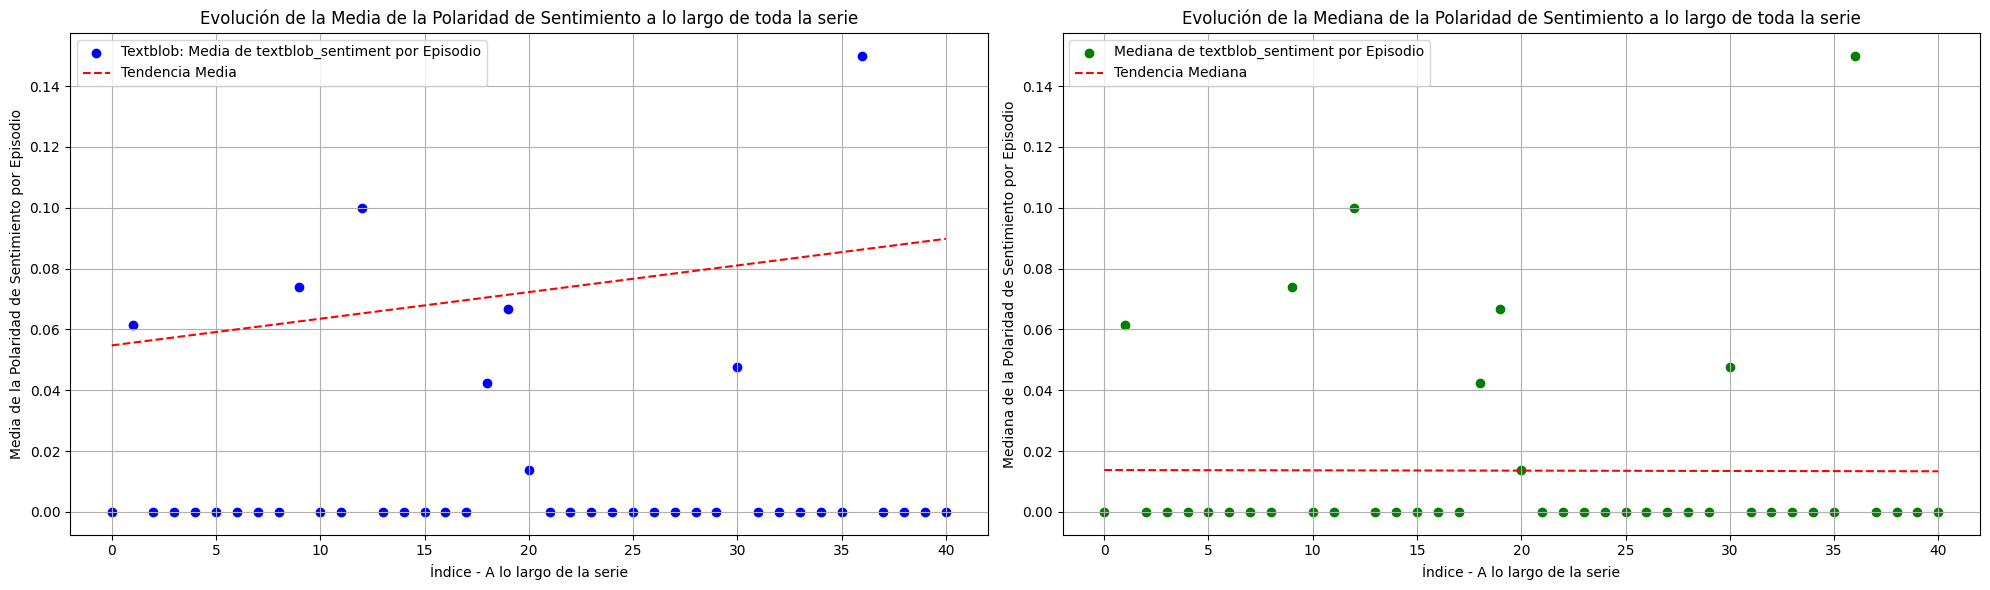

In [39]:
# Creamos los de subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True)

# Primer subplot: Media
axs[0].scatter(plot_media_episodio_walter.index, plot_mediana_episodio_walter['textblob_sentiment'], color='blue', label='Textblob: Media de textblob_sentiment por Episodio')

# Ajustamos la línea de regresión lineal para la media
X_mean = plot_media_episodio_walter.index.values.reshape(-1, 1)
y_mean = plot_media_episodio_walter['textblob_sentiment']
model_mean = LinearRegression().fit(X_mean, y_mean)
y_pred_mean = model_mean.predict(X_mean)

# Realizamos plot de la línea de tendencia para la media
axs[0].plot(plot_media_episodio_walter.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

# Añadimos títulos y nombres de ejes al primer subplot
axs[0].set_title('Evolución de la Media de la Polaridad de Sentimiento a lo largo de toda la serie')
axs[0].set_xlabel('Índice - A lo largo de la serie')
axs[0].set_ylabel('Media de la Polaridad de Sentimiento por Episodio')
axs[0].legend()
axs[0].grid(True)

# Segundo subplot: Mediana
axs[1].scatter(plot_mediana_episodio_walter.index, plot_mediana_episodio_walter['textblob_sentiment'], color='green', label='Mediana de textblob_sentiment por Episodio')

# Ajustamos la línea de regresión lineal para la mediana
X_median = plot_mediana_episodio_walter.index.values.reshape(-1, 1)
y_median = plot_mediana_episodio_walter['textblob_sentiment']
model_median = LinearRegression().fit(X_median, y_median)
y_pred_median = model_median.predict(X_median)

# Realizamos plot de la línea de tendencia para la mediana
axs[1].plot(plot_mediana_episodio_walter.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

# Añadimos títulos y nombres de ejes al segundo subplot
axs[1].set_title('Evolución de la Mediana de la Polaridad de Sentimiento a lo largo de toda la serie')
axs[1].set_xlabel('Índice - A lo largo de la serie')
axs[1].set_ylabel('Mediana de la Polaridad de Sentimiento por Episodio')
axs[1].legend()
axs[1].grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

## <font color='red'>VADER (Valence Aware Dictionary and sEntiment Reasoner)</font>

Diseñado específicamente para textos de redes sociales, funciona bien con textos cortos e informales.

### Instalar e importar la librería, definir la función que obtiene los sentimientos con VADER y aplicarla a nuestro dataset

In [40]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vader_get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()

    # If 'text' is a list of words, join them into a single string
    if isinstance(text, list):
        text = ' '.join(text)

    # Call the polarity_scores method on the text
    return analyzer.polarity_scores(text)

In [42]:
# Le pasamos la función previamente definida a nuestro dataset (Atencion: Puede tardar un poco porque le estamos pasando la columna Texto (sin preprocesar), en vez de la columna Palabras_clave (preprocesada) ya que Vader tiene en cuenta también los intensificadores, las negaciones y las puntuaciones).

final_df['Vader_sentimiento'] = final_df['Texto'].apply(vader_get_sentiment)

# output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments_customsentiments_vader.xlsx'

# final_df.to_excel(output_path, index=False)

#### Separar los resultados de Vader en diferentes columnas: score negativo, positivo, neutro y compound.

In [43]:
# Extract the 'negative' values
final_df['vader_negative'] = final_df['Vader_sentimiento'].apply(lambda x: x['neg'])

# final_df['vader_negative']

In [44]:
# Extract the 'neutral' values
final_df['vader_positive'] = final_df['Vader_sentimiento'].apply(lambda x: x['pos'])

# final_df['vader_positive']

In [45]:
# Extract the 'positive' values
final_df['vader_neutral'] = final_df['Vader_sentimiento'].apply(lambda x: x['neu'])

# final_df['vader_neutral']

In [46]:
# Extract the 'compound' values
final_df['vader_compound'] = final_df['Vader_sentimiento'].apply(lambda x: x['compound'])

# final_df['vader_compound']

In [47]:
# output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments_customsentiments_vaderseparados.xlsx'

# final_df.to_excel(output_path, index=False)

### Dibujar el Histograma de los sentimientos extraídos con VADER para ver su distribución

Vemos que hay una enorme cantidad de valores neutros (cero o cercanos a cero) en todos los scorings (negativo, positivo, neutro y compound).

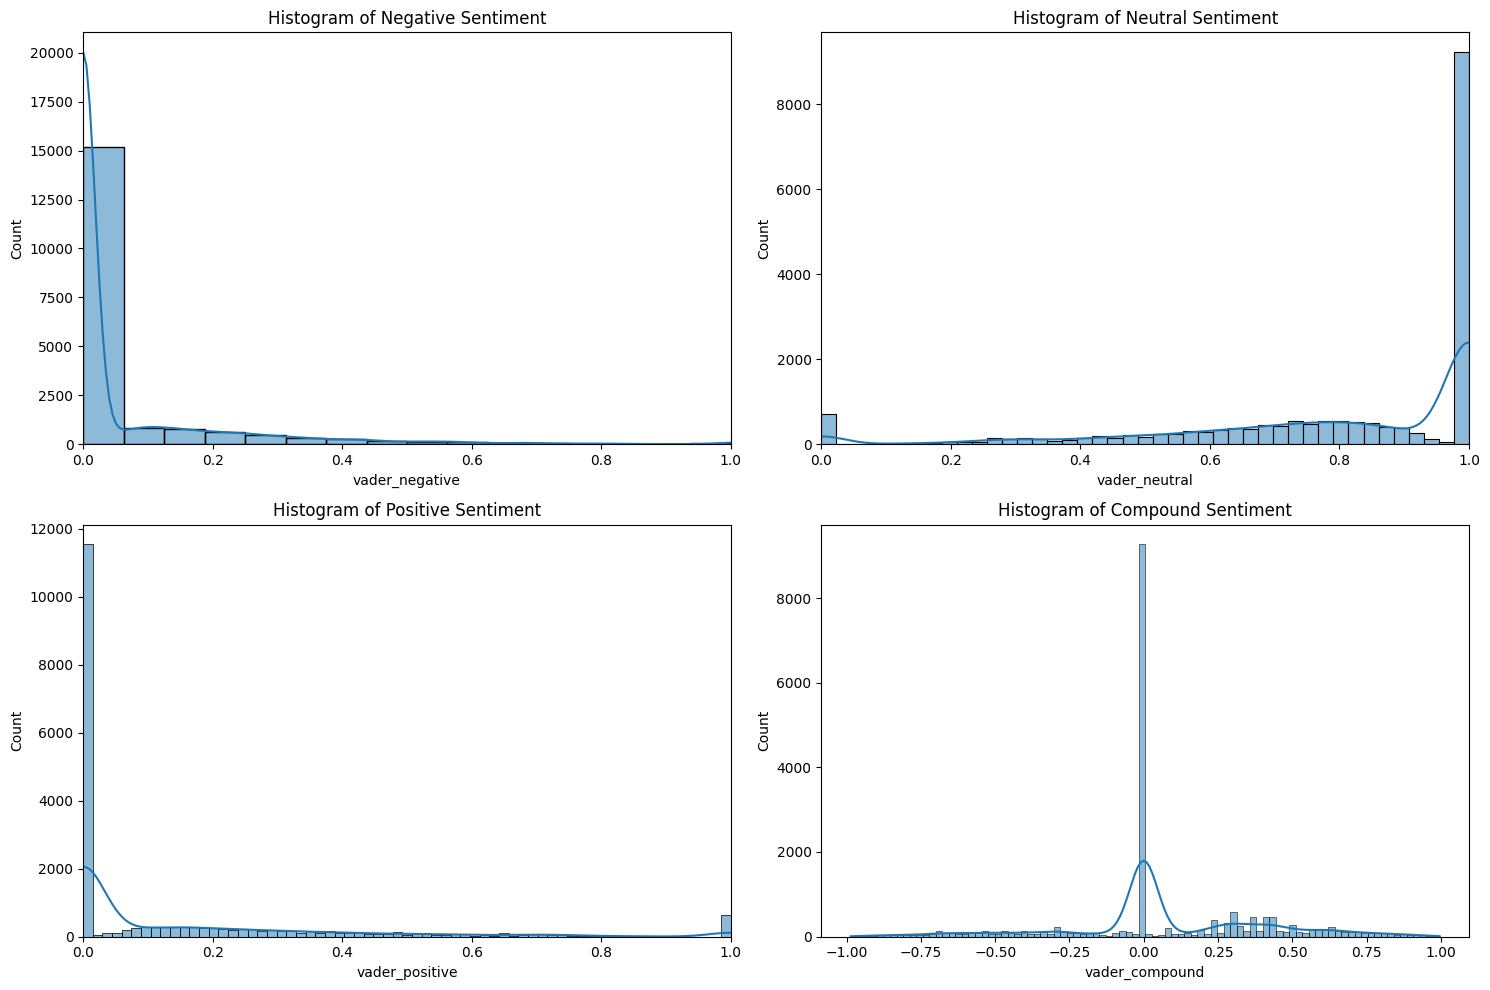

In [48]:
# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'neg'
sns.histplot(final_df['vader_negative'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Negative Sentiment')
axes[0, 0].set_xlim(0, 1)

# Plot for 'neu'
sns.histplot(final_df['vader_neutral'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Neutral Sentiment')
axes[0, 1].set_xlim(0, 1)

# Plot for 'pos'
sns.histplot(final_df['vader_positive'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Positive Sentiment')
axes[1, 0].set_xlim(0, 1)

# Plot for 'compound'
sns.histplot(final_df['vader_compound'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Compound Sentiment')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Quitar el 90% de los valores neutros para equilibrar el dataset

Con el fin de reequilibrar el dataset, decidimos quitar el 90% de los valores 0, dejamos únicamente el 10%. Realizaremos esta operación en los 4 scorings: negativo, positivo, neutro y compound.

In [49]:
# Filtramos las filas que tienen un valor de 0 en cada variable de Vader
variables = ['vader_negative', 'vader_positive', 'vader_neutral', 'vader_compound']
neutros_dict = {}  # Para almacenar el DataFrame de neutros de cada variable

for var in variables:
    neutros = final_df[(final_df[var] >= -0.02) & (final_df[var] <= 0.02)]
    # neutros = final_df[(final_df[var] == 0.0)]

    # Seleccionamos una muestra aleatoria del 90% de las filas que tienen 0 y las eliminamos
    neutros_a_eliminar = neutros.sample(frac=0.9, random_state=10)

    # Eliminamos esas filas del dataset original
    final_df_reducido = final_df.drop(neutros_a_eliminar.index)

    # Guardar el número de neutros restantes para verificación
    neutros_restantes = final_df_reducido[final_df_reducido[var] == 0.0]
    neutros_dict[var] = {
        "original": len(neutros),
        "remaining": len(neutros_restantes)
    }

# Verificamos que el número de neutros se ha reducido adecuadamente

# Verificamos que el número de neutros se ha reducido adecuadamente
for var, counts in neutros_dict.items():
    print(f"Número de neutros originales en {var}: {counts['original']}")
    print(f"Número de neutros restantes en {var} (10%): {counts['remaining']}")

Número de neutros originales en vader_negative: 14868
Número de neutros restantes en vader_negative (10%): 1485
Número de neutros originales en vader_positive: 11545
Número de neutros restantes en vader_positive (10%): 1155
Número de neutros originales en vader_neutral: 707
Número de neutros restantes en vader_neutral (10%): 71
Número de neutros originales en vader_compound: 9288
Número de neutros restantes en vader_compound (10%): 924


### Realizar plot de la frecuencia de polaridad de sentimientos por cada personaje principal

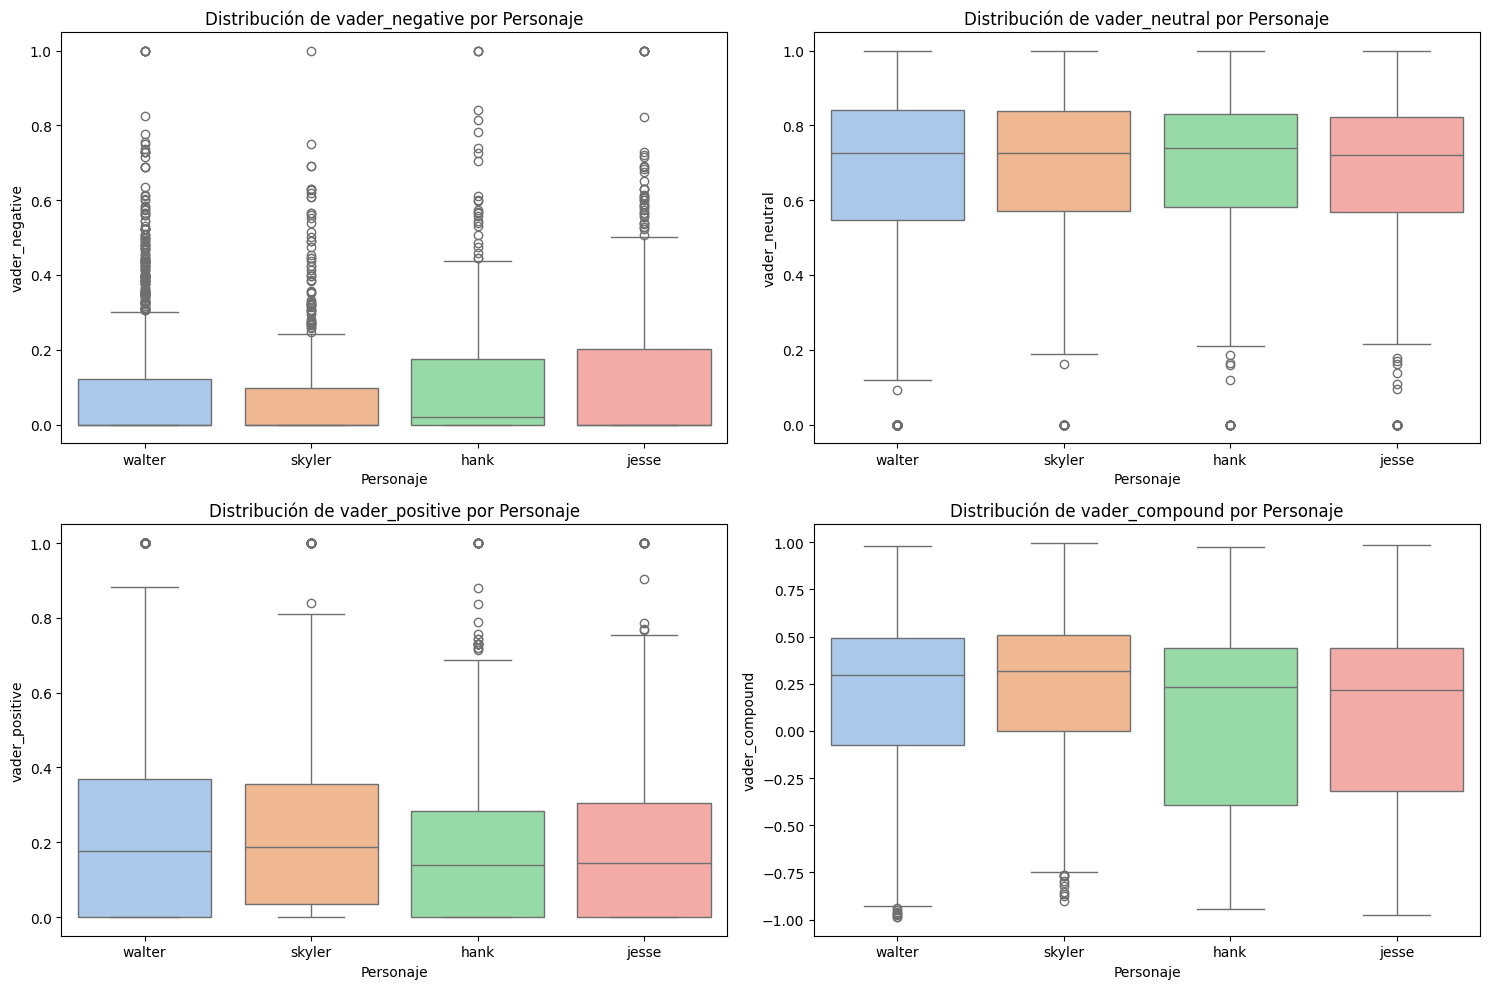

In [50]:
personajes_seleccionados = ['walter', 'jesse', 'skyler', 'hank']
df_personajes_seleccionados = final_df_reducido[final_df_reducido['Personaje'].isin(personajes_seleccionados)]

# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'neg'
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='vader_negative', hue='Personaje', palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de vader_negative por Personaje')

# Plot for 'neu'
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='vader_neutral', hue='Personaje', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de vader_neutral por Personaje')

# Plot for 'pos'
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='vader_positive', hue='Personaje', palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de vader_positive por Personaje')

# Plot for 'compound'
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='vader_compound', hue='Personaje', palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de vader_compound por Personaje')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Agrupar sentimientos por la media y la mediana de cada episodio y realizar distintos plots

In [51]:
vader_vars = ['vader_compound', 'vader_negative', 'vader_positive', 'vader_neutral']

In [52]:
vader_media_episodio = {}
vader_mediana_episodio = {}

for var in vader_vars:
    vader_media_episodio[var] = final_df_reducido.groupby(['Temporada', 'Episodio'])[var].mean().reset_index()

    vader_mediana_episodio[var] = final_df_reducido.groupby(['Temporada', 'Episodio'])[var].median().reset_index()

for var in vader_vars:
    print(f"\nGrouped mean for {var}:\n", vader_media_episodio[var])
    print(f"\nGrouped median for {var}:\n", vader_mediana_episodio[var])


Grouped mean for vader_compound:
     Temporada  Episodio  vader_compound
0           1         1        0.105528
1           1         2        0.137795
2           1         3       -0.006092
3           1         4        0.201025
4           1         5        0.205752
5           1         6        0.119557
6           1         7        0.155727
7           2         1        0.032728
8           2         2        0.035836
9           2         3        0.121383
10          2         4        0.181571
11          2         5        0.189793
12          2         6        0.115695
13          2         7        0.148218
14          2         8        0.063467
15          2         9        0.048223
16          2        10        0.225424
17          2        11        0.134049
18          2        12        0.126658
19          2        13        0.239145
20          3         1        0.230772
21          3         2        0.215318
22          3         3        0.208260
23   

#### Lineplot de la Polaridad de Sentimiento por Temporada y Episodio

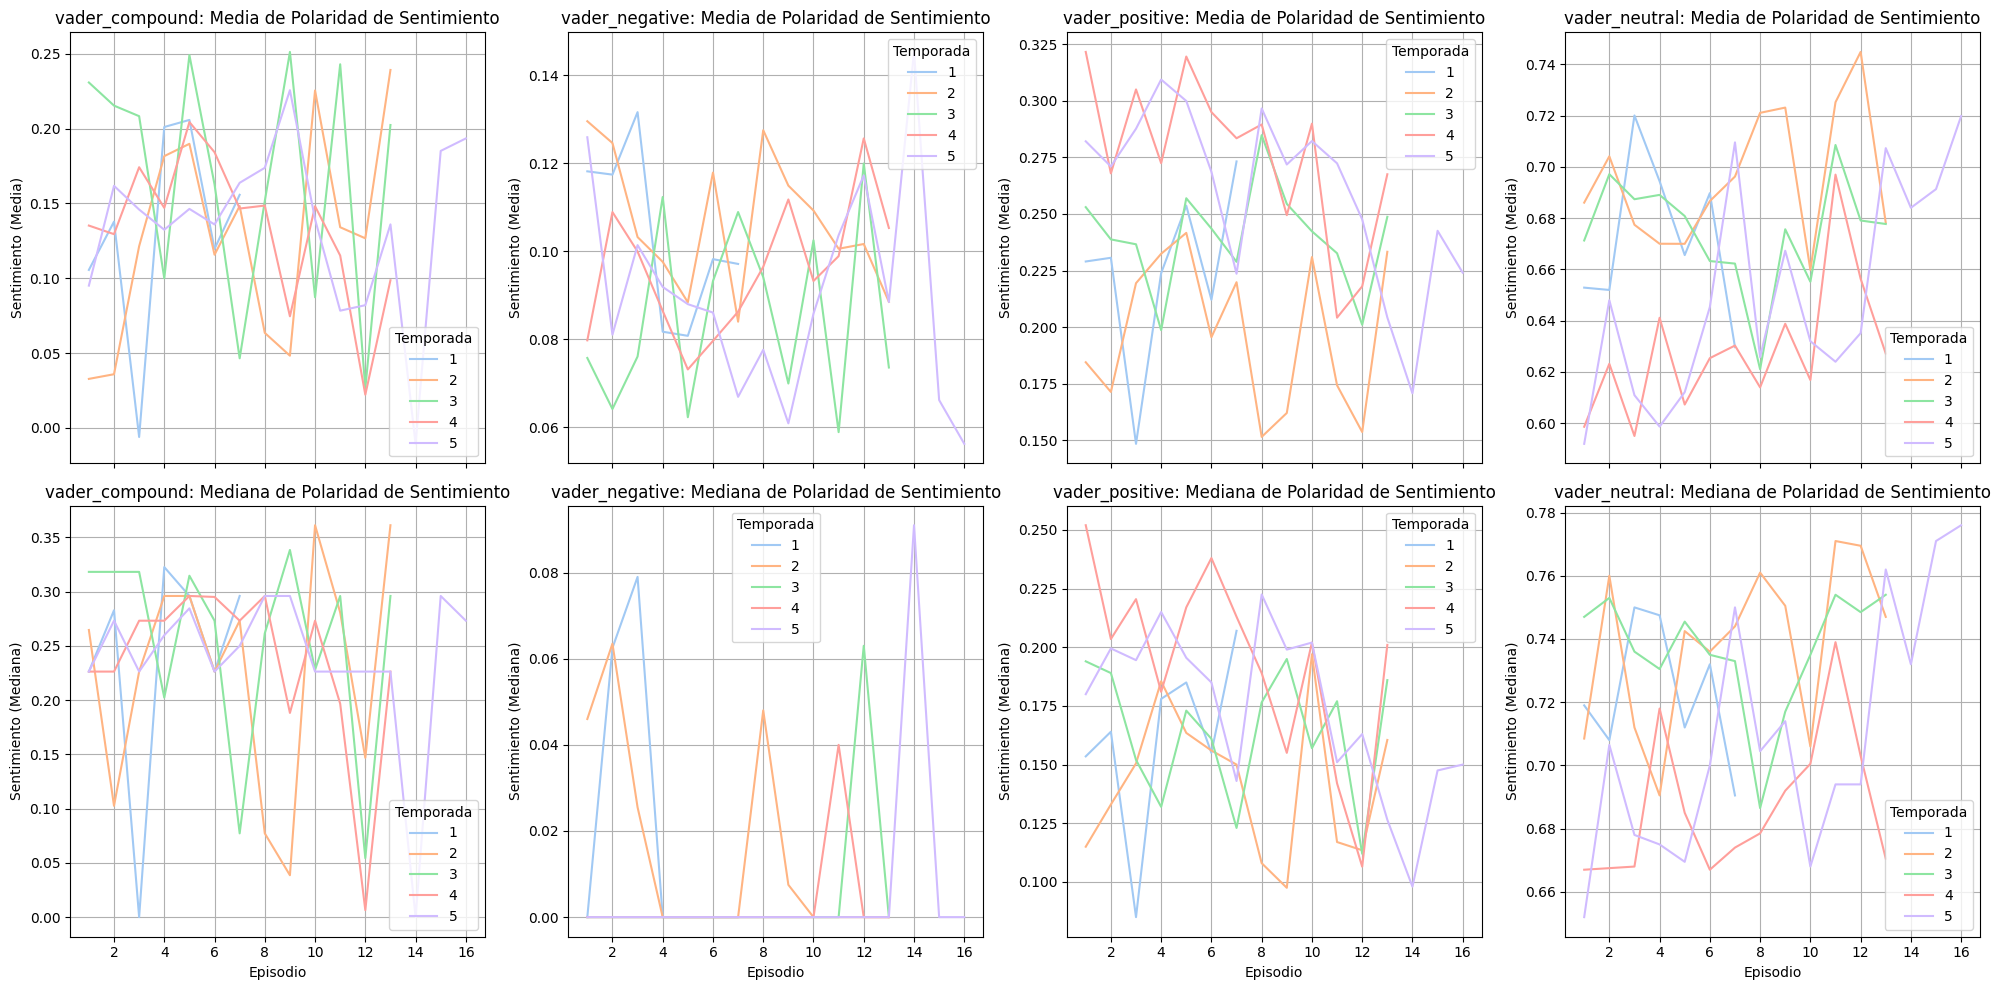

In [53]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharex=True)

for i, var in enumerate(vader_vars):

    # Primera fila
    sns.lineplot(data=vader_media_episodio[var], x='Episodio', y=var, hue='Temporada', ax=axs[0, i], palette='pastel')
    axs[0, i].set_title(f'{var}: Media de Polaridad de Sentimiento')
    axs[0, i].set_ylabel('Sentimiento (Media)')
    axs[0, i].grid(True)

    # Segunda fila
    sns.lineplot(data=vader_mediana_episodio[var], x='Episodio', y=var, hue='Temporada', ax=axs[1, i], palette='pastel')
    axs[1, i].set_title(f'{var}: Mediana de Polaridad de Sentimiento')
    axs[1, i].set_ylabel('Sentimiento (Mediana)')
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()

#### Líneas de tendencia de la Polaridad de Sentimiento por cada temporada

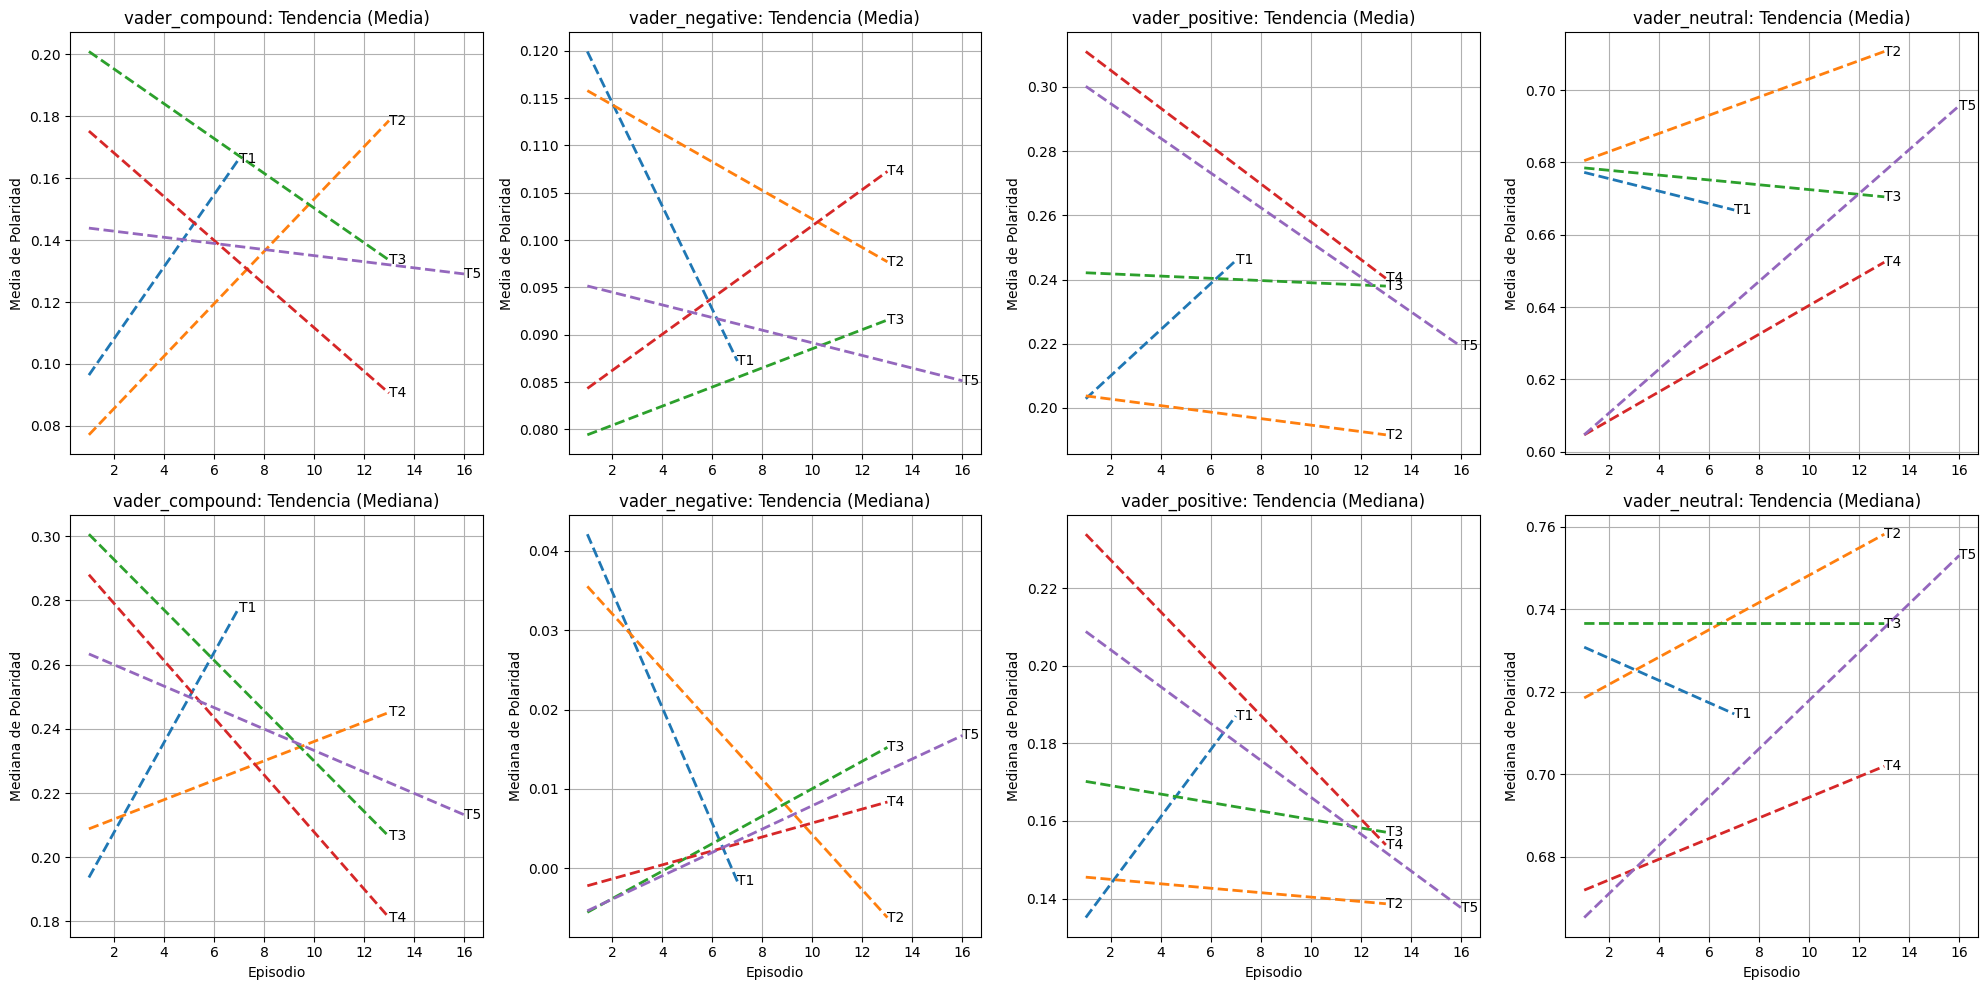

In [54]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Adjusting figure height for clarity

# Iterate over the Vader sentiment variables
for i, var in enumerate(vader_vars):
    # Iterate over each season (Temporada)
    for temporada in vader_media_episodio[var]['Temporada'].unique():
        # Filter data for the specific season
        data_temp_mean = vader_media_episodio[var][vader_media_episodio[var]['Temporada'] == temporada]

        # Fit a trend line using numpy.polyfit for the mean
        z_mean = np.polyfit(data_temp_mean['Episodio'], data_temp_mean[var], 1)
        p_mean = np.poly1d(z_mean)

        # Plot the trend line for mean (first row)
        axs[0, i].plot(data_temp_mean['Episodio'], p_mean(data_temp_mean['Episodio']), linestyle='--', linewidth=2)

        # Add text for the season at the end of the line
        axs[0, i].text(data_temp_mean['Episodio'].iloc[-1], p_mean(data_temp_mean['Episodio'].iloc[-1]), f'T{temporada}', fontsize=10, verticalalignment='center')

    axs[0, i].set_title(f'{var}: Tendencia (Media)')
    axs[0, i].set_ylabel('Media de Polaridad')
    axs[0, i].grid(True)

    # Repeat the process for the median
    for temporada in vader_mediana_episodio[var]['Temporada'].unique():
        # Filter data for the specific season
        data_temp_median = vader_mediana_episodio[var][vader_mediana_episodio[var]['Temporada'] == temporada]

        # Fit a trend line using numpy.polyfit for the median
        z_median = np.polyfit(data_temp_median['Episodio'], data_temp_median[var], 1)
        p_median = np.poly1d(z_median)

        # Plot the trend line for median (second row)
        axs[1, i].plot(data_temp_median['Episodio'], p_median(data_temp_median['Episodio']), linestyle='--', linewidth=2)

        # Add text for the season at the end of the line
        axs[1, i].text(data_temp_median['Episodio'].iloc[-1], p_median(data_temp_median['Episodio'].iloc[-1]), f'T{temporada}', fontsize=10, verticalalignment='center')

    axs[1, i].set_title(f'{var}: Tendencia (Mediana)')
    axs[1, i].set_ylabel('Mediana de Polaridad')
    axs[1, i].grid(True)

# Set xlabel for all subplots in the second row
for ax in axs[1, :]:
    ax.set_xlabel('Episodio')

plt.tight_layout()
plt.show()

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para todos los personajes

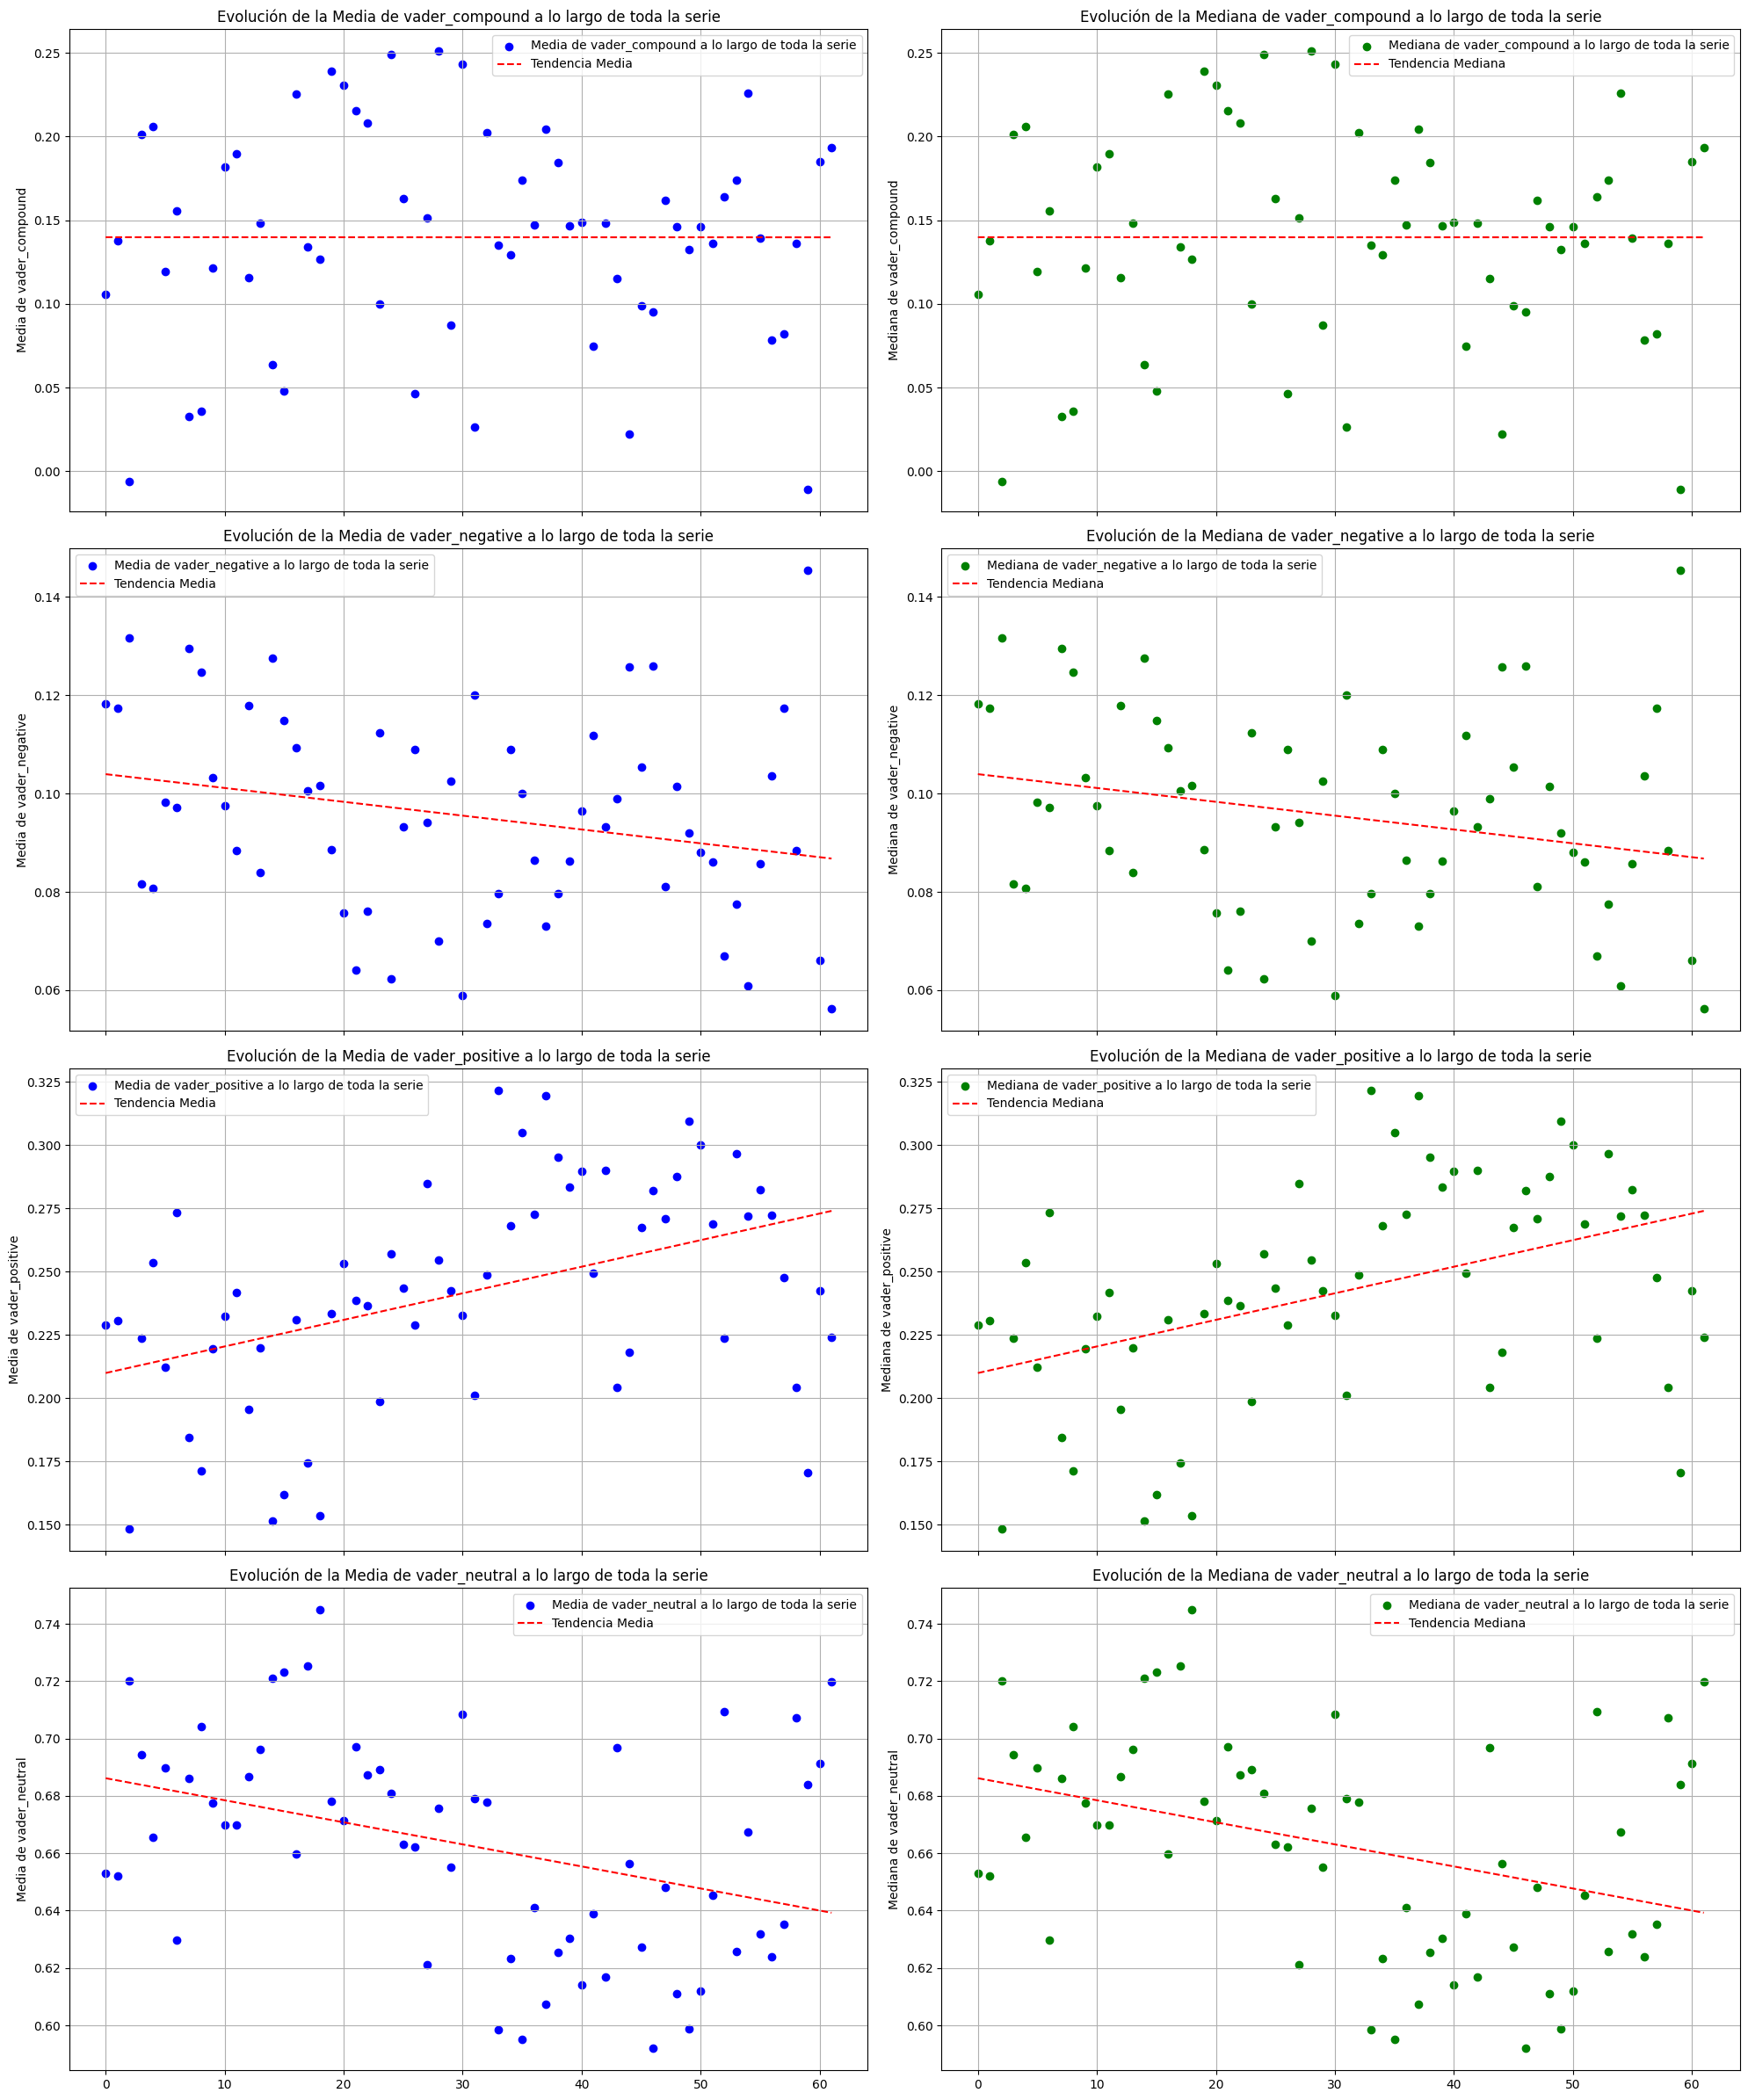

In [55]:
fig, axs = plt.subplots(len(vader_vars), 2, figsize=(20, 6 * len(vader_vars)), sharex=True)

for i, var in enumerate(vader_vars):

    # Assuming each var has a DataFrame with 'mean' and 'median' data
    plot_media_episodio = vader_media_episodio[var]
    plot_mediana_episodio = vader_media_episodio[var]

    # First subplot: Mean
    axs[i, 0].scatter(plot_media_episodio.index, plot_media_episodio[var], color='blue', label='Media de ' + var + ' a lo largo de toda la serie')

    # Fit a linear regression line for the mean
    X_mean = plot_media_episodio.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_mean = plot_media_episodio[var].values  # Ensure you access the values correctly
    model_mean = LinearRegression().fit(X_mean, y_mean)
    y_pred_mean = model_mean.predict(X_mean)

    # Plot trend line for mean
    axs[i, 0].plot(plot_media_episodio.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

    # Titles and labels for the first subplot
    axs[i, 0].set_title(f'Evolución de la Media de {var} a lo largo de toda la serie')
    axs[i, 0].set_ylabel(f'Media de {var}')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Second subplot: Median
    axs[i, 1].scatter(plot_mediana_episodio.index, plot_mediana_episodio[var], color='green', label='Mediana de ' + var + ' a lo largo de toda la serie')

    # Fit a linear regression line for the median
    X_median = plot_mediana_episodio.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_median = plot_mediana_episodio[var].values  # Ensure you access the values correctly
    model_median = LinearRegression().fit(X_median, y_median)
    y_pred_median = model_median.predict(X_median)

    # Plot trend line for median
    axs[i, 1].plot(plot_mediana_episodio.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

    # Titles and labels for the second subplot
    axs[i, 1].set_title(f'Evolución de la Mediana de {var} a lo largo de toda la serie')
    axs[i, 1].set_ylabel(f'Mediana de {var}')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para Walter

In [56]:
final_df_reducido_walter = final_df_reducido[final_df_reducido['Personaje'] == 'walter']

vader_media_episodio_walter = {}
vader_mediana_episodio_walter = {}

for var in vader_vars:
    vader_media_episodio_walter[var] = final_df_reducido_walter.groupby(['Temporada', 'Episodio'])[var].mean().reset_index()

    vader_mediana_episodio_walter[var] = final_df_reducido_walter.groupby(['Temporada', 'Episodio'])[var].median().reset_index()

print("Mean of vader_compound:\n", vader_media_episodio_walter['vader_compound'])
print("\nMedian of vader_compound:\n", vader_mediana_episodio_walter['vader_compound'])

for var in vader_vars:
    print(f"\nGrouped mean for {var}:\n", vader_media_episodio_walter[var])
    print(f"\nGrouped median for {var}:\n", vader_mediana_episodio_walter[var])

Mean of vader_compound:
     Temporada  Episodio  vader_compound
0           1         1        0.166367
1           1         2        0.197632
2           1         3       -0.081075
3           1         4        0.080159
4           1         5        0.314075
5           1         6        0.233614
6           1         7        0.174849
7           2         1        0.051957
8           2         2       -0.091140
9           2         3        0.179137
10          2         4        0.124743
11          2         5        0.137236
12          2         6        0.324787
13          2         7        0.046114
14          2         8       -0.063589
15          2         9        0.015547
16          2        10        0.297767
17          2        11        0.184768
18          2        12        0.177521
19          2        13        0.298976
20          3         1        0.302973
21          3         2        0.243503
22          3         3        0.278058
23          3  

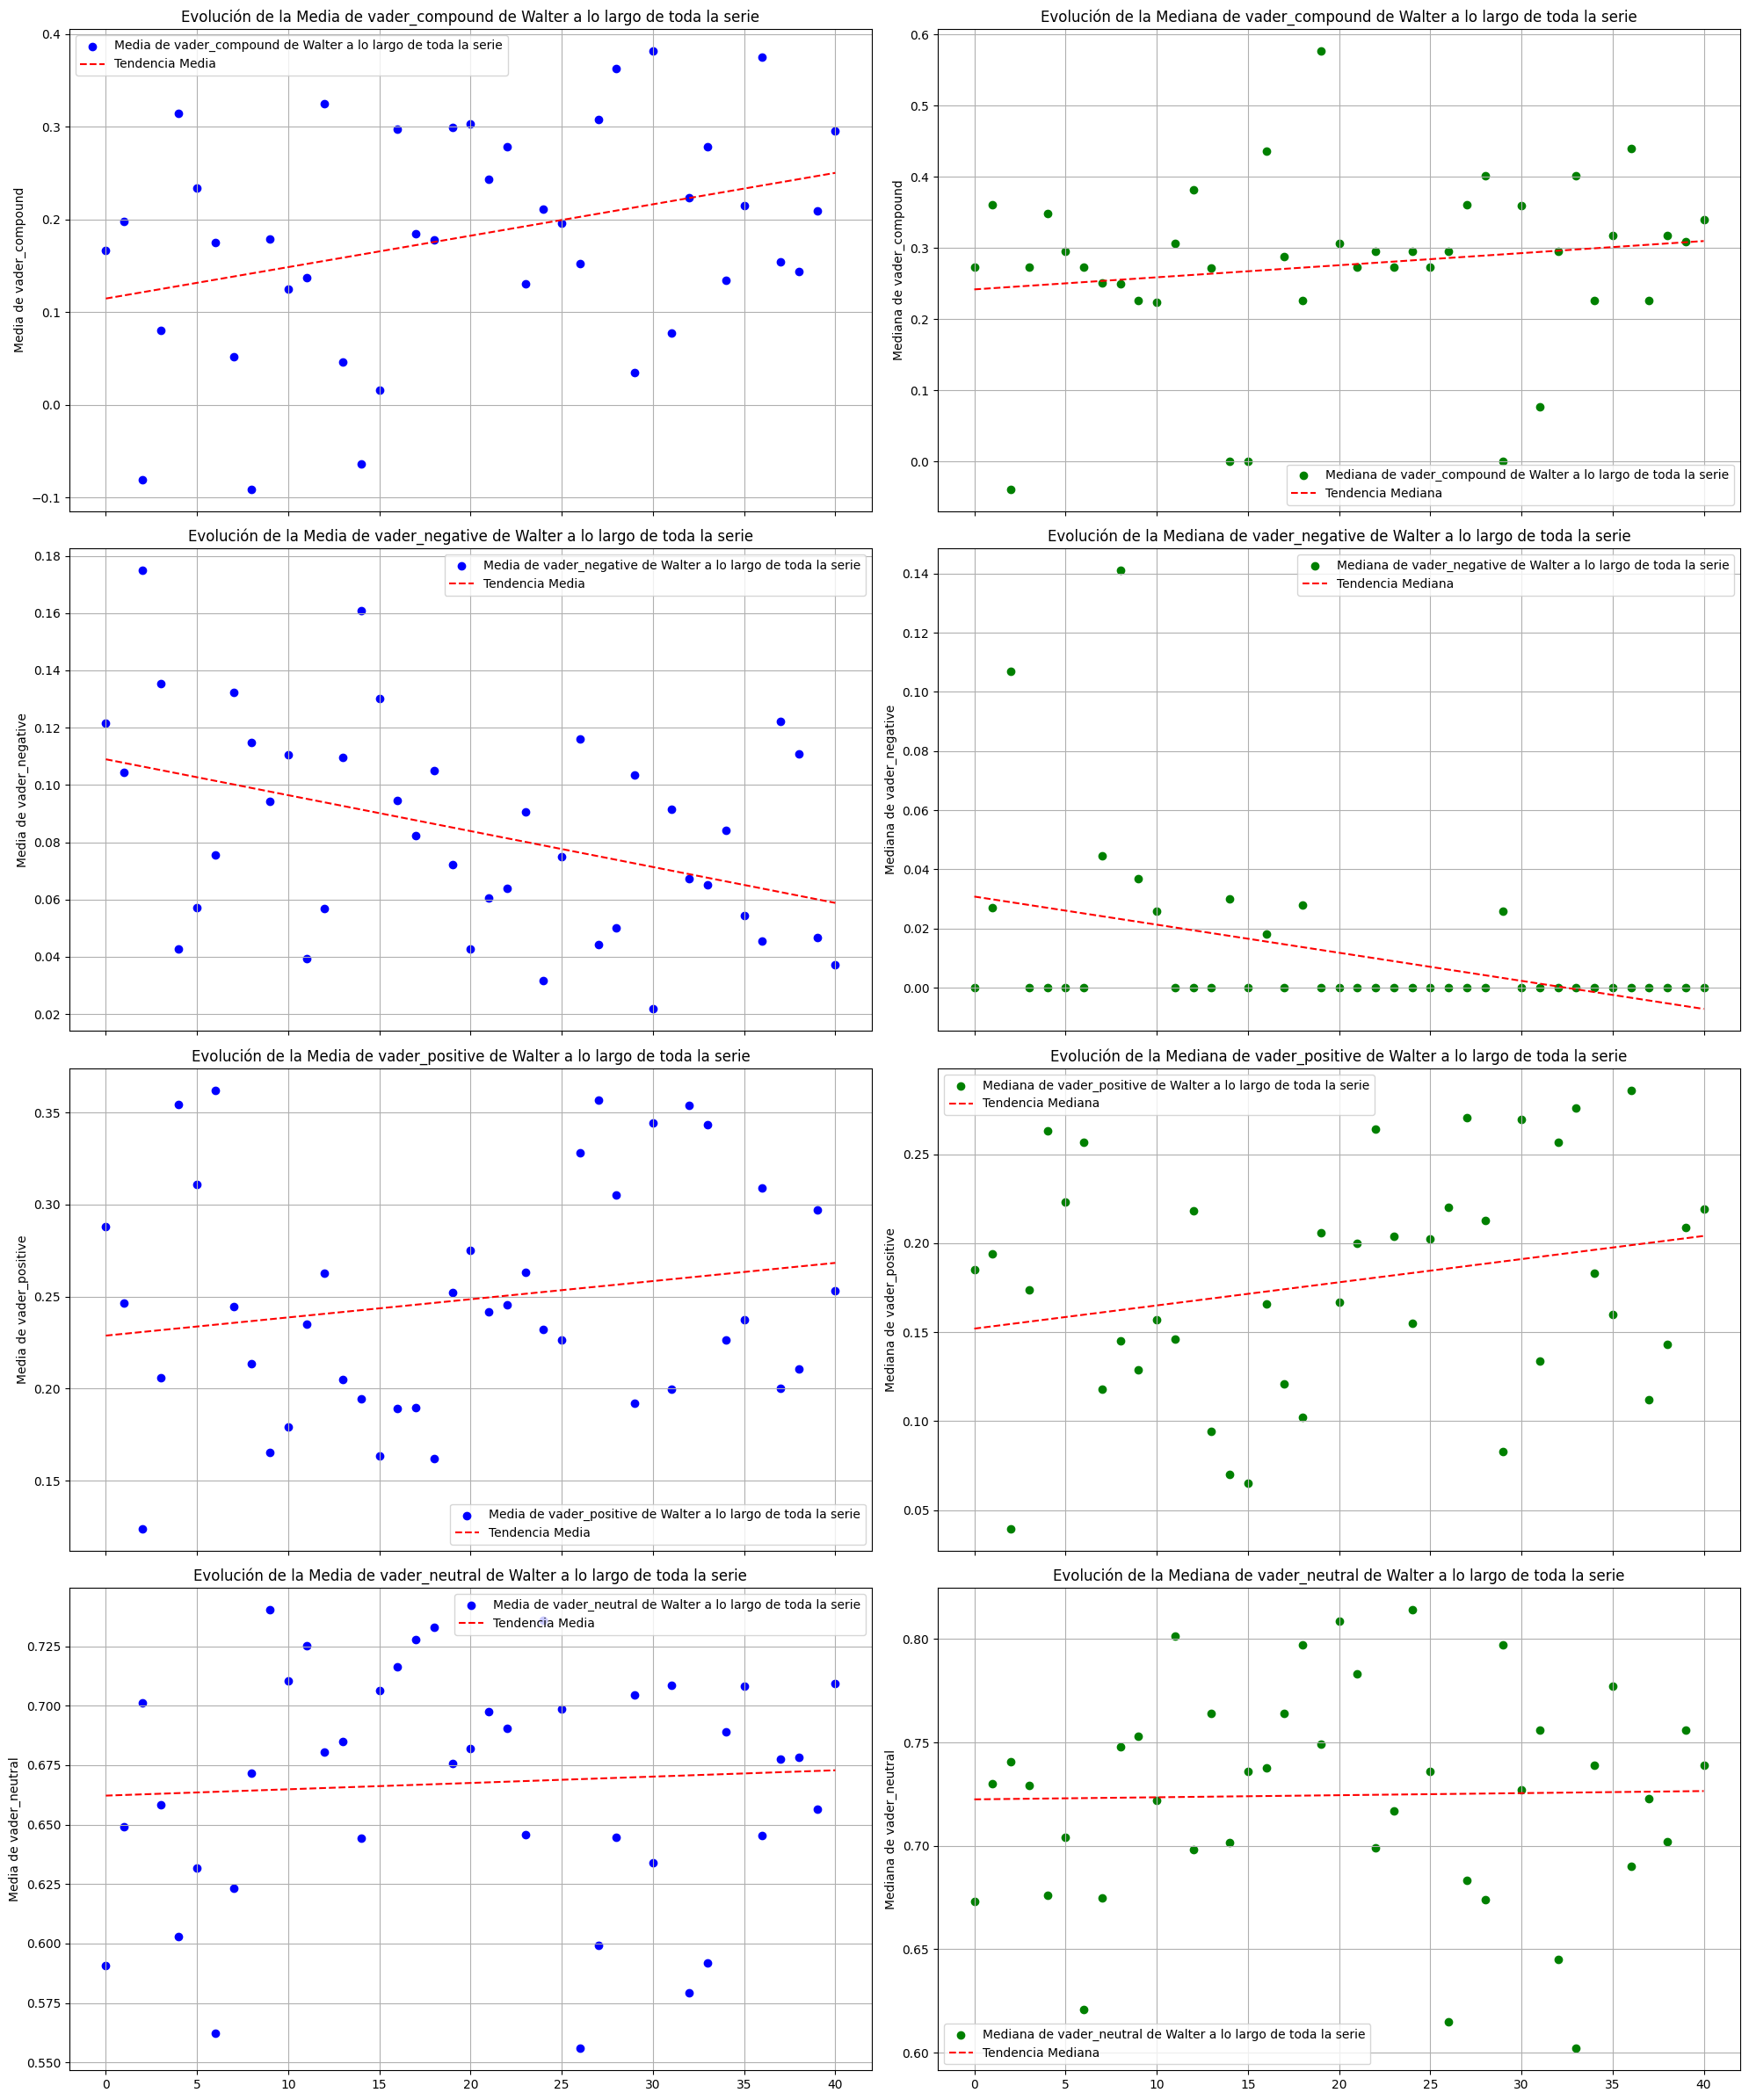

In [57]:
fig, axs = plt.subplots(len(vader_vars), 2, figsize=(20, 6 * len(vader_vars)), sharex=True)

for i, var in enumerate(vader_vars):

    # Assuming each var has a DataFrame with 'mean' and 'median' data
    plot_media_episodio_walter = vader_media_episodio_walter[var]
    plot_mediana_episodio_walter = vader_mediana_episodio_walter[var]

    # First subplot: Mean
    axs[i, 0].scatter(plot_media_episodio_walter.index, plot_media_episodio_walter[var], color='blue', label='Media de ' + var + ' de Walter a lo largo de toda la serie')

    # Fit a linear regression line for the mean
    X_mean = plot_media_episodio_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_mean = plot_media_episodio_walter[var].values  # Ensure you access the values correctly
    model_mean = LinearRegression().fit(X_mean, y_mean)
    y_pred_mean = model_mean.predict(X_mean)

    # Plot trend line for mean
    axs[i, 0].plot(plot_media_episodio_walter.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

    # Titles and labels for the first subplot
    axs[i, 0].set_title(f'Evolución de la Media de {var} de Walter a lo largo de toda la serie')
    axs[i, 0].set_ylabel(f'Media de {var}')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Second subplot: Median
    axs[i, 1].scatter(plot_mediana_episodio_walter.index, plot_mediana_episodio_walter[var], color='green', label='Mediana de ' + var + ' de Walter a lo largo de toda la serie')

    # Fit a linear regression line for the median
    X_median = plot_mediana_episodio_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_median = plot_mediana_episodio_walter[var].values  # Ensure you access the values correctly
    model_median = LinearRegression().fit(X_median, y_median)
    y_pred_median = model_median.predict(X_median)

    # Plot trend line for median
    axs[i, 1].plot(plot_mediana_episodio_walter.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

    # Titles and labels for the second subplot
    axs[i, 1].set_title(f'Evolución de la Mediana de {var} de Walter a lo largo de toda la serie')
    axs[i, 1].set_ylabel(f'Mediana de {var}')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

## <font color='red'>SENTIWORDNET</font>

A partir de la base de datos WordNet, este léxico asigna puntuaciones de sentimiento positivas, negativas y neutras a los synsets (grupos de palabras con el mismo significado).

### Instalar e importar las librerías, definir la función que obtiene los sentimientos con SENTIWORDNET y aplicarla a nuestro dataset

In [58]:
# Instalar o reinstalar las librerías necesarias

import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize

def sentiwordnet_get_sentiment(text):
    # If the input is a list of words, join them into a single string
    if isinstance(text, list):
        text = ' '.join(text)

    # Tokenize the input text
    words = word_tokenize(text)

    # Initialize scores
    pos_score = 0
    neg_score = 0
    num_words = 0

    # Iterate through each word in the text
    for word in words:
        # Get the SentiWordNet synsets
        synsets = list(swn.senti_synsets(word))

        # Calculate average sentiment scores for the word
        if synsets:
            # Get the first synset (you can choose a different strategy)
            synset = synsets[0]
            pos_score += synset.pos_score()
            neg_score += synset.neg_score()
            num_words += 1

    # Calculate average scores
    if num_words > 0:
        pos_score /= num_words
        neg_score /= num_words

    return {'positive': pos_score, 'negative': neg_score, 'compound': pos_score - neg_score}

In [60]:
# apply sentiment analysis
final_df['Sentiwordnet'] = final_df['Palabras_clave'].apply(sentiwordnet_get_sentiment)

# output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments_customsentiments_vader_sentiwordnet.xlsx'

# final_df.to_excel(output_path, index=False)

#### Separar los resultados de Sentiwordnet en diferentes columnas: score negativo, positivo y compound (no existen el scoring neutral).

In [61]:
# Extraer los scorings negativos

final_df['sentiwordnet_negative'] = final_df['Sentiwordnet'].apply(lambda x: x['negative'])

# final_df['sentiwordnet_negative']

In [62]:
# Extraer los scorings positivos

final_df['sentiwordnet_positive'] = final_df['Sentiwordnet'].apply(lambda x: x['positive'])

# final_df['sentiwordnet_positive']

In [63]:
# Extraer los scorings compound (compuestos)

final_df['sentiwordnet_compound'] = final_df['Sentiwordnet'].apply(lambda x: x['compound'])

# final_df['sentiwordnet_compound']

In [64]:
# output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments_customsentiments_vaderseparados_sentiwordnetseparados.xlsx'

# final_df.to_excel(output_path, index=False)

### Dibujar el Histograma de los sentimientos extraídos con SENTIWORDNET para ver su distribución
Vemos que hay una enorme cantidad de valores neutros (cero o cercanos a cero) en todos los scorings (negativo, positivo, neutro y compound).

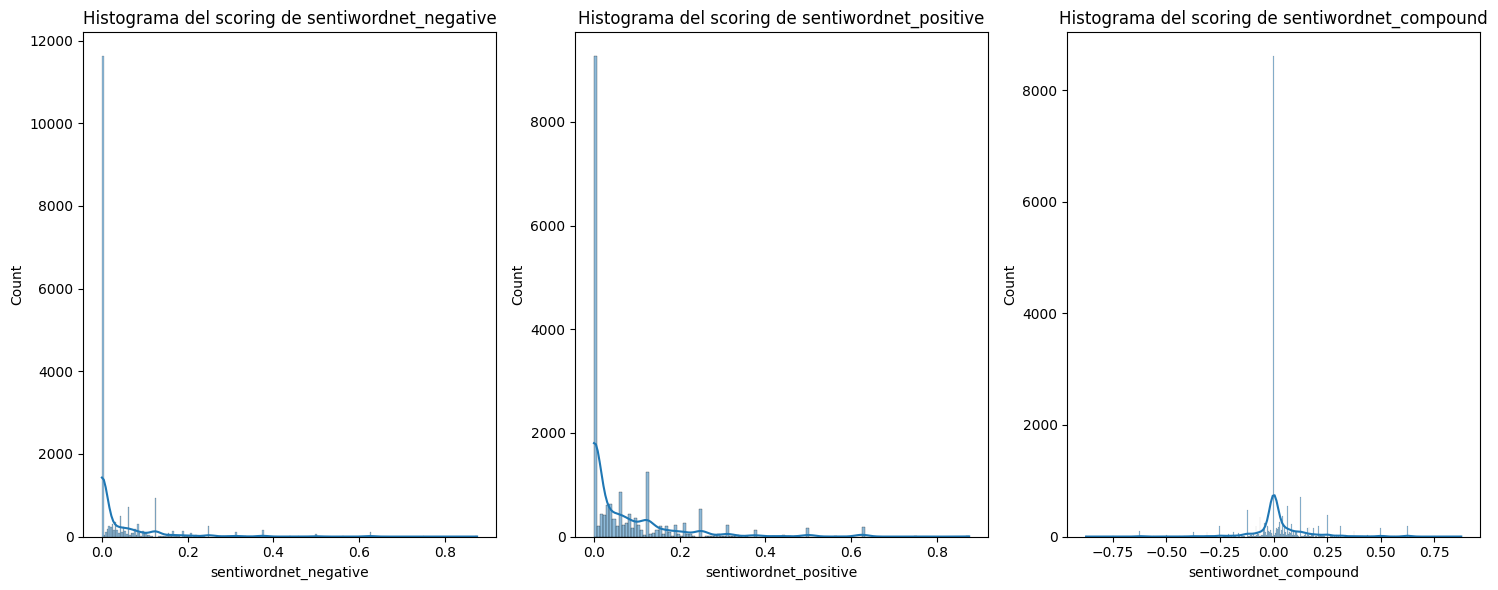

In [65]:
# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Realizar plot de sentiwordnet_negative
sns.histplot(final_df['sentiwordnet_negative'], kde=True, ax=axes[0])
axes[0].set_title('Histograma del scoring de sentiwordnet_negative')

# Realizar plot de sentiwordnet_positive
sns.histplot(final_df['sentiwordnet_positive'], kde=True, ax=axes[1])
axes[1].set_title('Histograma del scoring de sentiwordnet_positive')

# Realizar plot de sentiwordnet_compound
sns.histplot(final_df['sentiwordnet_compound'], kde=True, ax=axes[2])
axes[2].set_title('Histograma del scoring de sentiwordnet_compound')

plt.tight_layout()
plt.show()

Quitamos, como venimos haciendo hasta ahora en este tipo de casos, el 90% de los valores neutros con el fin de reequilibrar el dataset.

### Quitar el 90% de los valores neutros para equilibrar el dataset

Con el fin de reequilibrar el dataset, decidimos quitar el 90% de los valores 0, dejamos únicamente el 10%. Realizaremos esta operación en los 4 scorings: negativo, positivo, neutro y compound.

In [66]:
sentiwordnet_vars = ['sentiwordnet_negative', 'sentiwordnet_positive', 'sentiwordnet_compound']

In [67]:
# Filtramos las filas que tienen un valor en torno a cero en cada variable de Sentiwordnet

neutros_dict = {}  # Para almacenar el DataFrame de neutros de cada variable

for var in sentiwordnet_vars:
    neutros = final_df[(final_df[var] >= -0.02) & (final_df[var] <= 0.02)]
    # neutros = final_df[(final_df[var] == 0.0)]

    # Seleccionamos una muestra aleatoria del 90% de las filas que están en el rango definido más arriba y las eliminamos
    neutros_a_eliminar = neutros.sample(frac=0.9, random_state=10)

    # Eliminamos esas filas del dataset original
    final_df_reducido = final_df.drop(neutros_a_eliminar.index)

    # Guardar el número de neutros restantes para verificación
    neutros_restantes = final_df_reducido[final_df_reducido[var] == 0.0]
    neutros_dict[var] = {
        "original": len(neutros),
        "remaining": len(neutros_restantes)
    }

# Verificamos que el número de neutros se ha reducido adecuadamente

# Verificamos que el número de neutros se ha reducido adecuadamente
for var, counts in neutros_dict.items():
    print(f"Número de neutros originales en {var}: {counts['original']}")
    print(f"Número de neutros restantes en {var} (10%): {counts['remaining']}")

Número de neutros originales en sentiwordnet_negative: 12232
Número de neutros restantes en sentiwordnet_negative (10%): 1159
Número de neutros originales en sentiwordnet_positive: 9737
Número de neutros restantes en sentiwordnet_positive (10%): 936
Número de neutros originales en sentiwordnet_compound: 9422
Número de neutros restantes en sentiwordnet_compound (10%): 850


### Realizar plot de la frecuencia de polaridad de sentimientos por cada personaje principal

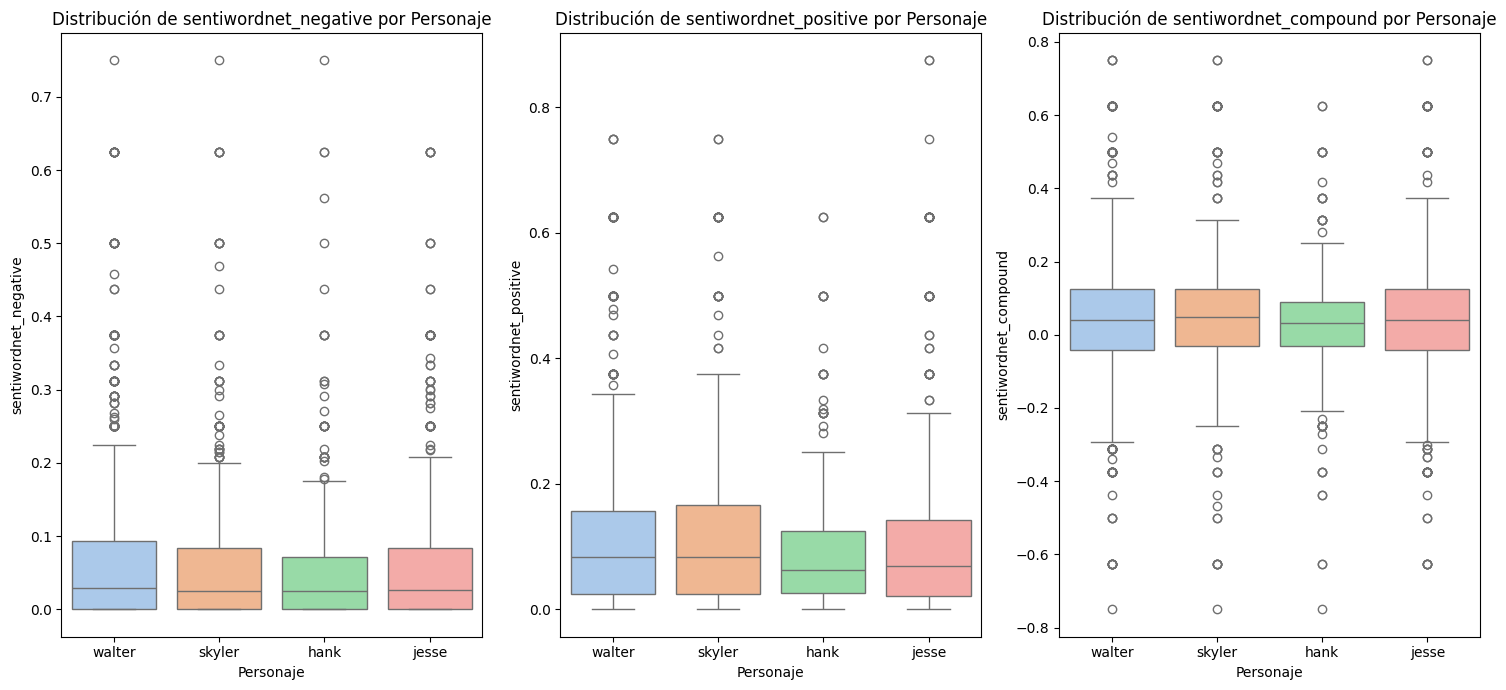

In [68]:
personajes_seleccionados = ['walter', 'jesse', 'skyler', 'hank']
df_personajes_seleccionados = final_df_reducido[final_df_reducido['Personaje'].isin(personajes_seleccionados)]

# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15,7))

# Realizar plot para sentiwordnet_negative
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='sentiwordnet_negative', hue='Personaje', palette='pastel', ax=axes[0])
axes[0].set_title('Distribución de sentiwordnet_negative por Personaje')

# Realizar plot para sentiwordnet_positive
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='sentiwordnet_positive', hue='Personaje', palette='pastel', ax=axes[1])
axes[1].set_title('Distribución de sentiwordnet_positive por Personaje')

# Realizar plot para sentiwordnet_compound
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='sentiwordnet_compound', hue='Personaje', palette='pastel', ax=axes[2])
axes[2].set_title('Distribución de sentiwordnet_compound por Personaje')

plt.tight_layout()
plt.show()

### Agrupar sentimientos por la media y la mediana de cada episodio y realizar distintos plots

In [69]:
sentiwordnet_media_episodio = {}
sentiwordnet_mediana_episodio = {}

for var in sentiwordnet_vars:
    sentiwordnet_media_episodio[var] = final_df_reducido.groupby(['Temporada', 'Episodio'])[var].mean().reset_index()

    sentiwordnet_mediana_episodio[var] = final_df_reducido.groupby(['Temporada', 'Episodio'])[var].median().reset_index()

for var in sentiwordnet_vars:
    print(f"\nGrouped mean for {var}:\n", sentiwordnet_media_episodio[var])
    print(f"\nGrouped median for {var}:\n", sentiwordnet_mediana_episodio[var])


Grouped mean for sentiwordnet_negative:
     Temporada  Episodio  sentiwordnet_negative
0           1         1               0.056558
1           1         2               0.055390
2           1         3               0.058055
3           1         4               0.063960
4           1         5               0.057749
5           1         6               0.072810
6           1         7               0.054229
7           2         1               0.064089
8           2         2               0.068246
9           2         3               0.057445
10          2         4               0.061023
11          2         5               0.087725
12          2         6               0.077471
13          2         7               0.086608
14          2         8               0.069477
15          2         9               0.062533
16          2        10               0.080704
17          2        11               0.065418
18          2        12               0.062335
19          2     

#### Lineplot de la Polaridad de Sentimiento por Temporada y Episodio

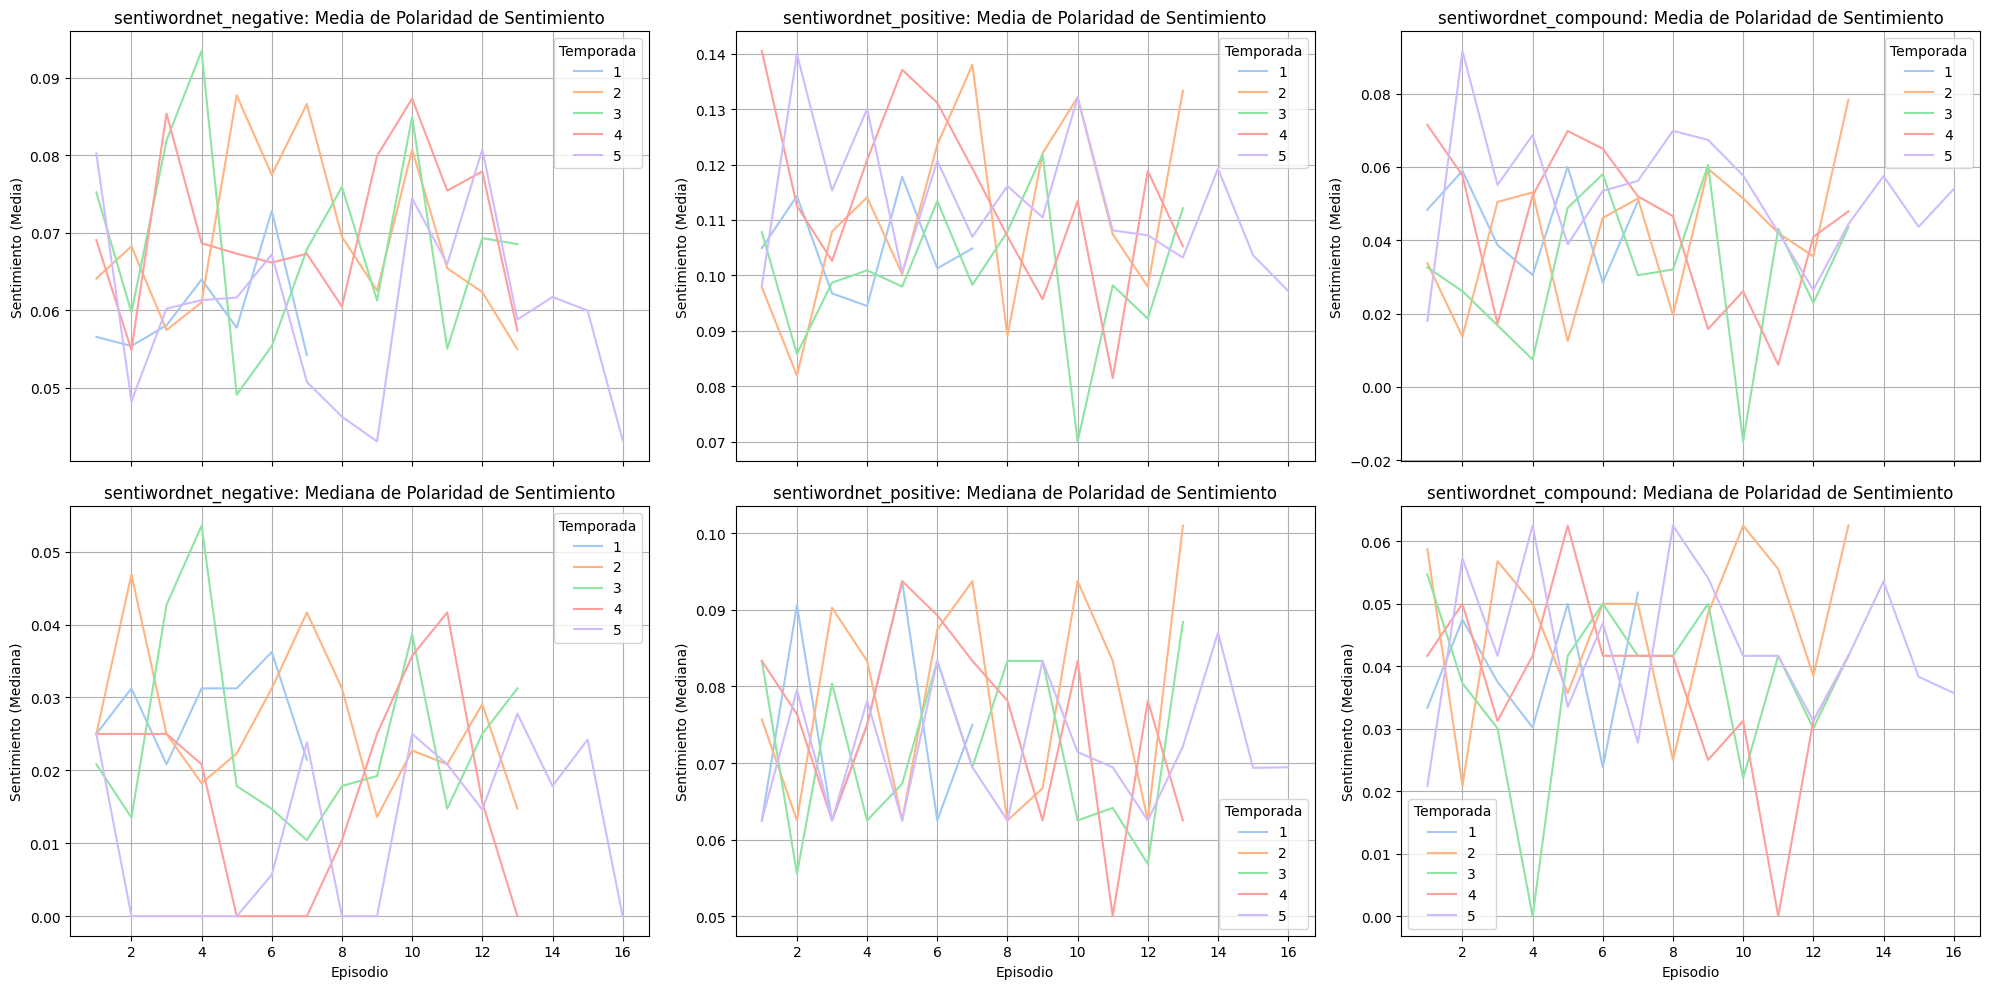

In [70]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharex=True)

for i, var in enumerate(sentiwordnet_vars):

    # Primera fila
    sns.lineplot(data=sentiwordnet_media_episodio[var], x='Episodio', y=var, hue='Temporada', ax=axs[0, i], palette='pastel')
    axs[0, i].set_title(f'{var}: Media de Polaridad de Sentimiento')
    axs[0, i].set_ylabel('Sentimiento (Media)')
    axs[0, i].grid(True)

    # Segunda fila
    sns.lineplot(data=sentiwordnet_mediana_episodio[var], x='Episodio', y=var, hue='Temporada', ax=axs[1, i], palette='pastel')
    axs[1, i].set_title(f'{var}: Mediana de Polaridad de Sentimiento')
    axs[1, i].set_ylabel('Sentimiento (Mediana)')
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()

#### Líneas de tendencia de la Polaridad de Sentimiento por cada temporada

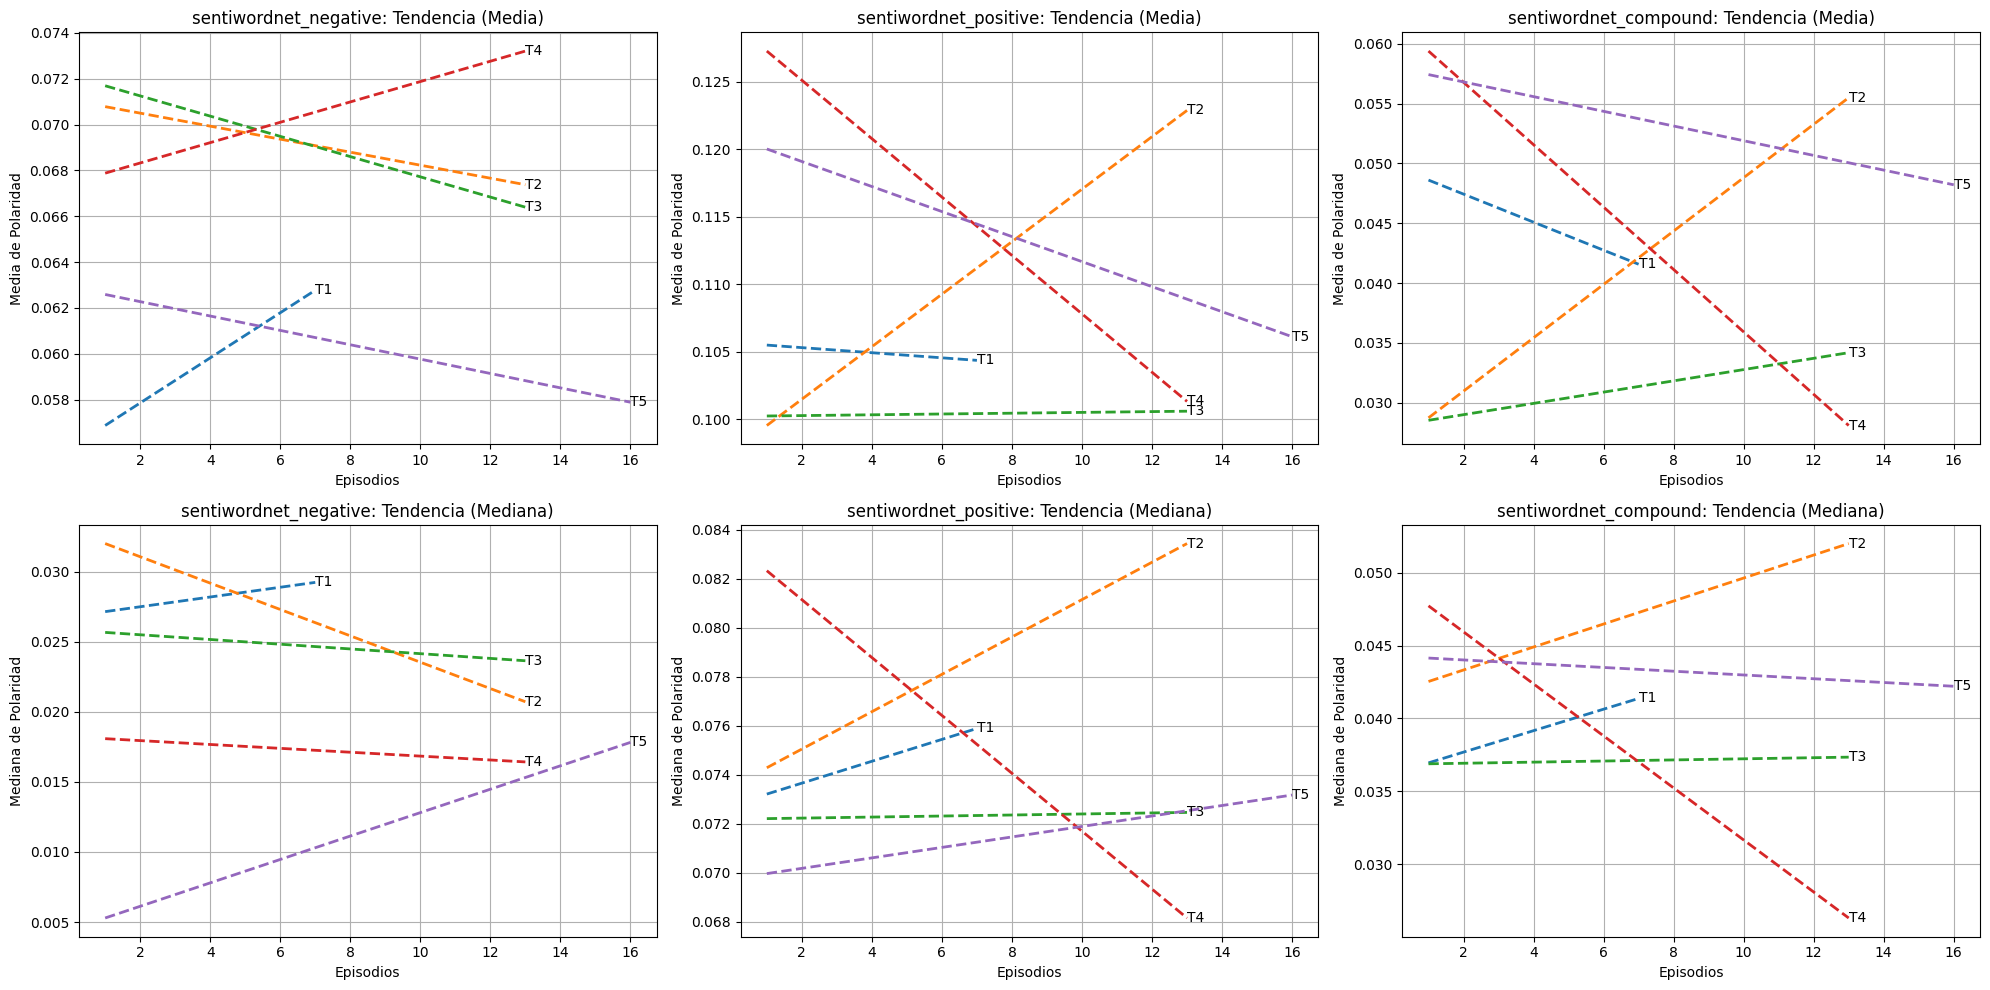

In [71]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Iterate over the Vader sentiment variables
for i, var in enumerate(sentiwordnet_vars):

    # Iterate over each season (Temporada)
    for temporada in sentiwordnet_media_episodio[var]['Temporada'].unique():
        # Filter data for the specific season
        data_temp_mean = sentiwordnet_media_episodio[var][sentiwordnet_media_episodio[var]['Temporada'] == temporada]

        # Fit a trend line using numpy.polyfit for the mean
        z_mean = np.polyfit(data_temp_mean['Episodio'], data_temp_mean[var], 1)
        p_mean = np.poly1d(z_mean)

        # Plot the trend line for mean (first row)
        axs[0, i].plot(data_temp_mean['Episodio'], p_mean(data_temp_mean['Episodio']), linestyle='--', linewidth=2)

        # Add text for the season at the end of the line
        axs[0, i].text(data_temp_mean['Episodio'].iloc[-1], p_mean(data_temp_mean['Episodio'].iloc[-1]), f'T{temporada}', fontsize=10, verticalalignment='center')

    axs[0, i].set_title(f'{var}: Tendencia (Media)')
    axs[0, i].set_ylabel('Media de Polaridad')
    axs[0, i].set_xlabel('Episodios')
    axs[0, i].grid(True)

    # Repeat the process for the median
    for temporada in sentiwordnet_mediana_episodio[var]['Temporada'].unique():
        # Filter data for the specific season
        data_temp_median = sentiwordnet_mediana_episodio[var][sentiwordnet_mediana_episodio[var]['Temporada'] == temporada]

        # Fit a trend line using numpy.polyfit for the median
        z_median = np.polyfit(data_temp_median['Episodio'], data_temp_median[var], 1)
        p_median = np.poly1d(z_median)

        # Plot the trend line for median (second row)
        axs[1, i].plot(data_temp_median['Episodio'], p_median(data_temp_median['Episodio']), linestyle='--', linewidth=2)

        # Add text for the season at the end of the line
        axs[1, i].text(data_temp_median['Episodio'].iloc[-1], p_median(data_temp_median['Episodio'].iloc[-1]), f'T{temporada}', fontsize=10, verticalalignment='center')

    axs[1, i].set_title(f'{var}: Tendencia (Mediana)')
    axs[1, i].set_ylabel('Mediana de Polaridad')
    axs[1, i].set_xlabel('Episodios')
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para todos los personajes

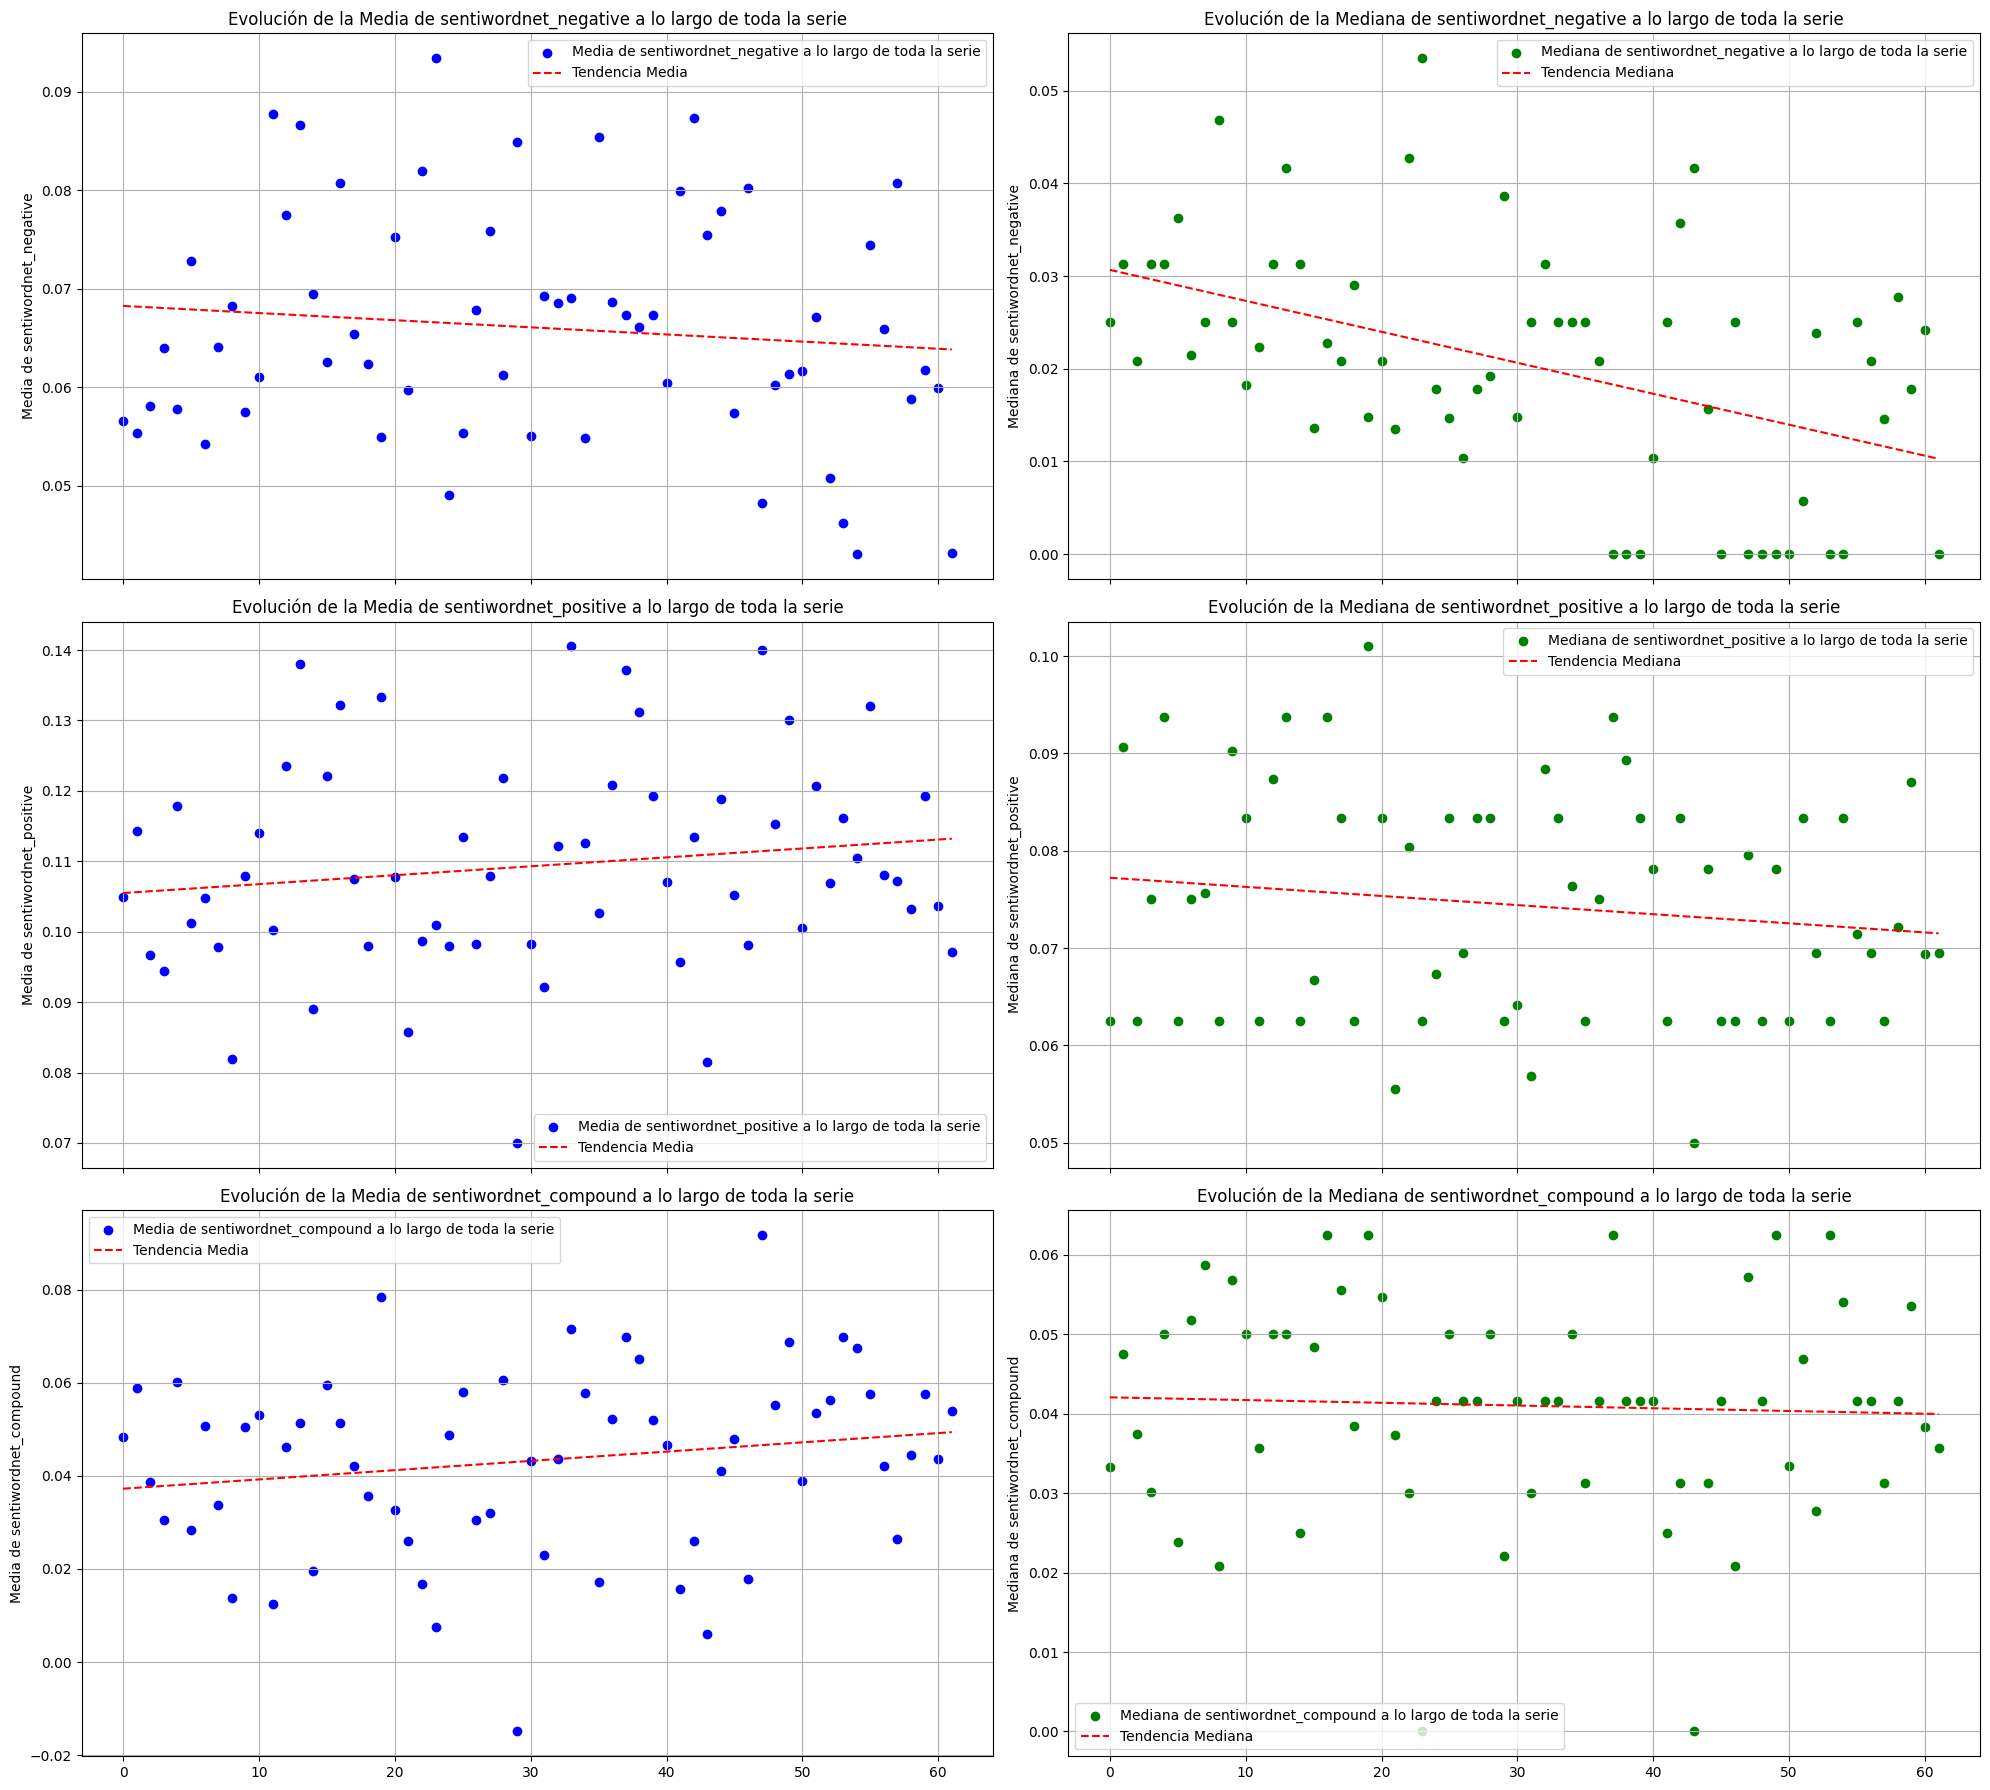

In [72]:
fig, axs = plt.subplots(len(sentiwordnet_vars), 2, figsize=(20, 6 * len(sentiwordnet_vars)), sharex=True)

for i, var in enumerate(sentiwordnet_vars):

    # Assuming each var has a DataFrame with 'mean' and 'median' data
    plot_media_episodio = sentiwordnet_media_episodio[var]
    plot_mediana_episodio = sentiwordnet_mediana_episodio[var]

    # First subplot: Mean
    axs[i, 0].scatter(plot_media_episodio.index, plot_media_episodio[var], color='blue', label='Media de ' + var + ' a lo largo de toda la serie')

    # Fit a linear regression line for the mean
    X_mean = plot_media_episodio.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_mean = plot_media_episodio[var].values  # Ensure you access the values correctly
    model_mean = LinearRegression().fit(X_mean, y_mean)
    y_pred_mean = model_mean.predict(X_mean)

    # Plot trend line for mean
    axs[i, 0].plot(plot_media_episodio.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

    # Titles and labels for the first subplot
    axs[i, 0].set_title(f'Evolución de la Media de {var} a lo largo de toda la serie')
    axs[i, 0].set_ylabel(f'Media de {var}')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Second subplot: Median
    axs[i, 1].scatter(plot_mediana_episodio.index, plot_mediana_episodio[var], color='green', label='Mediana de ' + var + ' a lo largo de toda la serie')

    # Fit a linear regression line for the median
    X_median = plot_mediana_episodio.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_median = plot_mediana_episodio[var].values  # Ensure you access the values correctly
    model_median = LinearRegression().fit(X_median, y_median)
    y_pred_median = model_median.predict(X_median)

    # Plot trend line for median
    axs[i, 1].plot(plot_mediana_episodio.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

    # Titles and labels for the second subplot
    axs[i, 1].set_title(f'Evolución de la Mediana de {var} a lo largo de toda la serie')
    axs[i, 1].set_ylabel(f'Mediana de {var}')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para Walter

In [73]:
final_df_reducido_walter = final_df_reducido[final_df_reducido['Personaje'] == 'walter']

sentiwordnet_media_episodio_walter = {}
sentiwordnet_mediana_episodio_walter = {}

for var in sentiwordnet_vars:
    sentiwordnet_media_episodio_walter[var] = final_df_reducido_walter.groupby(['Temporada', 'Episodio'])[var].mean().reset_index()

    sentiwordnet_mediana_episodio_walter[var] = final_df_reducido_walter.groupby(['Temporada', 'Episodio'])[var].median().reset_index()

for var in sentiwordnet_vars:
    print(f"\nGrouped mean for {var}:\n", sentiwordnet_media_episodio_walter[var])
    print(f"\nGrouped median for {var}:\n", sentiwordnet_mediana_episodio_walter[var])


Grouped mean for sentiwordnet_negative:
     Temporada  Episodio  sentiwordnet_negative
0           1         1               0.048777
1           1         2               0.059869
2           1         3               0.065741
3           1         4               0.089878
4           1         5               0.060011
5           1         6               0.066650
6           1         7               0.055816
7           2         1               0.064075
8           2         2               0.058354
9           2         3               0.068602
10          2         4               0.065739
11          2         5               0.081973
12          2         6               0.069983
13          2         7               0.047810
14          2         8               0.078103
15          2         9               0.066913
16          2        10               0.092196
17          2        11               0.079874
18          2        12               0.069111
19          2     

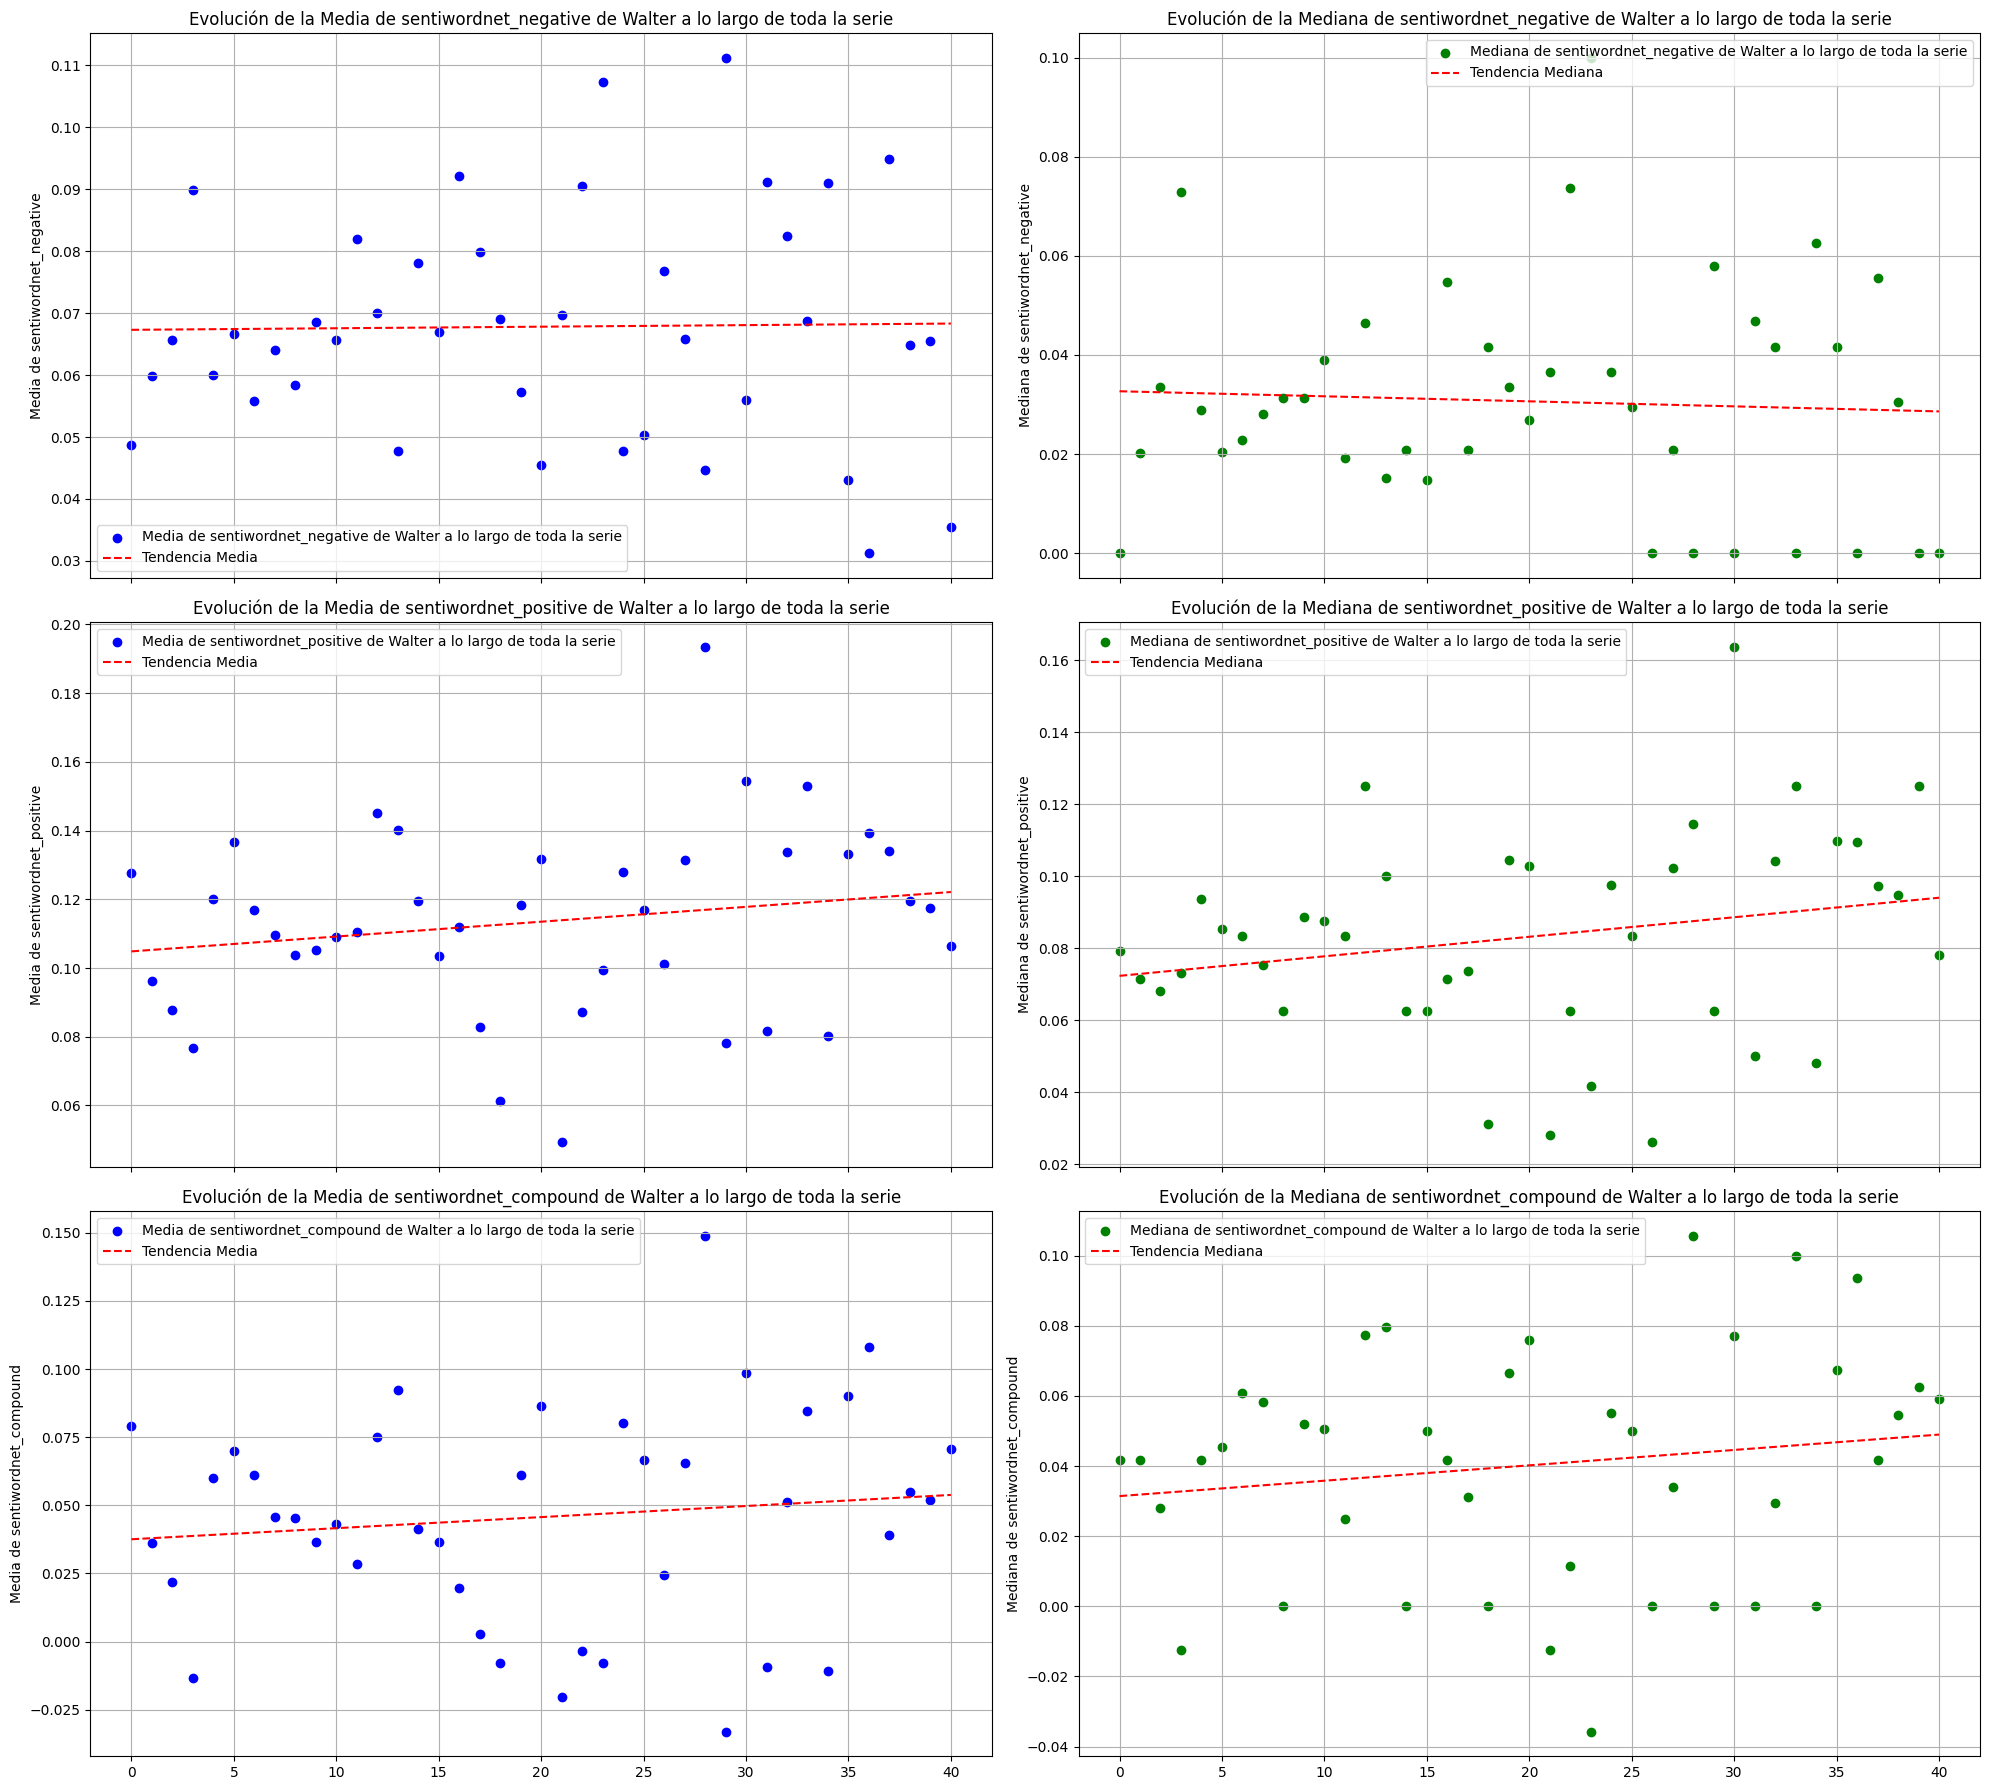

In [74]:
fig, axs = plt.subplots(len(sentiwordnet_vars), 2, figsize=(20, 6 * len(sentiwordnet_vars)), sharex=True)

for i, var in enumerate(sentiwordnet_vars):

    # Assuming each var has a DataFrame with 'mean' and 'median' data
    plot_media_episodio_walter = sentiwordnet_media_episodio_walter[var]
    plot_mediana_episodio_walter = sentiwordnet_mediana_episodio_walter[var]

    # First subplot: Mean
    axs[i, 0].scatter(plot_media_episodio_walter.index, plot_media_episodio_walter[var], color='blue', label='Media de ' + var + ' de Walter a lo largo de toda la serie')

    # Fit a linear regression line for the mean
    X_mean = plot_media_episodio_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_mean = plot_media_episodio_walter[var].values  # Ensure you access the values correctly
    model_mean = LinearRegression().fit(X_mean, y_mean)
    y_pred_mean = model_mean.predict(X_mean)

    # Plot trend line for mean
    axs[i, 0].plot(plot_media_episodio_walter.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

    # Titles and labels for the first subplot
    axs[i, 0].set_title(f'Evolución de la Media de {var} de Walter a lo largo de toda la serie')
    axs[i, 0].set_ylabel(f'Media de {var}')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Second subplot: Median
    axs[i, 1].scatter(plot_mediana_episodio_walter.index, plot_mediana_episodio_walter[var], color='green', label='Mediana de ' + var + ' de Walter a lo largo de toda la serie')

    # Fit a linear regression line for the median
    X_median = plot_mediana_episodio_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_median = plot_mediana_episodio_walter[var].values  # Ensure you access the values correctly
    model_median = LinearRegression().fit(X_median, y_median)
    y_pred_median = model_median.predict(X_median)

    # Plot trend line for median
    axs[i, 1].plot(plot_mediana_episodio_walter.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

    # Titles and labels for the second subplot
    axs[i, 1].set_title(f'Evolución de la Mediana de {var} de Walter a lo largo de toda la serie')
    axs[i, 1].set_ylabel(f'Mediana de {var}')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

## <font color='red'>NRC</font>

### Importar Lexicon NRC Emotion Word-Level v0.92

In [75]:
nrc_lexicon_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

### Crear df del Lexicon

In [76]:
nrc_df = pd.read_csv(nrc_lexicon_path, names=['word', 'emotion', 'association'], sep='\t')
nrc_df = nrc_df.pivot(index='word', columns='emotion', values='association').reset_index()

nrc_df.head(5)

emotion       word  anger  anticipation  disgust  fear  joy  negative  \
0              NaN      0             0        0     0    0         0   
1            aback      0             0        0     0    0         0   
2           abacus      0             0        0     0    0         0   
3          abandon      0             0        0     1    0         1   
4        abandoned      1             0        0     1    0         1   

emotion  positive  sadness  surprise  trust  
0               0        0         0      0  
1               0        0         0      0  
2               0        0         0      1  
3               0        1         0      0  
4               0        1         0      0

### Convertir Lexicon en diccionario

In [77]:
# lexicon to dict

nrc_dict = nrc_df.set_index('word').T.to_dict('list')

# nrc_dict

### Definir la función que atribuye intensidad a las emociones/sentimientos gracias al Lexicon importado y aplicarla a nuestro dataset

In [78]:
# emotion intensity
def get_emotion_intensity(text):
    emotion_intensity = {emotion: 0 for emotion in nrc_df.columns if emotion != 'word'}
    for word in text:
        if word in nrc_dict:
            for emotion, score in zip(nrc_df.columns[1:], nrc_dict[word]):
                emotion_intensity[emotion] += score
    return emotion_intensity

# apply emotion scoring
final_df['NRC_emotion_intensity'] = final_df['Palabras_clave'].apply(get_emotion_intensity)

# final_df.head(2)

#### Separar los resultados de NRC en diferentes columnas: anger, anticipation, disgust, fear, joy, negative, positive, sadness, suprise, trust.

In [79]:
# Extraer las distintas emociones con sus scores correspondientes

emotions = nrc_df.columns[1:]
for emotion in emotions:
    final_df['NRC_emotion_intensity ' + emotion] = final_df['NRC_emotion_intensity'].apply(lambda x: int(x[emotion]))

# final_df.head(2)

In [80]:
# output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments_customsentiments_vader_sentiwordnet_nrc.xlsx'

# final_df.to_excel(output_path, index=False)

#### Líneas de tendencia de la evolución de las emociones del NPR en el caso de Walter a lo largo de la serie

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

walter_df = final_df[final_df['Personaje'] == 'walter']

nrc_emotions = [col for col in final_df.columns if 'NRC_emotion_intensity ' in col]

grouped_df = walter_df.groupby(['Temporada', 'Episodio'])[nrc_emotions].mean().reset_index()

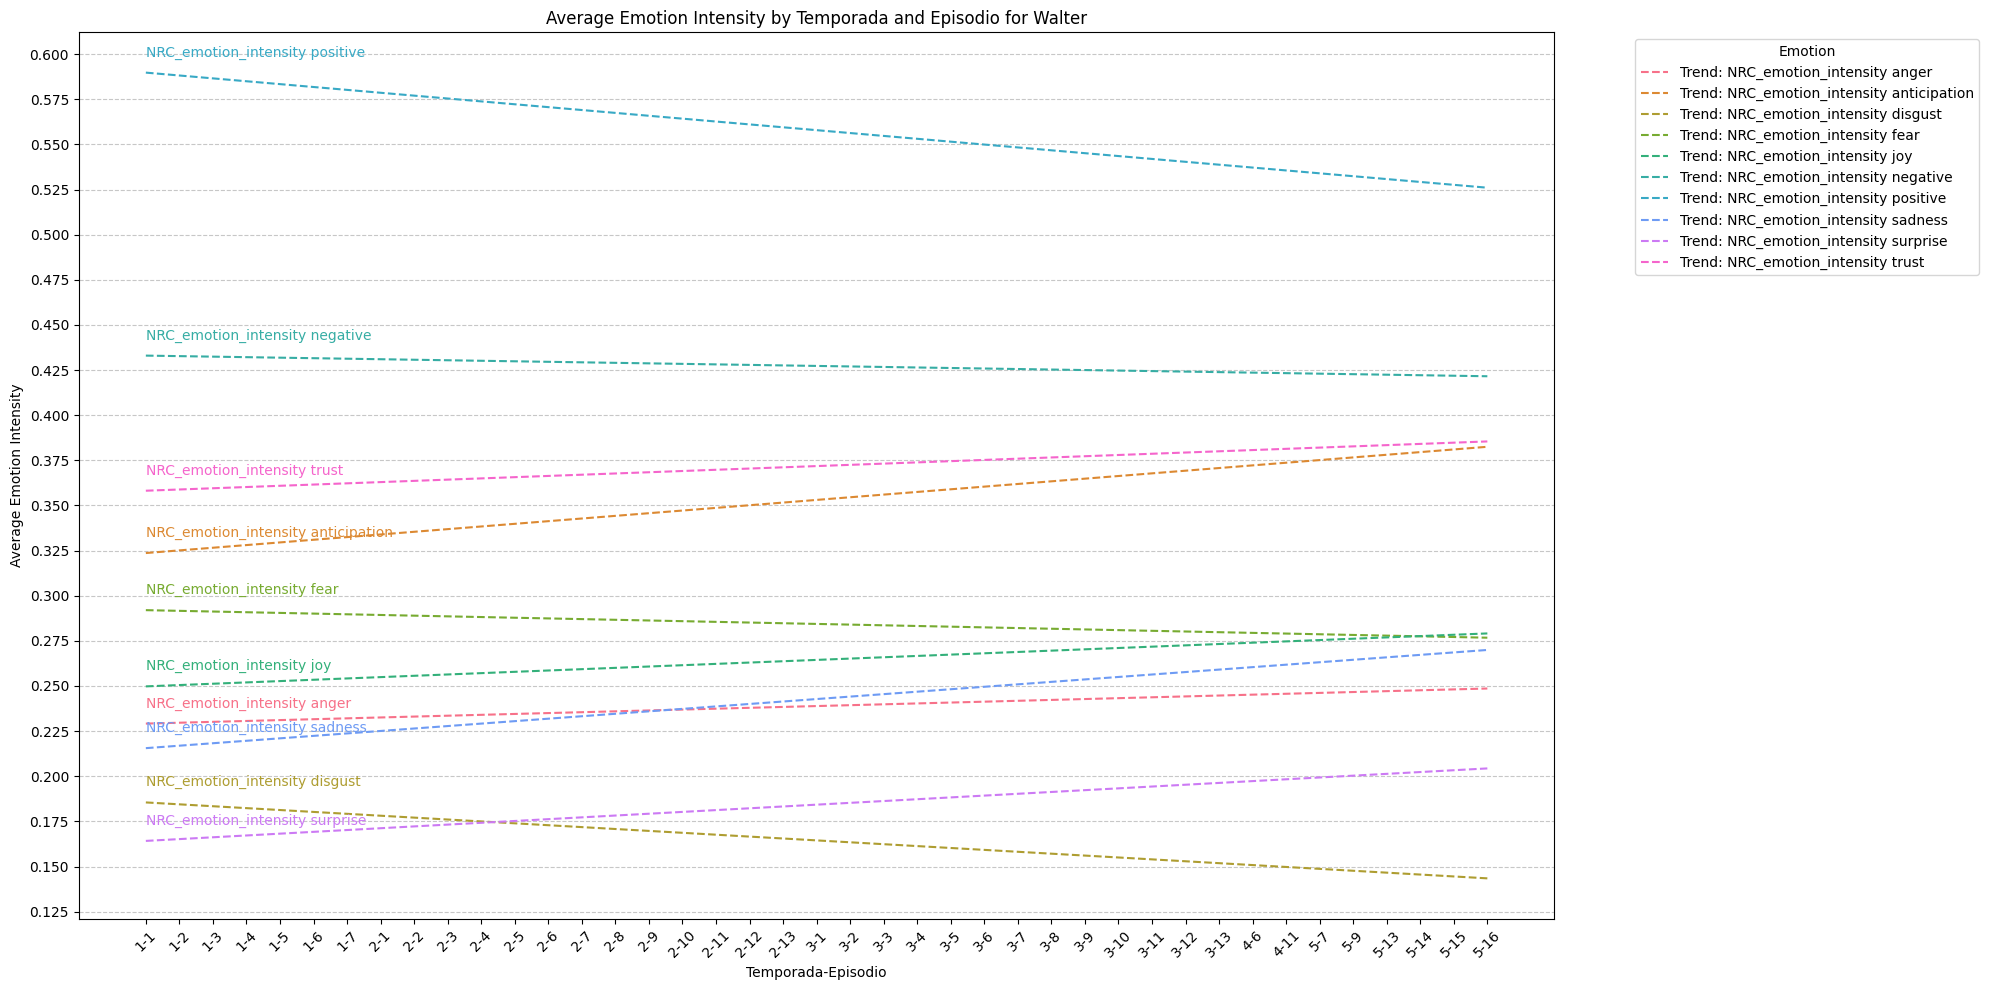

In [82]:
# Step 1: Melt the dataframe for easier plotting
melted_df = pd.melt(grouped_df, id_vars=['Temporada', 'Episodio'],
                    value_vars=nrc_emotions,
                    var_name='Emotion',
                    value_name='Intensity')

# Step 2: Create a combined identifier for x-axis
melted_df['x_index'] = melted_df['Temporada'].astype(str) + '-' + melted_df['Episodio'].astype(str)

# Define a color palette for trend lines
colors = sns.color_palette("husl", len(nrc_emotions))

# Step 3: Plot the evolution of emotions
plt.figure(figsize=(20, 10))

# Create the line plot with 'x_index' on the x-axis and 'Intensity' on the y-axis
# sns.lineplot(data=melted_df, x='x_index', y='Intensity', hue='Emotion', palette='Set1', markers=None)

# Plot each emotion with a trend line
for i, emotion in enumerate(nrc_emotions):
    # Filter data for the current emotion
    emotion_data = melted_df[melted_df['Emotion'] == emotion]

    # Fit a linear regression model
    x = np.arange(len(emotion_data)).reshape(-1, 1)  # X values as index
    y = emotion_data['Intensity'].values
    model = LinearRegression().fit(x, y)

    # Predict values
    y_pred = model.predict(x)

    # Plot trend line with a unique color
    plt.plot(emotion_data['x_index'], y_pred, linestyle='--', color=colors[i], label=f'Trend: {emotion}')

    # Annotate the emotion name at the end of the trend line
    plt.text(emotion_data['x_index'].iloc[0], y_pred[0] + 0.015, emotion, color=colors[i], verticalalignment='top', horizontalalignment='left')

# Step 4: Customize the plot
plt.title('Average Emotion Intensity by Temporada and Episodio for Walter')
plt.xlabel('Temporada-Episodio')
plt.ylabel('Average Emotion Intensity')
plt.xticks(rotation=45)
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show grid lines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis ticks with more intermediate values
y_ticks = np.arange(0.125, 0.625, 0.025)  # Adjust the step size as needed
plt.yticks(y_ticks)

plt.xticks(rotation=45)
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Step 5: Show the plot
plt.show()

## <font color='red'>Zero-shot con el modelo facebook/bart-large-mnli y la librería transformers de Hugging Face</font>

Se trata de un modelo entrenado específicamente para el procesamiento de lenguaje natural (NLP), que es perfecto para tareas de clasificación zero-shot.

### Instalar e importar las librerías, definir la función que obtiene el scoring de los sentimientos (positivo, negativo, neutro) y aplicarla a nuestro dataset

#### NO EJECUTAR, TARDA APROXIMADAMENTE 6 HORAS EN UN ORDENADOR NORMAL

In [83]:
# !pip install transformers torch

In [84]:
# NO EJECUTAR, TARDA APROXIMADAMENTE 6 HORAS EN UN ORDENADOR NORMAL

# import pandas as pd
# from transformers import pipeline

# # Initialize the zero-shot classification pipeline with a suitable model
# classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# # Define candidate labels for classification
# candidate_labels = ["positive", "negative", "neutral"]

# # # Create an empty list to store the results
# # results = []

# # # Apply zero-shot classification to each row in the "Texto" column
# # for index, row in ready_df.iterrows():
# #     text = row['Texto']  # Get the phrase from the 'Texto' column
# #     result = classifier(text, candidate_labels)  # Perform classification
# #     results.append(result)  # Append the result to the results list

# texts = ready_df['Texto'].tolist()  # Get all texts at once
# batch_size = 16  # Choose an appropriate batch size
# results = []

# for i in range(0, len(texts), batch_size):
#     batch_texts = texts[i:i + batch_size]
#     batch_results = classifier(batch_texts, candidate_labels)
#     results.extend(batch_results)
#     print(batch_results)

# # Add the classification results back to the DataFrame
# for idx, result in enumerate(results):
#     ready_df.at[idx, 'classification_result'] = result

# # Print the DataFrame with classification results
# print(ready_df)

Como este algoritmo tarda 6 horas en ejecutarse, lo hemos realizado previamente y descargado los resultados en un excel aparte que importaremos posteriormente para ganar tiempo.

### Importar la extracción previa de los resultados de este algoritmo, añadirla al dataset existente y separar los valores en columnas ordenadas

In [85]:
# prompt: import excel file

import pandas as pd

# Replace 'your_excel_file.xlsx' with the actual path to your Excel file in Google Drive
excel_file_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/zero_shot_transformers.xlsx'

df = pd.read_excel(excel_file_path)

df.head(2)

classification_result
0  {"sequence": "My name is Walter Hartwell White...
1  {"sequence": "White Residence", "labels": ["po...

In [86]:
print(df['classification_result'].apply(type).head(2))

0    <class 'str'>
1    <class 'str'>
Name: classification_result, dtype: object


In [87]:
import json

# Function to parse each entry in classification_result
def parse_classification_result(entry):
    if isinstance(entry, str):  # If it's a string, try to parse it as JSON
        try:
            # Parse the JSON string to a Python object (list of dictionaries)
            return json.loads(entry)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON at entry: {entry}\nError: {e}")
            return None  # If parsing fails, return None
    elif isinstance(entry, list):  # If it's already a list of dictionaries
        return entry
    else:
        return None  # Handle other cases

# Apply the function to the classification_result column
df['classification_result'] = df['classification_result'].apply(parse_classification_result)

# Check if it worked by inspecting a few rows
print(df['classification_result'].head(2))

Error parsing JSON at entry: {"sequence": "Well, too bad, man, "cause guess what. He's still not dead! I went and put my ear to the RV, I can hear him, like, rolling around in there, all right? I think he's awake, man, I think he's trying to get loose. Where the hell are you? I'm freaking out over here!", "labels": ["negative", "neutral", "positive"], "scores": [0.9449244737625122, 0.03199154883623123, 0.023084037005901337]}
Error: Expecting ',' delimiter: line 1 column 36 (char 35)
Error parsing JSON at entry: {"sequence": "So, the term "chiral"derives from the Greek word "hand. "The concept here being that, just as your left hand, and your right hand are mirror images of one another, right? Identical, and yet opposite. Well, so too organic compounds can exist as mirror image forms of one another all the way down at the molecular level. But although they may look the same, they don\'t always behave the same. For instance...I\'m sorry for instance Thalidomide. The right-handed isomer o

In [88]:
df['classification_result'].head(2)

0    {'sequence': 'My name is Walter Hartwell White...
1    {'sequence': 'White Residence', 'labels': ['po...
Name: classification_result, dtype: object

In [89]:
# Now extract 'labels', 'scores', and 'sequence' from the dictionary
df['labels'] = df['classification_result'].apply(lambda x: x['labels'] if isinstance(x, dict) else None)
df['scores'] = df['classification_result'].apply(lambda x: x['scores'] if isinstance(x, dict) else None)
df['sequence'] = df['classification_result'].apply(lambda x: x['sequence'] if isinstance(x, dict) else None)

# Display the result
print(df[['sequence', 'labels', 'scores']].head(2))

                                            sequence  \
0  My name is Walter Hartwell White. I live at 30...   
1                                    White Residence   

                          labels  \
0  [neutral, negative, positive]   
1  [positive, neutral, negative]   

                                              scores  
0  [0.6377227306365967, 0.22701147198677063, 0.13...  
1  [0.597480833530426, 0.32724621891975403, 0.075...  


In [90]:
df['label_score_pairs'] = df.apply(
    lambda row: list(zip(row['labels'], row['scores'])) if row['labels'] is not None and row['scores'] is not None else None,
    axis=1
)

# Display the result with label-score pairs
print(df['label_score_pairs'].head())

0    [(neutral, 0.6377227306365967), (negative, 0.2...
1    [(positive, 0.597480833530426), (neutral, 0.32...
2    [(negative, 0.40771177411079407), (neutral, 0....
3    [(positive, 0.9430945515632629), (neutral, 0.0...
4    [(positive, 0.7173102498054504), (neutral, 0.1...
Name: label_score_pairs, dtype: object


In [91]:
# Create columns for positive, negative, and neutral scores
df['zero_shot_transformers_positive'] = 0.0
df['zero_shot_transformers_negative'] = 0.0
df['zero_shot_transformers_neutral'] = 0.0

# Assign scores to the respective columns based on labels
for index, row in df.iterrows():
    if row['label_score_pairs'] is not None:
        for label, score in row['label_score_pairs']:
            if label == 'positive':
                df.at[index, 'zero_shot_transformers_positive'] = score
            elif label == 'negative':
                df.at[index, 'zero_shot_transformers_negative'] = score
            elif label == 'neutral':
                df.at[index, 'zero_shot_transformers_neutral'] = score

# Display the result with the new columns
print(df[['zero_shot_transformers_positive', 'zero_shot_transformers_negative', 'zero_shot_transformers_neutral']].head())

   zero_shot_transformers_positive  zero_shot_transformers_negative  \
0                         0.135266                         0.227011   
1                         0.597481                         0.075273   
2                         0.267459                         0.407712   
3                         0.943095                         0.019268   
4                         0.717310                         0.090331   

   zero_shot_transformers_neutral  
0                        0.637723  
1                        0.327246  
2                        0.324830  
3                        0.037638  
4                        0.192359  


In [92]:
df = df.drop(columns=['classification_result','sequence', 'labels', 'scores', 'label_score_pairs'])
df.head(2)

zero_shot_transformers_positive  zero_shot_transformers_negative  \
0                         0.135266                         0.227011   
1                         0.597481                         0.075273   

   zero_shot_transformers_neutral  
0                        0.637723  
1                        0.327246

In [93]:
final_df = pd.concat([final_df, df], axis=1)

final_df.head(2)

Temporada  Episodio      Titulo Personaje  \
0        1.0       1.0   The Pilot    walter   
1        1.0       1.0   The Pilot     scene   

                                               Texto  Personaje_id  \
0   My name is Walter Hartwell White. I live at 3...          36.0   
1                                    White Residence          27.0   

                                      Palabras_clave  textblob_sentiment  \
0  [name, walter, hartwell, white, live, negra, a...            0.128788   
1                                 [white, residence]            0.000000   

   textblob_custom_sentiment  \
0                       -0.4   
1                        0.0   

                                   Vader_sentimiento  ...  \
0  {'neg': 0.03, 'neu': 0.851, 'pos': 0.119, 'com...  ...   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  ...   

   NRC_emotion_intensity fear  NRC_emotion_intensity joy  \
0                         0.0                        2.0   
1                         0.0                        0.0   

   NRC_emotion_intensity negative  NRC_emotion_intensity positive  \
0                             2.0                             3.0   
1                             0.0                             0.0   

  NRC_emotion_intensity sadness  NRC_emotion_intensity surprise  \
0                           1.0                             1.0   
1                           0.0                             0.0   

   NRC_emotion_intensity trust  zero_shot_transformers_positive  \
0                          2.0                         0.135266   
1                          0.0                         0.597481   

  zero_shot_transformers_negative  zero_shot_transformers_neutral  
0                        0.227011                        0.637723  
1                        0.075273                        0.327246  

[2 rows x 32 columns]

### Dibujar el Histograma de los sentimientos extraídos con ZERO-SHOT TRANSFORMERS Y MODELO DE FACEBOOK para ver su distribución
Vemos que hay una enorme cantidad de valores neutros (cero o cercanos a cero) en todos los scorings (negativo, positivo, neutro y compound).

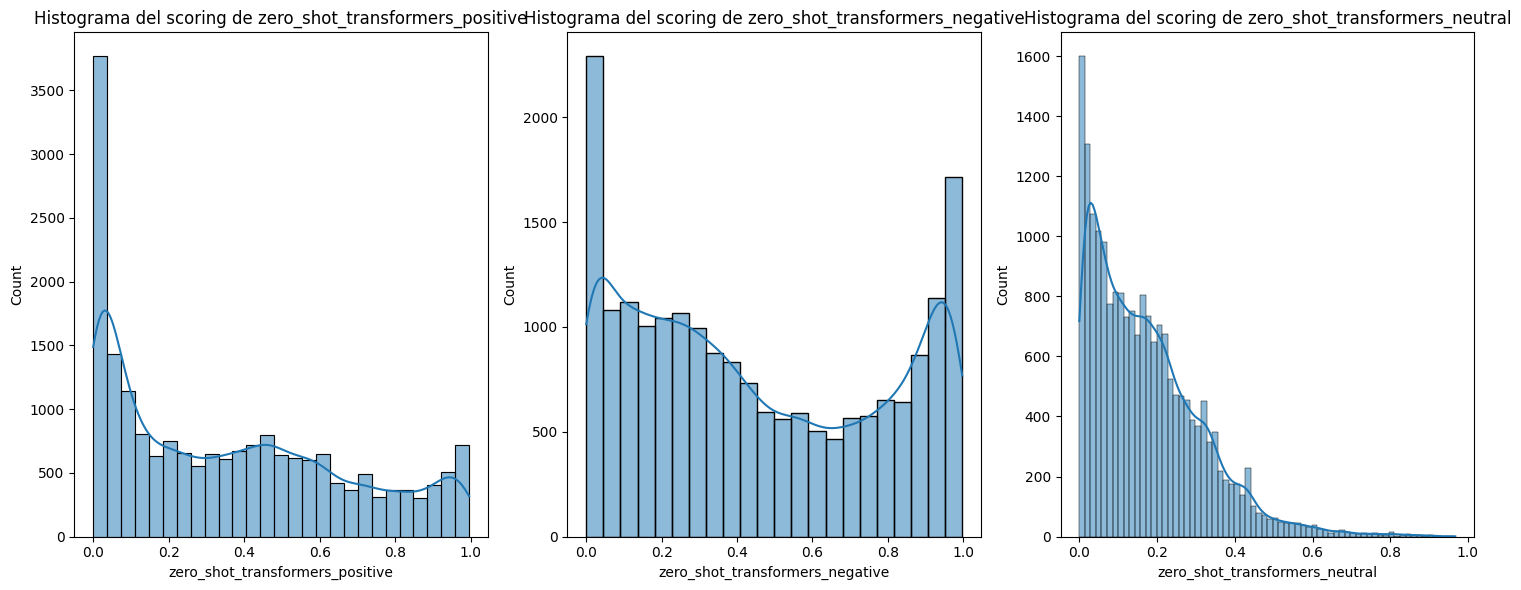

In [94]:
# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Realizar plot de sentiwordnet_negative
sns.histplot(final_df['zero_shot_transformers_positive'], kde=True, ax=axes[0])
axes[0].set_title('Histograma del scoring de zero_shot_transformers_positive')

# Realizar plot de sentiwordnet_positive
sns.histplot(final_df['zero_shot_transformers_negative'], kde=True, ax=axes[1])
axes[1].set_title('Histograma del scoring de zero_shot_transformers_negative')

# Realizar plot de sentiwordnet_compound
sns.histplot(final_df['zero_shot_transformers_neutral'], kde=True, ax=axes[2])
axes[2].set_title('Histograma del scoring de zero_shot_transformers_neutral')

plt.tight_layout()
plt.show()

Vemos que hay bastantes valores en torno al cero, no obstante, en esta ocasión, el scoring está más equilibrado para las tres variables, por lo que no realizaremos la eliminación del 90% de estos valores que hemos realizado previamente.

### Realizar plot de la frecuencia de polaridad de sentimientos por cada personaje principal

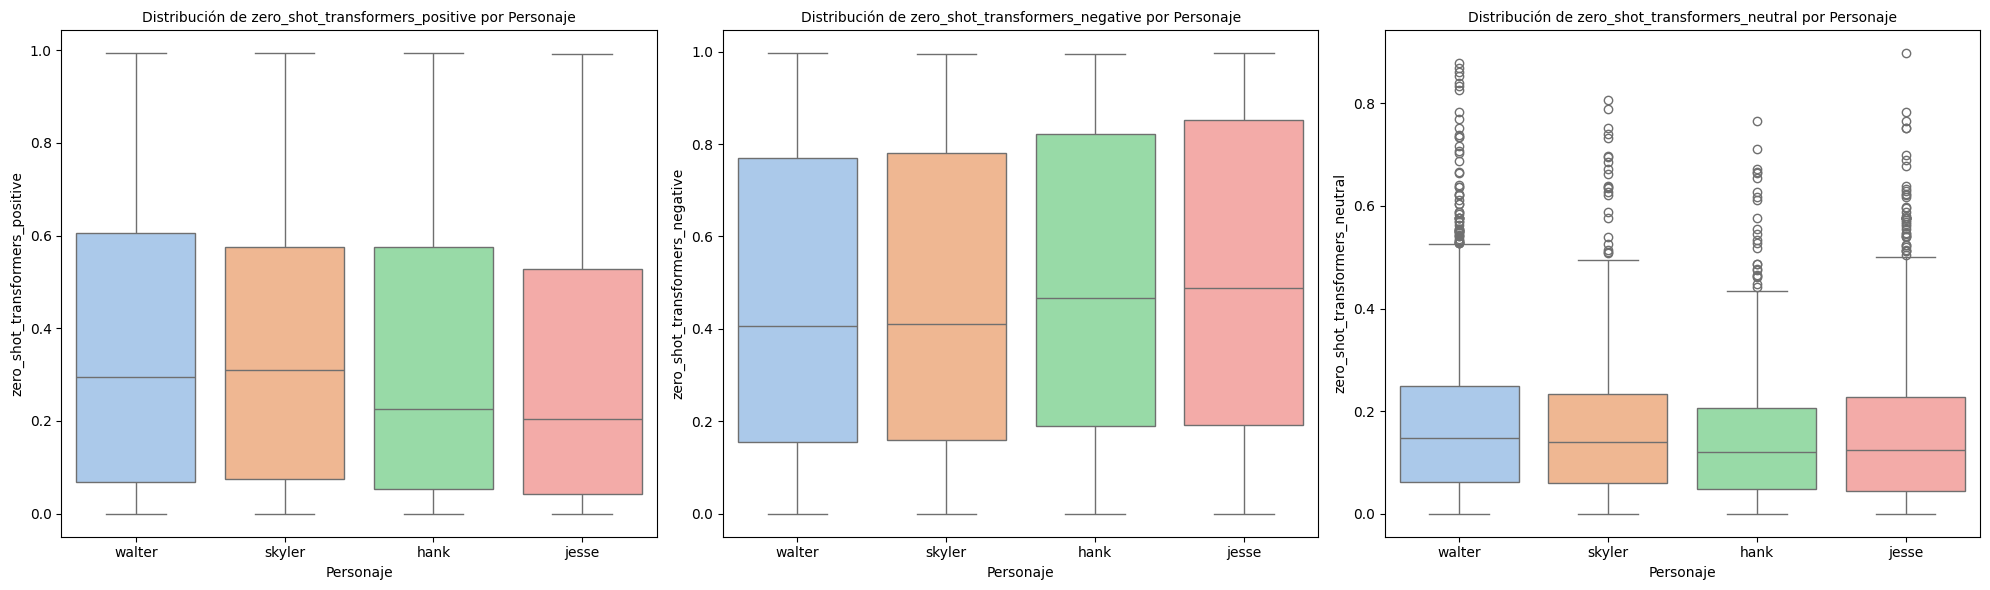

In [95]:
personajes_seleccionados = ['walter', 'jesse', 'skyler', 'hank']
df_personajes_seleccionados = final_df[final_df['Personaje'].isin(personajes_seleccionados)]

# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# Realizar plot para sentiwordnet_negative
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='zero_shot_transformers_positive', hue='Personaje', palette='pastel', ax=axes[0])
axes[0].set_title('Distribución de zero_shot_transformers_positive por Personaje', fontsize=10)

# Realizar plot para sentiwordnet_positive
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='zero_shot_transformers_negative', hue='Personaje', palette='pastel', ax=axes[1])
axes[1].set_title('Distribución de zero_shot_transformers_negative por Personaje', fontsize=10)

# Realizar plot para sentiwordnet_compound
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='zero_shot_transformers_neutral', hue='Personaje', palette='pastel', ax=axes[2])
axes[2].set_title('Distribución de zero_shot_transformers_neutral por Personaje', fontsize=10)

plt.tight_layout()
plt.show()

### Agrupar sentimientos por la media y la mediana de cada episodio y realizar distintos plots

In [96]:
zeroshot_vars = ['zero_shot_transformers_positive', 'zero_shot_transformers_negative', 'zero_shot_transformers_neutral']

In [97]:
zeroshot_media_episodio = {}
# zeroshot_mediana_episodio = {}

for var in zeroshot_vars:
    zeroshot_media_episodio[var] = final_df.groupby(['Temporada', 'Episodio'])[var].mean().reset_index()

    # zeroshot_mediana_episodio[var] = final_df.groupby(['Temporada', 'Episodio'])[var].median().reset_index()

for var in zeroshot_vars:
    print(f"\nGrouped mean for {var}:\n", zeroshot_media_episodio[var])
    # print(f"\nGrouped median for {var}:\n", zeroshot_mediana_episodio[var])


Grouped mean for zero_shot_transformers_positive:
     Temporada  Episodio  zero_shot_transformers_positive
0         1.0       1.0                         0.353983
1         1.0       2.0                         0.315540
2         1.0       3.0                         0.272341
3         1.0       4.0                         0.368663
4         1.0       5.0                         0.394638
5         1.0       6.0                         0.355057
6         1.0       7.0                         0.370234
7         2.0       1.0                         0.288001
8         2.0       2.0                         0.247239
9         2.0       3.0                         0.314907
10        2.0       4.0                         0.352445
11        2.0       5.0                         0.393255
12        2.0       6.0                         0.339529
13        2.0       7.0                         0.385997
14        2.0       8.0                         0.296166
15        2.0       9.0             

#### Lineplot de la Polaridad de Sentimiento por Temporada y Episodio

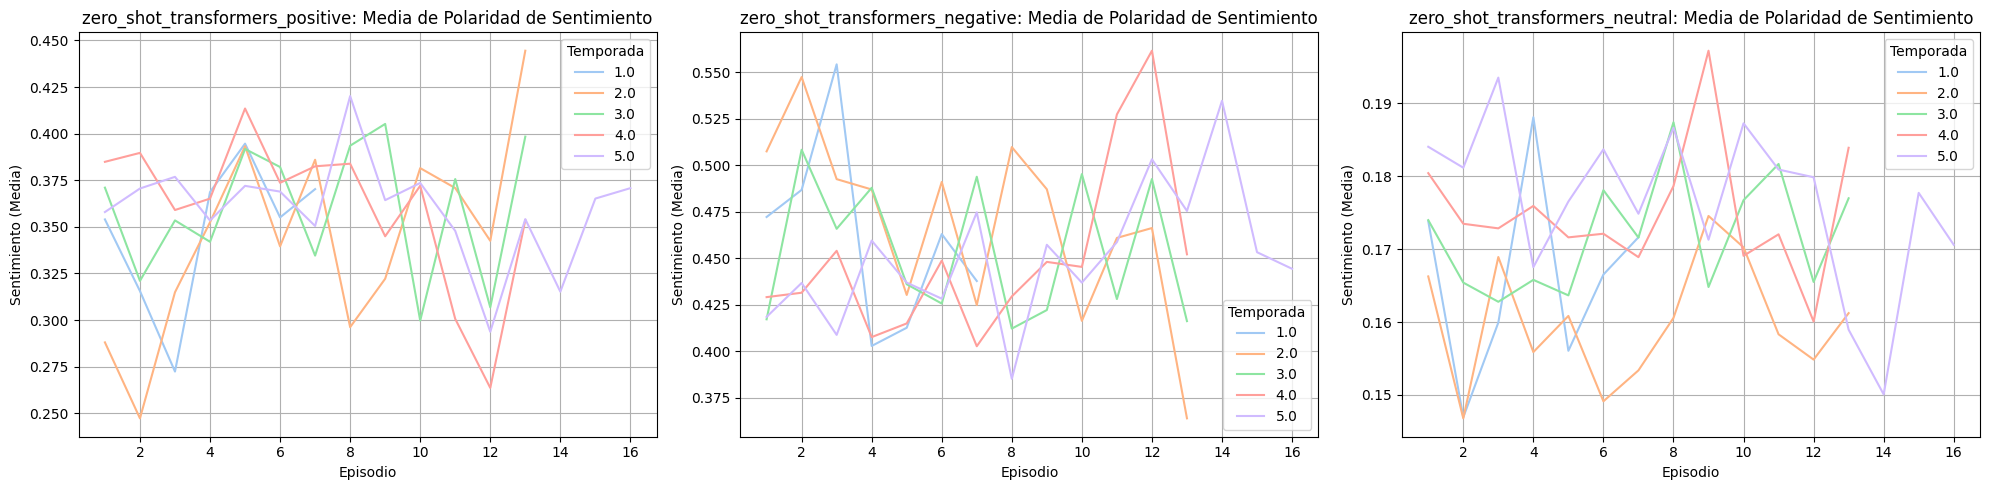

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for i, var in enumerate(zeroshot_vars):

    # Primera fila
    sns.lineplot(data=zeroshot_media_episodio[var], x='Episodio', y=var, hue='Temporada', ax=axs[i], palette='pastel')
    axs[i].set_title(f'{var}: Media de Polaridad de Sentimiento')
    axs[i].set_ylabel('Sentimiento (Media)')
    axs[i].grid(True)

    # Segunda fila
    # sns.lineplot(data=zeroshot_mediana_episodio[var], x='Episodio', y=var, hue='Temporada', ax=axs[1, i], palette='pastel')
    # axs[1, i].set_title(f'{var}: Mediana de Polaridad de Sentimiento')
    # axs[1, i].set_ylabel('Sentimiento (Mediana)')
    # axs[1, i].grid(True)

plt.tight_layout()
plt.show()

#### Líneas de tendencia de la Polaridad de Sentimiento por cada temporada

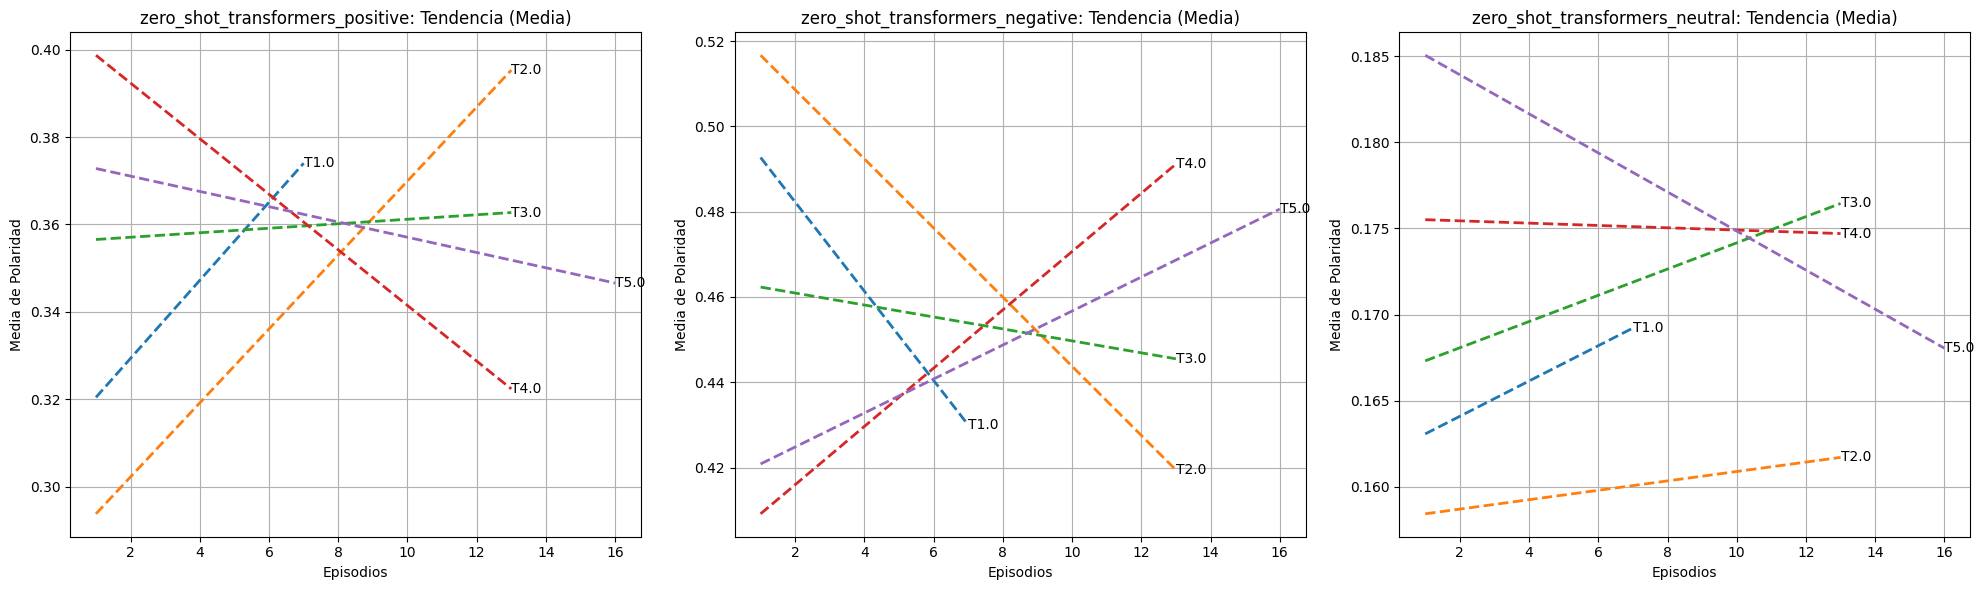

In [99]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Iterate over the Vader sentiment variables
for i, var in enumerate(zeroshot_vars):

    # Iterate over each season (Temporada)
    for temporada in zeroshot_media_episodio[var]['Temporada'].unique():
        # Filter data for the specific season
        data_temp_mean = zeroshot_media_episodio[var][zeroshot_media_episodio[var]['Temporada'] == temporada]

        # Fit a trend line using numpy.polyfit for the mean
        z_mean = np.polyfit(data_temp_mean['Episodio'], data_temp_mean[var], 1)
        p_mean = np.poly1d(z_mean)

        # Plot the trend line for mean (first row)
        axs[i].plot(data_temp_mean['Episodio'], p_mean(data_temp_mean['Episodio']), linestyle='--', linewidth=2)

        # Add text for the season at the end of the line
        axs[i].text(data_temp_mean['Episodio'].iloc[-1], p_mean(data_temp_mean['Episodio'].iloc[-1]), f'T{temporada}', fontsize=10, verticalalignment='center')

    axs[i].set_title(f'{var}: Tendencia (Media)')
    axs[i].set_ylabel('Media de Polaridad')
    axs[i].set_xlabel('Episodios')
    axs[i].grid(True)

    # Repeat the process for the median
    # for temporada in sentiwordnet_mediana_episodio[var]['Temporada'].unique():
    #     # Filter data for the specific season
    #     data_temp_median = sentiwordnet_mediana_episodio[var][sentiwordnet_mediana_episodio[var]['Temporada'] == temporada]

    #     # Fit a trend line using numpy.polyfit for the median
    #     z_median = np.polyfit(data_temp_median['Episodio'], data_temp_median[var], 1)
    #     p_median = np.poly1d(z_median)

    #     # Plot the trend line for median (second row)
    #     axs[1, i].plot(data_temp_median['Episodio'], p_median(data_temp_median['Episodio']), linestyle='--', linewidth=2)

    #     # Add text for the season at the end of the line
    #     axs[1, i].text(data_temp_median['Episodio'].iloc[-1], p_median(data_temp_median['Episodio'].iloc[-1]), f'T{temporada}', fontsize=10, verticalalignment='center')
    #
    # axs[1, i].set_title(f'{var}: Tendencia (Mediana)')
    # axs[1, i].set_ylabel('Mediana de Polaridad')
    # axs[1, i].set_xlabel('Episodios')
    # axs[1, i].grid(True)

plt.tight_layout()
plt.show()

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para todos los personajes

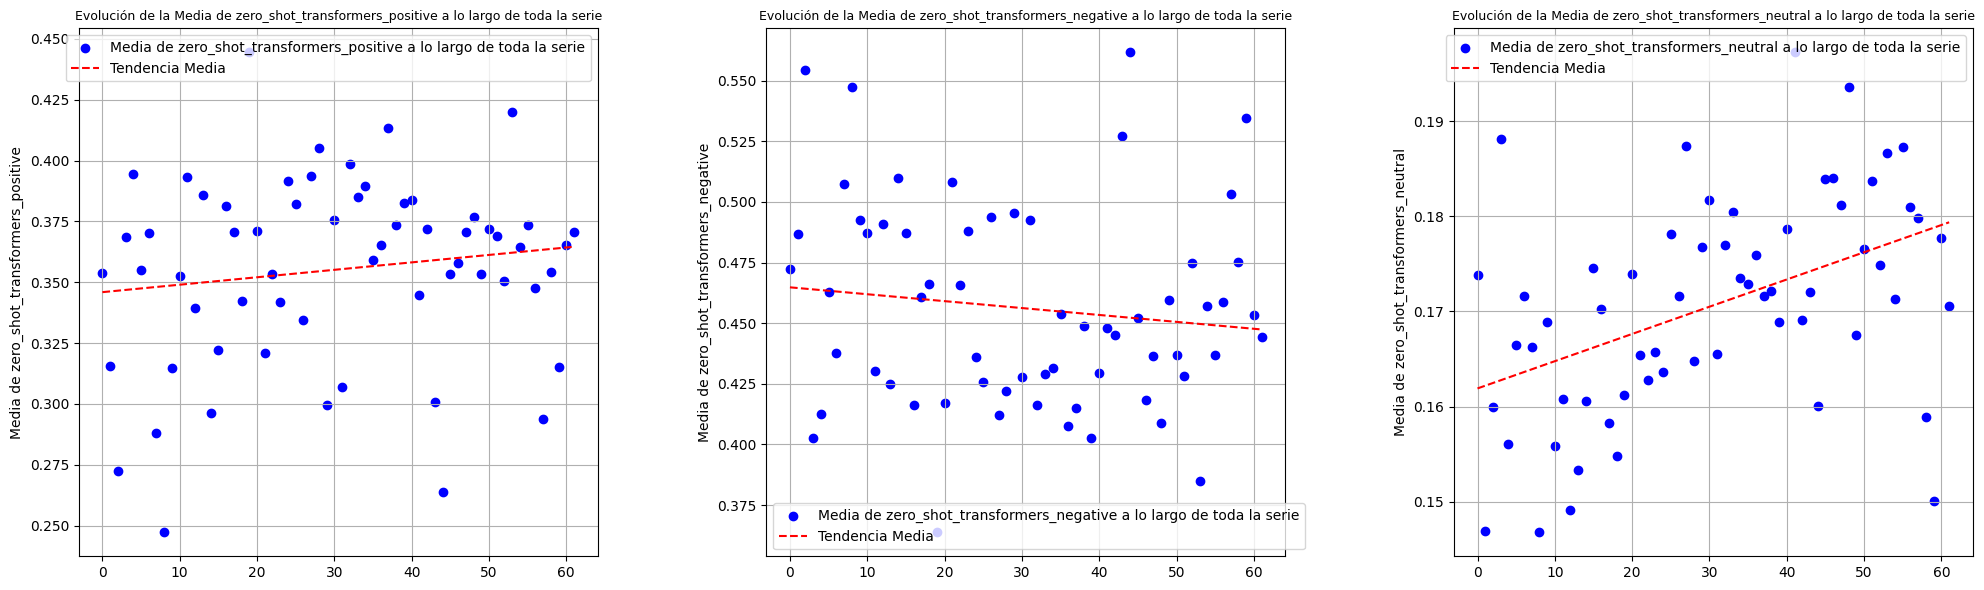

In [100]:
fig, axs = plt.subplots(1, len(zeroshot_vars), figsize=(20, 2 * len(zeroshot_vars)), sharex=True)

for i, var in enumerate(zeroshot_vars):

    # Assuming each var has a DataFrame with 'mean' and 'median' data
    plot_media_episodio = zeroshot_media_episodio[var]
    # plot_mediana_episodio = sentiwordnet_mediana_episodio[var]

    # First subplot: Mean
    axs[i].scatter(plot_media_episodio.index, plot_media_episodio[var], color='blue', label='Media de ' + var + ' a lo largo de toda la serie')

    # Fit a linear regression line for the mean
    X_mean = plot_media_episodio.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_mean = plot_media_episodio[var].values  # Ensure you access the values correctly
    model_mean = LinearRegression().fit(X_mean, y_mean)
    y_pred_mean = model_mean.predict(X_mean)

    # Plot trend line for mean
    axs[i].plot(plot_media_episodio.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

    # Titles and labels for the first subplot
    axs[i].set_title(f'Evolución de la Media de {var} a lo largo de toda la serie', fontsize= 9)
    axs[i].set_ylabel(f'Media de {var}')
    axs[i].legend()
    axs[i].grid(True)

    # Second subplot: Median
    # axs[i, 1].scatter(plot_mediana_episodio.index, plot_mediana_episodio[var], color='green', label='Mediana de ' + var + ' a lo largo de toda la serie')

    # # Fit a linear regression line for the median
    # X_median = plot_mediana_episodio.index.values.reshape(-1, 1)  # Reshape for sklearn
    # y_median = plot_mediana_episodio[var].values  # Ensure you access the values correctly
    # model_median = LinearRegression().fit(X_median, y_median)
    # y_pred_median = model_median.predict(X_median)

    # # Plot trend line for median
    # axs[i, 1].plot(plot_mediana_episodio.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

    # # Titles and labels for the second subplot
    # axs[i, 1].set_title(f'Evolución de la Mediana de {var} a lo largo de toda la serie')
    # axs[i, 1].set_ylabel(f'Mediana de {var}')
    # axs[i, 1].legend()
    # axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

#### Scatterplot de tendencia de la Polaridad de Sentimiento a lo largo de toda la serie para Walter

In [101]:
final_df_walter = final_df[final_df['Personaje'] == 'walter']

zeroshot_media_episodio_walter = {}
zeroshot_mediana_episodio_walter = {}

for var in zeroshot_vars:
    zeroshot_media_episodio_walter[var] = final_df_walter.groupby(['Temporada', 'Episodio'])[var].mean().reset_index()

    # zeroshot_mediana_episodio_walter[var] = final_df_walter.groupby(['Temporada', 'Episodio'])[var].median().reset_index()

for var in zeroshot_vars:
    print(f"\nGrouped mean for {var}:\n", zeroshot_media_episodio_walter[var])
    # print(f"\nGrouped median for {var}:\n", sentiwordnet_mediana_episodio_walter[var])


Grouped mean for zero_shot_transformers_positive:
     Temporada  Episodio  zero_shot_transformers_positive
0         1.0       1.0                         0.322813
1         1.0       2.0                         0.316102
2         1.0       3.0                         0.261250
3         1.0       4.0                         0.267678
4         1.0       5.0                         0.506642
5         1.0       6.0                         0.395620
6         1.0       7.0                         0.432921
7         2.0       1.0                         0.253046
8         2.0       2.0                         0.148125
9         2.0       3.0                         0.273583
10        2.0       4.0                         0.387265
11        2.0       5.0                         0.315737
12        2.0       6.0                         0.358050
13        2.0       7.0                         0.322581
14        2.0       8.0                         0.315714
15        2.0       9.0             

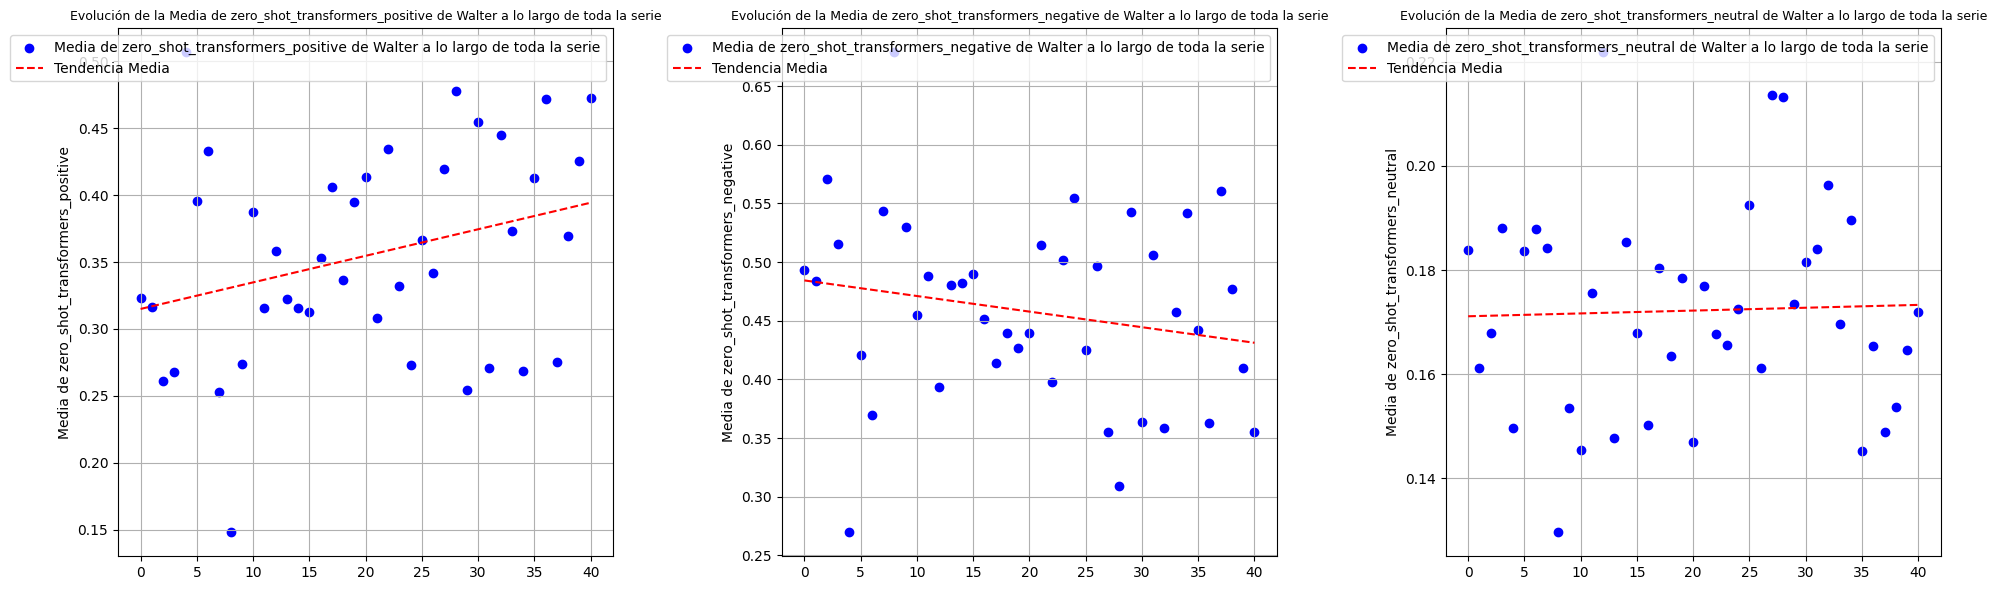

In [102]:
fig, axs = plt.subplots(1, len(zeroshot_vars), figsize=(20, 2 * len(zeroshot_vars)), sharex=True)

for i, var in enumerate(zeroshot_vars):

    # Assuming each var has a DataFrame with 'mean' and 'median' data
    plot_media_episodio_walter = zeroshot_media_episodio_walter[var]
    # plot_mediana_episodio_walter = zeroshot_mediana_episodio_walter[var]

    # First subplot: Mean
    axs[i].scatter(plot_media_episodio_walter.index, plot_media_episodio_walter[var], color='blue', label='Media de ' + var + ' de Walter a lo largo de toda la serie')

    # Fit a linear regression line for the mean
    X_mean = plot_media_episodio_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
    y_mean = plot_media_episodio_walter[var].values  # Ensure you access the values correctly
    model_mean = LinearRegression().fit(X_mean, y_mean)
    y_pred_mean = model_mean.predict(X_mean)

    # Plot trend line for mean
    axs[i].plot(plot_media_episodio_walter.index, y_pred_mean, color='red', linestyle='--', label='Tendencia Media')

    # Titles and labels for the first subplot
    axs[i].set_title(f'Evolución de la Media de {var} de Walter a lo largo de toda la serie', fontsize=9)
    axs[i].set_ylabel(f'Media de {var}')
    axs[i].legend()
    axs[i].grid(True)

    # Second subplot: Median
    # axs[i, 1].scatter(plot_mediana_episodio_walter.index, plot_mediana_episodio_walter[var], color='green', label='Mediana de ' + var + ' de Walter a lo largo de toda la serie')

    # # Fit a linear regression line for the median
    # X_median = plot_mediana_episodio_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
    # y_median = plot_mediana_episodio_walter[var].values  # Ensure you access the values correctly
    # model_median = LinearRegression().fit(X_median, y_median)
    # y_pred_median = model_median.predict(X_median)

    # # Plot trend line for median
    # axs[i, 1].plot(plot_mediana_episodio_walter.index, y_pred_median, color='red', linestyle='--', label='Tendencia Mediana')

    # # Titles and labels for the second subplot
    # axs[i, 1].set_title(f'Evolución de la Mediana de {var} de Walter a lo largo de toda la serie')
    # axs[i, 1].set_ylabel(f'Mediana de {var}')
    # axs[i, 1].legend()
    # axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

## Hubris y Evil

In [103]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import ast

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('wordnet')

# Cargar el archivo de diálogos y los lexicones
# file_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/ready_df.xlsx'  # Cambia la ruta según sea necesario
# final_df = pd.read_excel(file_path)

lexicon_hubris = pd.read_excel('/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/lexicons/lexicon_hubris_final.xlsx')
lexicon_evil = pd.read_excel('/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/lexicons/lexicon_evil_final.xlsx')

# Crear el lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar palabras
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word.lower()) for word in words]

# Lematizar las palabras clave de Hubris y Maldad
lexicon_hubris['Tokenized_Keyword'] = lexicon_hubris['Keyword'].apply(lambda x: lemmatize_words(word_tokenize(x.lower())))
lexicon_evil['Tokenized_Keyword'] = lexicon_evil['Keyword'].apply(lambda x: lemmatize_words(word_tokenize(x.lower())))

# Crear listas planas de palabras tokenizadas y lematizadas
hubris_keywords_tokenized = [word for sublist in lexicon_hubris['Tokenized_Keyword'] for word in sublist]
evil_keywords_tokenized = [word for sublist in lexicon_evil['Tokenized_Keyword'] for word in sublist]

# Función para contar palabras lematizadas presentes en el diálogo
def classify_dialogue_tokenized_lemmatized(palabras_clave, hubris_keywords, evil_keywords):
    try:
        palabras = ast.literal_eval(palabras_clave)  # Convertir la lista de cadenas si es posible
    except (ValueError, SyntaxError):
        palabras = []
    palabras = lemmatize_words(palabras)  # Lematizar las palabras del diálogo
    hubris_count = sum(1 for palabra in palabras if palabra in hubris_keywords)
    evil_count = sum(1 for palabra in palabras if palabra in evil_keywords)
    return hubris_count, evil_count

# Aplicar la función al DataFrame
final_df[['Hubris_count', 'Evil_count']] = final_df['Palabras_clave'].apply(
    lambda x: classify_dialogue_tokenized_lemmatized(x, hubris_keywords_tokenized, evil_keywords_tokenized)
).apply(pd.Series)

# Crear diccionarios basados en las palabras lematizadas para obtener las categorías y niveles
hubris_dict = dict(zip(lexicon_hubris['Keyword'].str.lower(), lexicon_hubris['Category']))
evil_dict = dict(zip(lexicon_evil['Keyword'].str.lower(), lexicon_evil['Level']))

# Función para obtener los niveles de maldad y características de Hubris
def classify_and_label(palabras_clave, hubris_dict, evil_dict):
    try:
        palabras = ast.literal_eval(palabras_clave)  # Convertir el texto a una lista de palabras
    except (ValueError, SyntaxError):
        palabras = []
    palabras = lemmatize_words(palabras)  # Lematizar las palabras
    hubris_labels = [hubris_dict.get(palabra.lower(), None) for palabra in palabras]
    evil_labels = [evil_dict.get(palabra.lower(), None) for palabra in palabras]
    return hubris_labels, evil_labels

# Aplicar la función al DataFrame para obtener niveles y características
final_df[['Hubris_characteristics', 'Evil_levels']] = final_df['Palabras_clave'].apply(
    lambda x: classify_and_label(x, hubris_dict, evil_dict)
).apply(pd.Series)

# Reemplazar los valores None con cadenas vacías en las columnas 'Hubris_characteristics' y 'Evil_levels'
final_df['Hubris_characteristics'] = final_df['Hubris_characteristics'].apply(lambda x: [label for label in x if label is not None])
final_df['Evil_levels'] = final_df['Evil_levels'].apply(lambda x: [label for label in x if label is not None])

# output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/hubris_evil.xlsx'

# final_df.to_excel(output_path, index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [104]:
ready_df = final_df

ready_df.head(2)

output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/ready_df.xlsx'

ready_df.to_excel(output_path, index=False)